## Dart Detection

In [152]:
import os
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from collections import deque, defaultdict

from skimage.feature import blob_doh

In [153]:
ROOT_DIR = os.environ['HOME'] + '/shoot_your_shot'
IMG_DIR = ROOT_DIR + '/bg'

In [160]:
img_lst = sorted(glob(IMG_DIR + '/*_blk.png'))

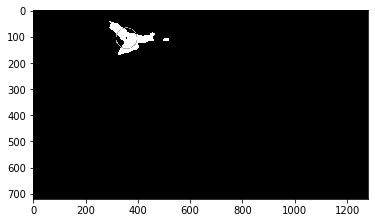

In [170]:
image = cv2.imread(img_lst[32], 0)
plt.imshow(image, cmap=plt.cm.gray)

### Detecting Blobs

Here we experiment with detecting larger white blobs

In [171]:
blobs_doh = blob_doh(image, min_sigma=40, max_sigma=100, num_sigma=2, threshold=0.02)
blobs_doh

array([[117., 378.,  40.]])

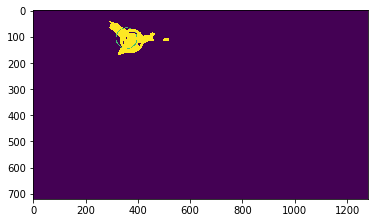

In [172]:
# Plotting Blobs Detected with blob_doh
for blob in blobs_doh:
    y, x, r = list(map(int, blob))
    cv2.circle(image, (x, y), r, (255, 0, 0), 10)
plt.imshow(image)

A simplified approach to registering the blob detection using a coarse grid of cells

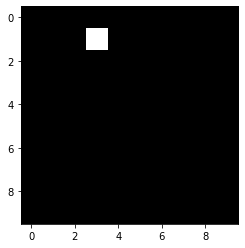

In [173]:
im = cv2.resize(image, (10, 10))
im = im>128
plt.imshow(im, cmap=plt.cm.gray)

In [174]:
print('The blob maps to cell: {}'.format(list(zip(*np.where(im > 0)))[0]))

The blob maps to cell: (1, 3)


### Time smoothing of detected blobs

Here we introduce a helper function to pass between raw pixel values and its corresponding location cell for each indicator map

In [198]:
def point_bin(point, bins):
    x, y = point
    x, y = bins * np.array((x / h, 2 * y / w))
    return tuple(map(int, (x, y)))

(6, 8)


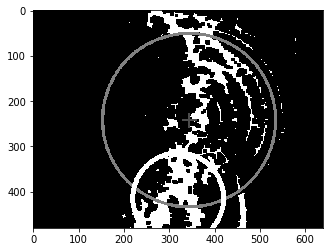

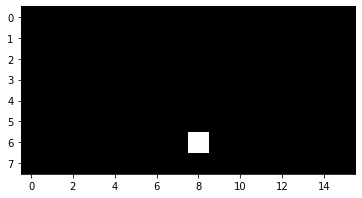

[]
(7, 6)
(5, 8)
(2, 10)


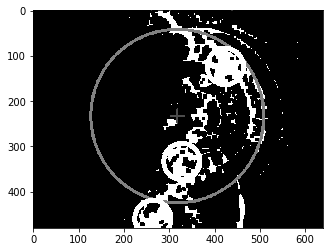

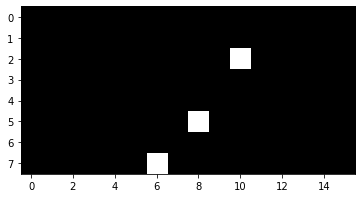

[]
(4, 12)
(1, 10)


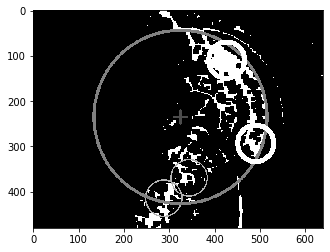

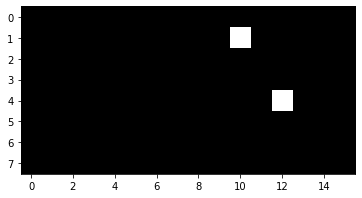

[]
(1, 10)


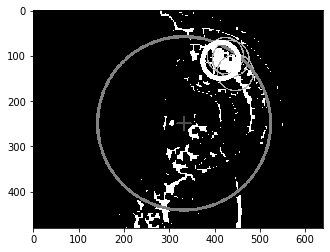

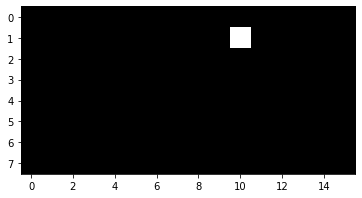

[(1, 10)]
(7, 7)
(1, 10)


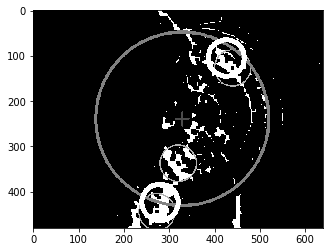

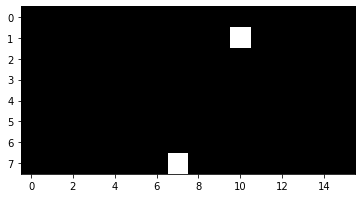

[(1, 10)]
(7, 11)
(7, 6)
(5, 7)
(4, 8)


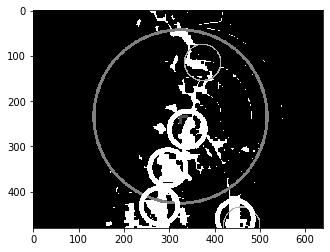

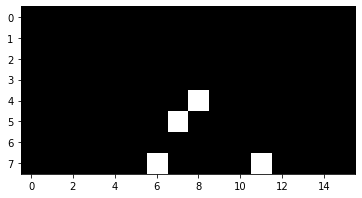

[(1, 10), (7, 6)]


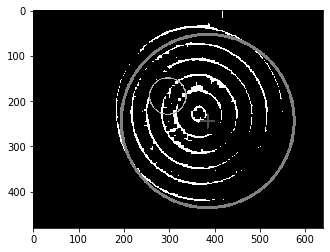

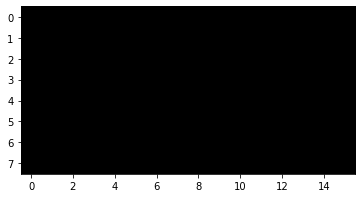

[(1, 10)]
(4, 7)


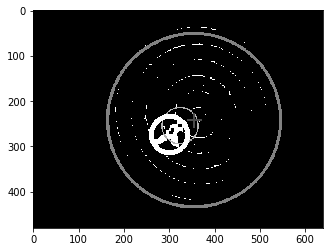

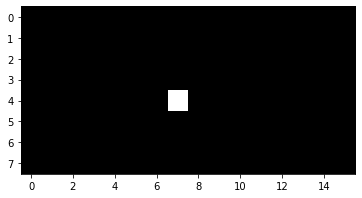

[(1, 10)]
(4, 7)


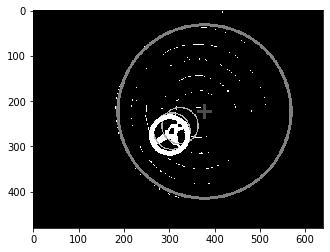

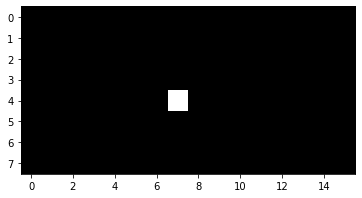

[(4, 7)]
(4, 7)


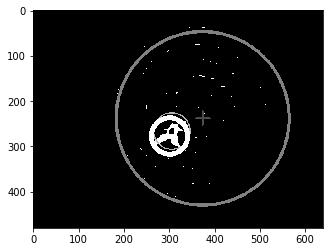

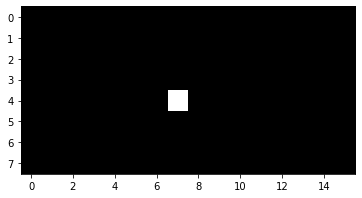

[(4, 7)]
(4, 7)


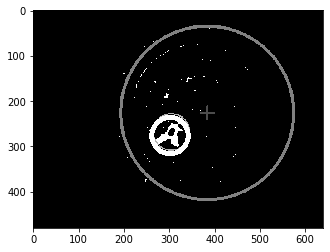

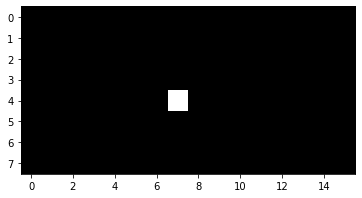

[(4, 7)]
(4, 7)


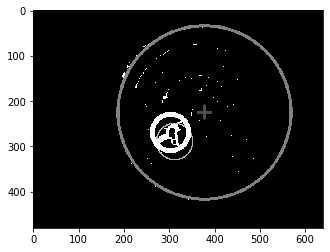

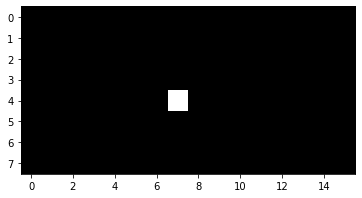

[(4, 7)]


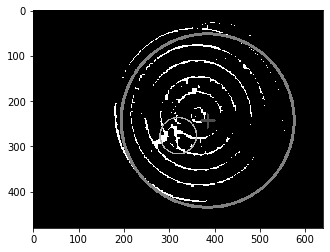

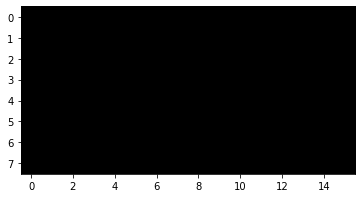

[(4, 7)]


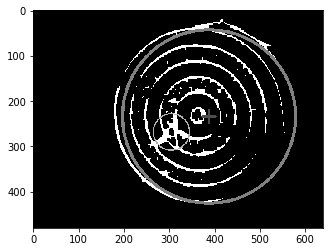

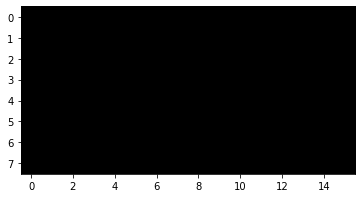

[(4, 7)]


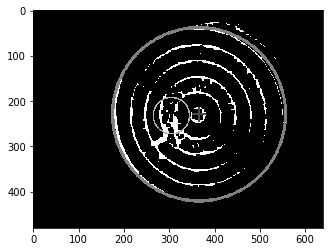

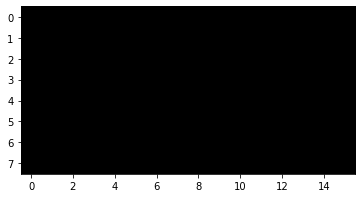

[(4, 7)]
(0, 4)


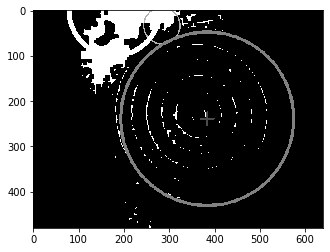

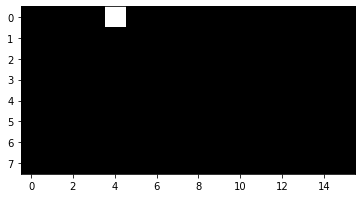

[]
(1, 3)


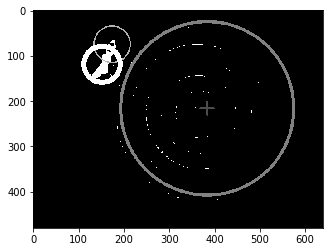

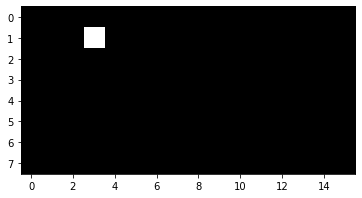

[]
(2, 3)


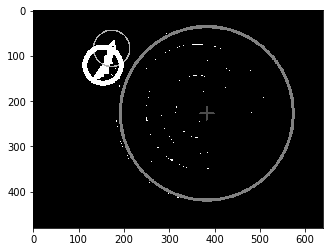

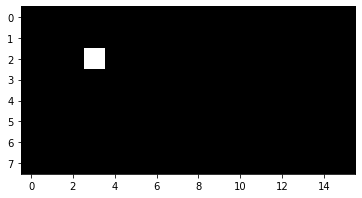

[]


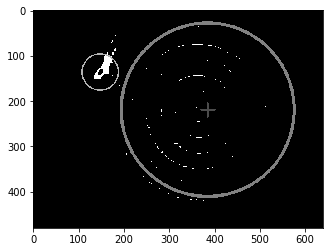

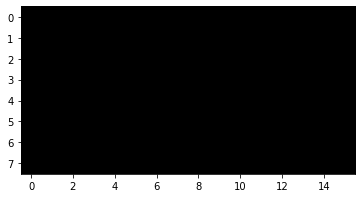

[]


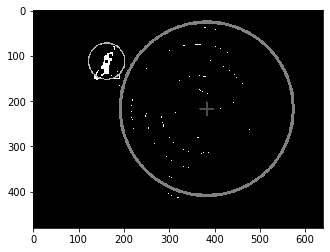

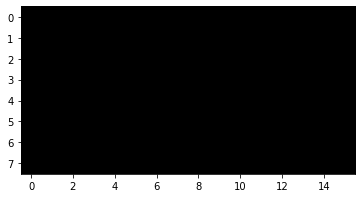

[]


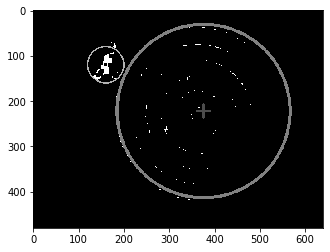

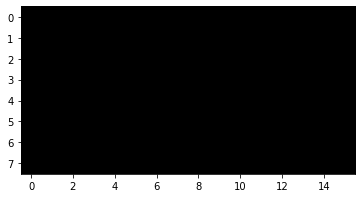

[]


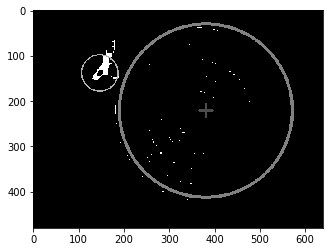

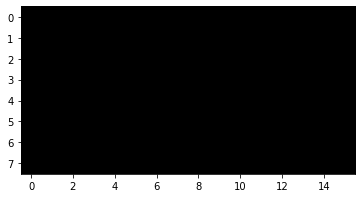

[]


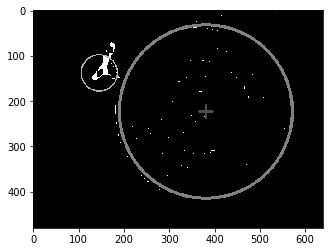

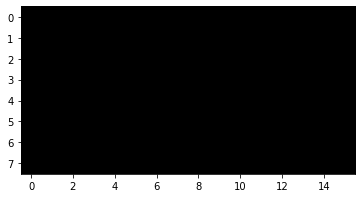

[]


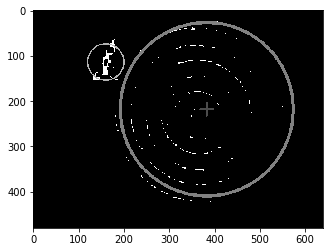

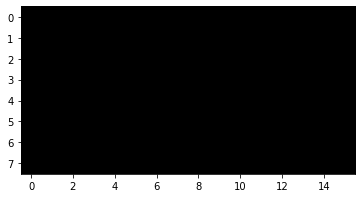

[]


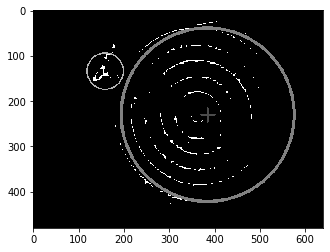

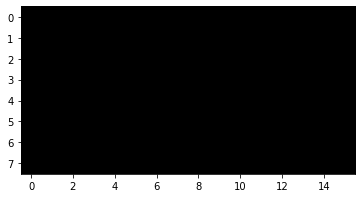

[]
(2, 0)
(0, 0)


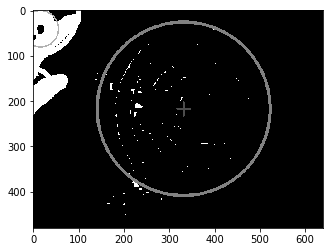

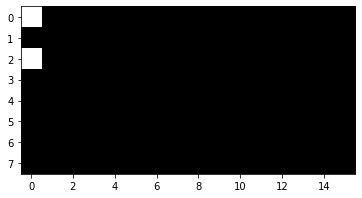

[]
(2, 0)
(1, 4)
(0, 0)


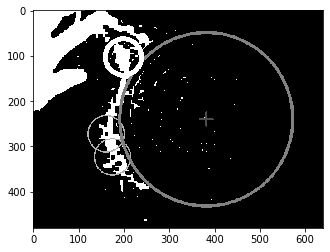

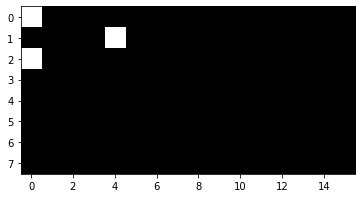

[(0, 0), (2, 0)]
(1, 8)


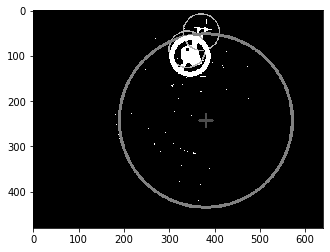

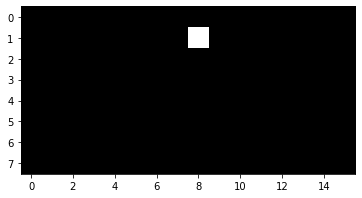

[(0, 0), (2, 0)]
(1, 8)


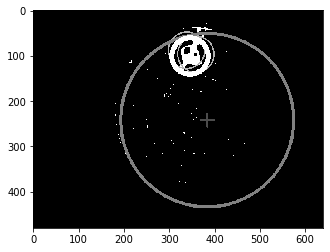

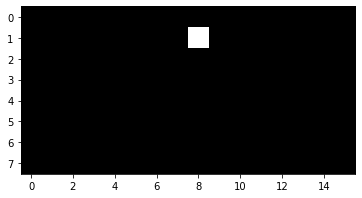

[(0, 0), (1, 8), (2, 0)]


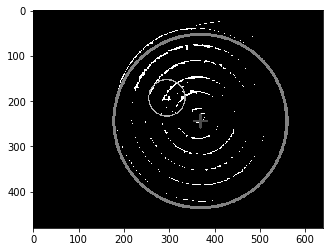

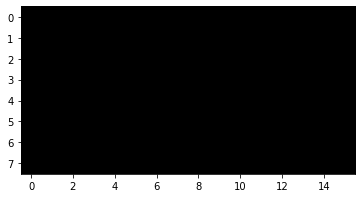

[(0, 0), (1, 8), (2, 0)]


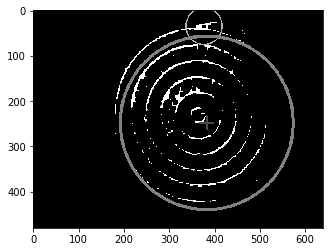

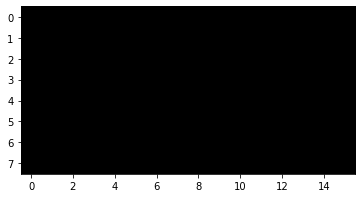

[(1, 8)]


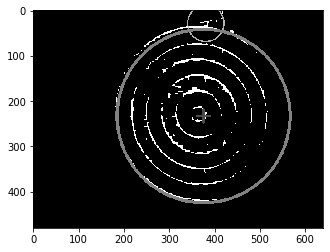

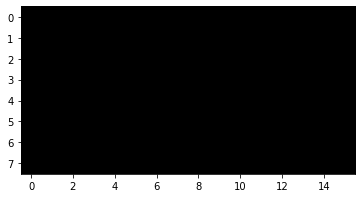

[(1, 8)]


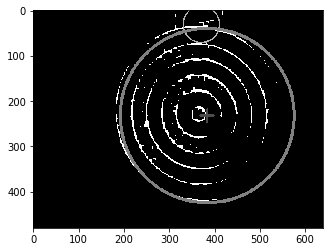

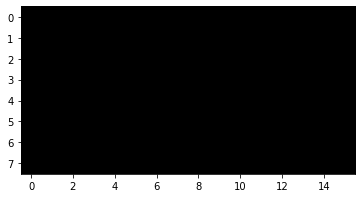

[]


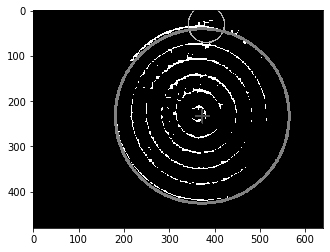

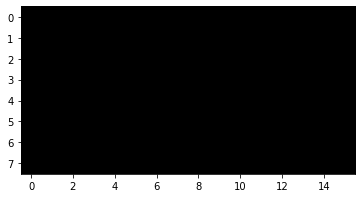

[]


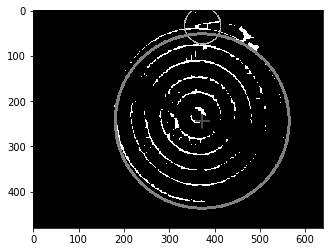

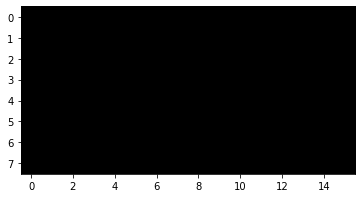

[]


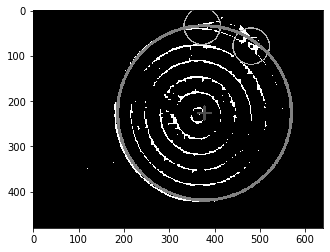

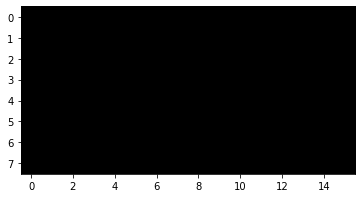

[]
(3, 5)
(3, 6)


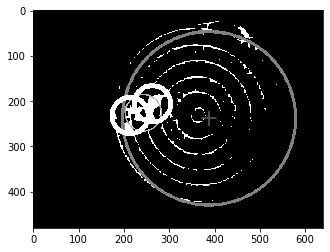

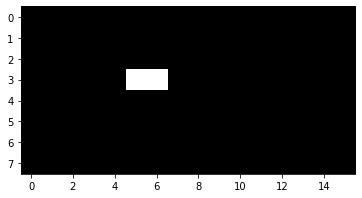

[]
(3, 8)


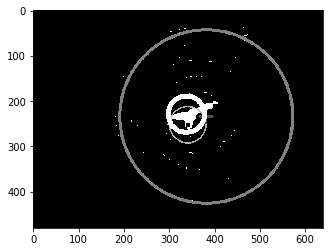

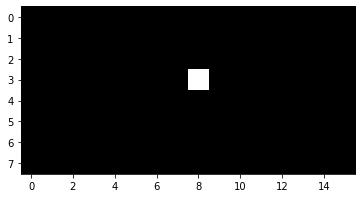

[]


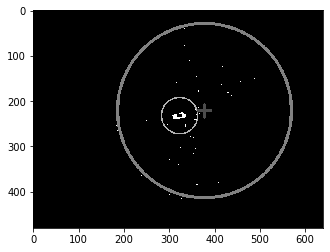

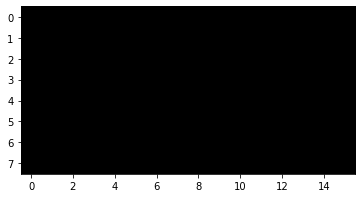

[]
(5, 4)
(3, 4)
(0, 4)


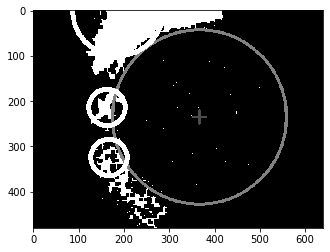

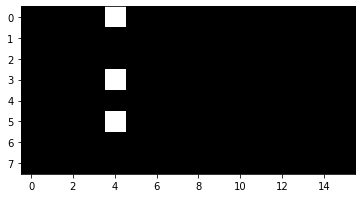

[]
(3, 3)


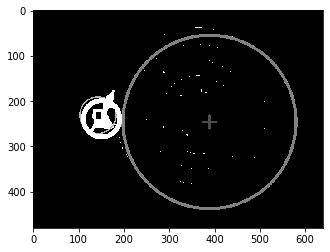

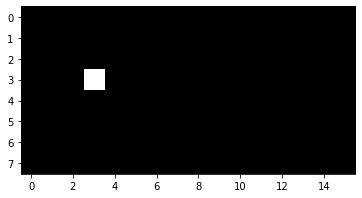

[]
(3, 4)


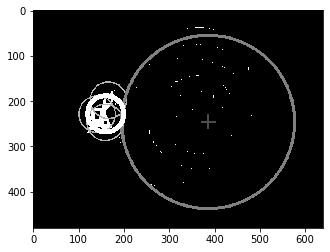

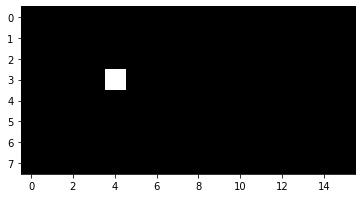

[(3, 4)]
(3, 4)


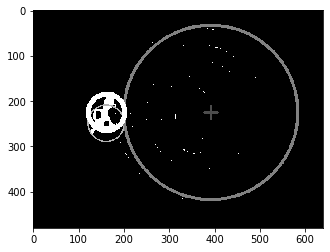

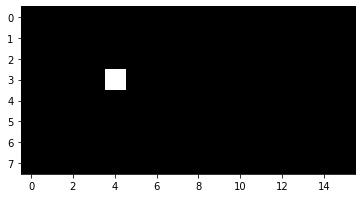

[(3, 4)]
(3, 3)


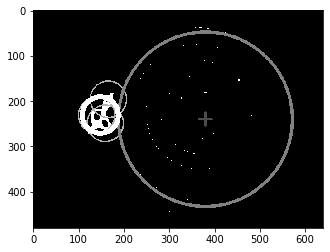

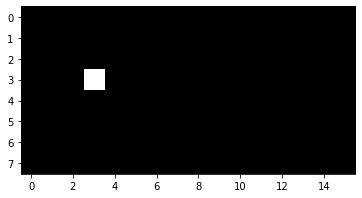

[(3, 3), (3, 4)]
(4, 3)


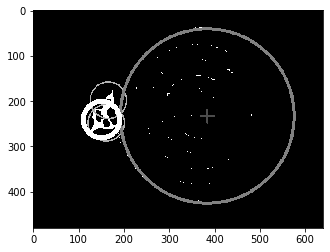

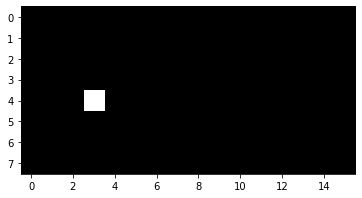

[(3, 3), (3, 4)]
(4, 3)


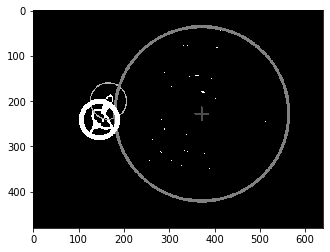

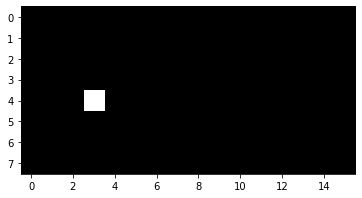

[(3, 4), (4, 3)]


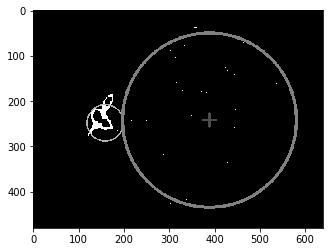

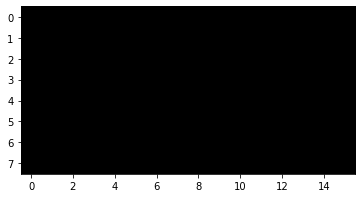

[(4, 3)]


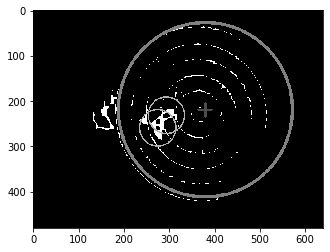

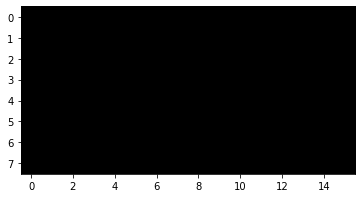

[(4, 3)]


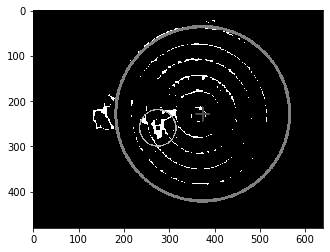

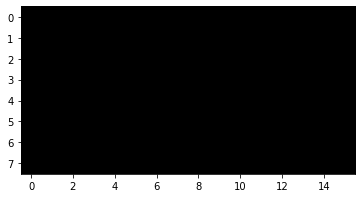

[(4, 3)]


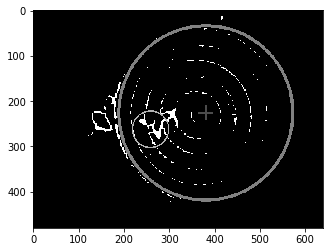

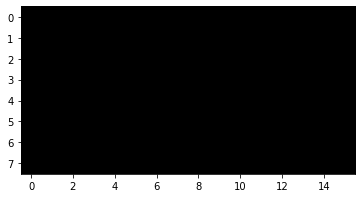

[]
(7, 6)
(5, 0)
(2, 0)


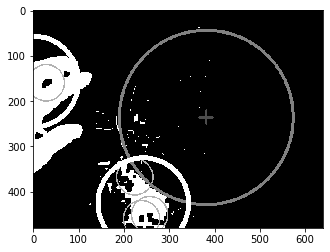

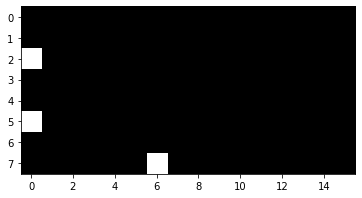

[]
(7, 7)
(4, 0)
(2, 0)


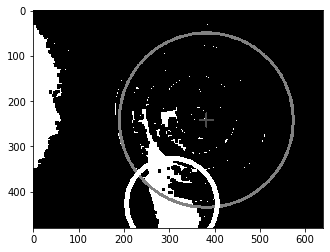

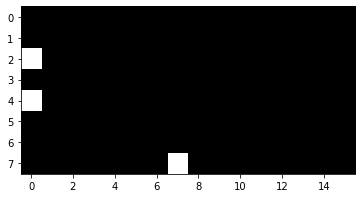

[(2, 0)]


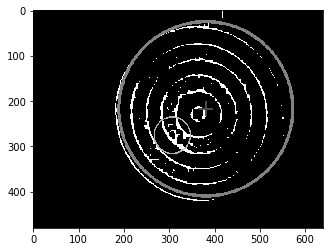

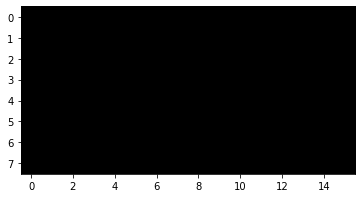

[(2, 0)]
(2, 10)


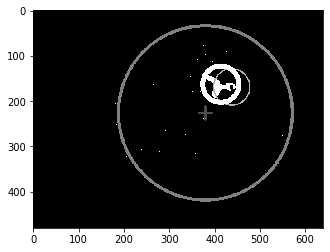

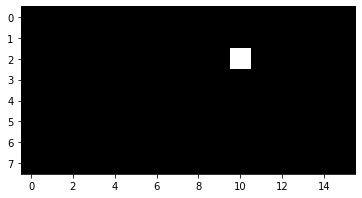

[(2, 0)]


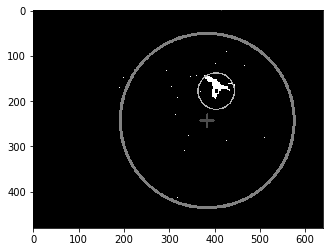

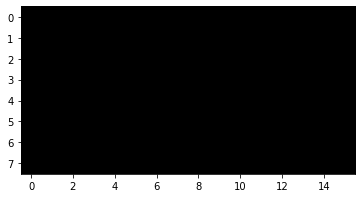

[(2, 0)]


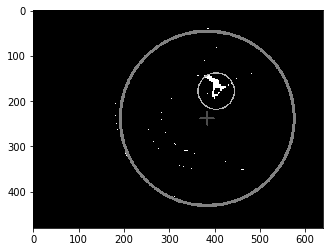

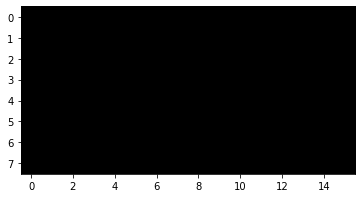

[]


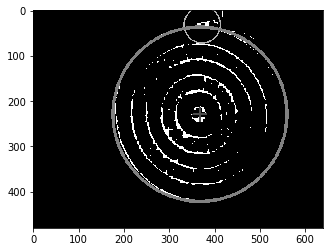

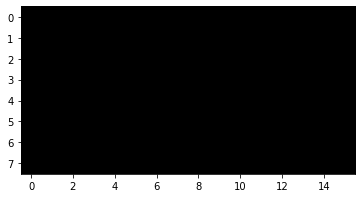

[]


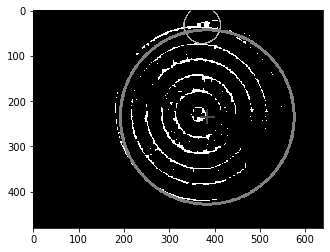

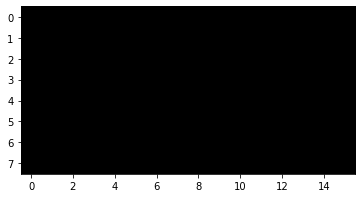

[]


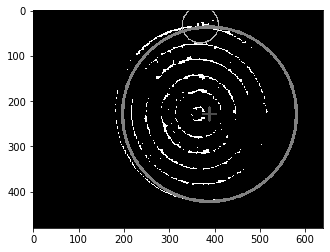

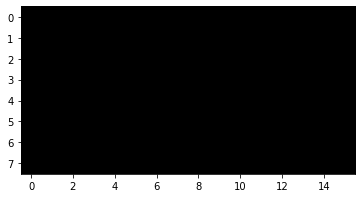

[]


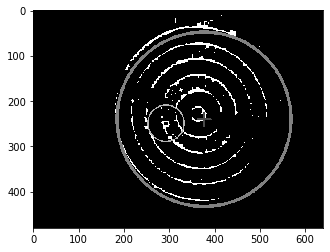

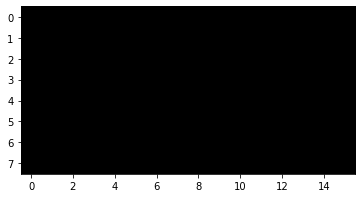

[]
(4, 7)


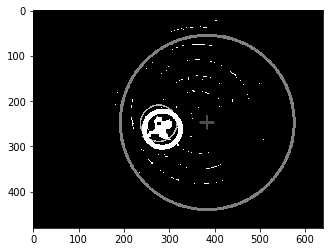

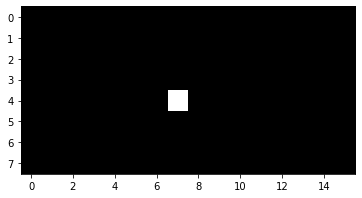

[]
(4, 6)


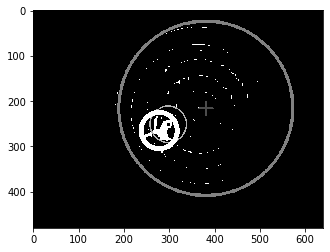

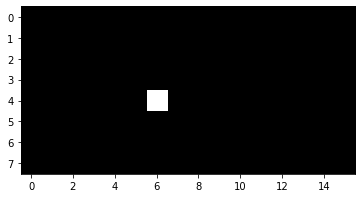

[]


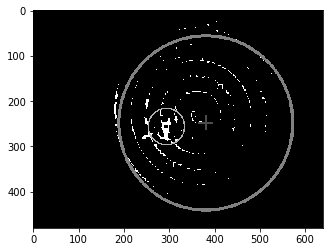

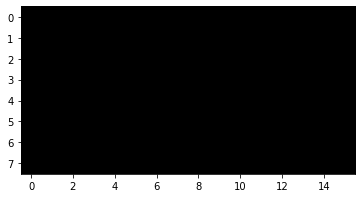

[]


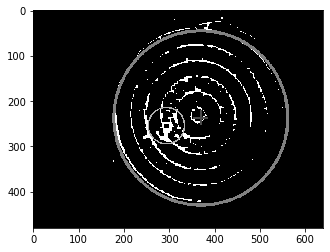

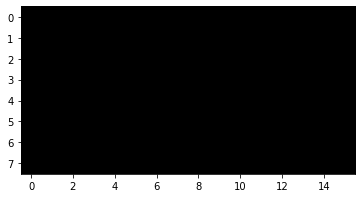

[]


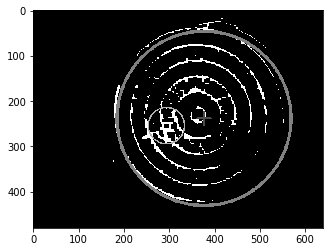

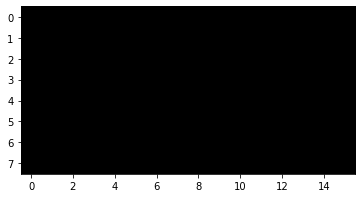

[]


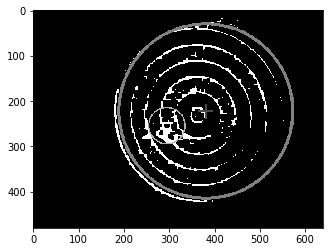

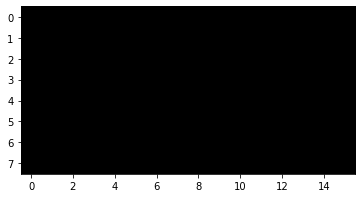

[]


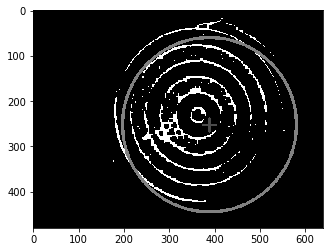

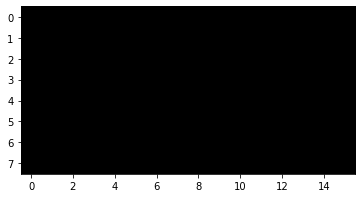

[]


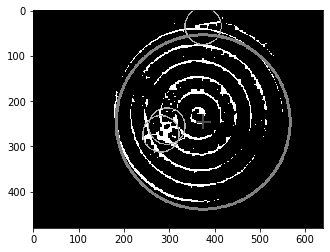

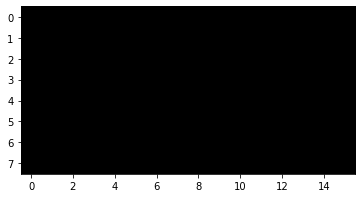

[]


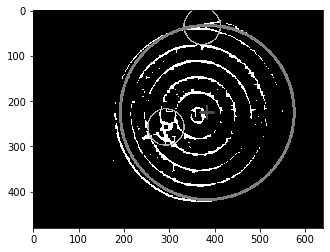

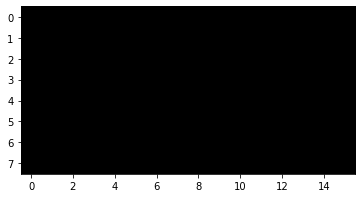

[]


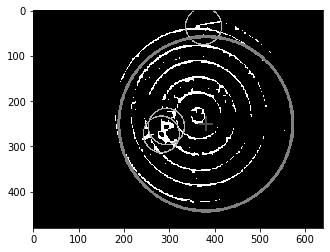

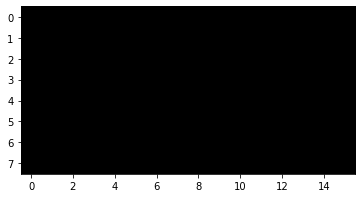

[]
(5, 9)


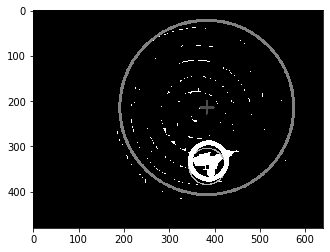

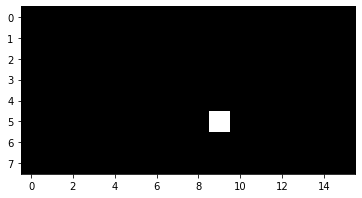

[]
(5, 9)


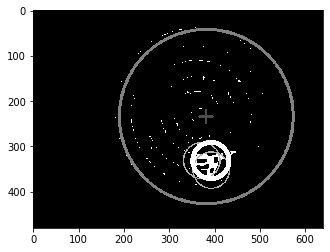

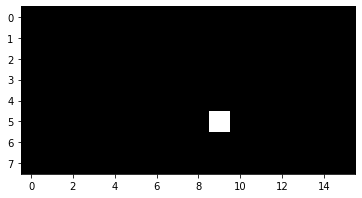

[(5, 9)]


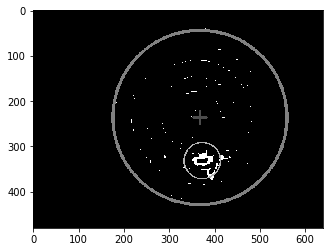

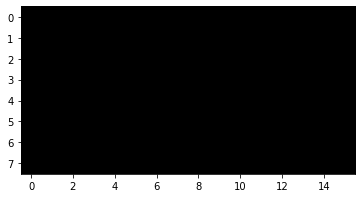

[(5, 9)]


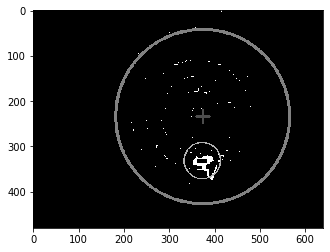

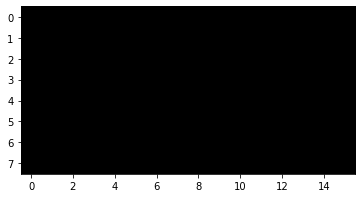

[(5, 9)]


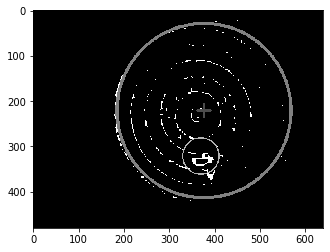

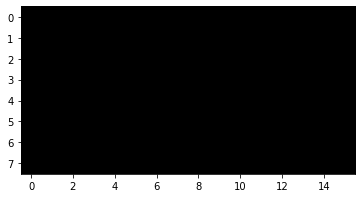

[(5, 9)]


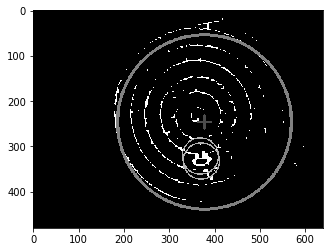

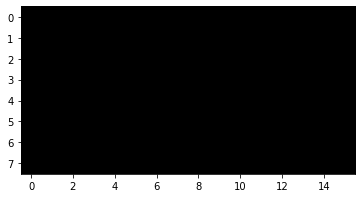

[]


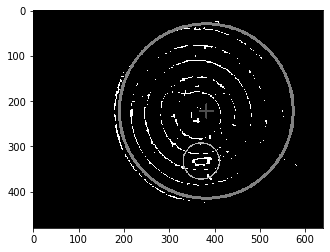

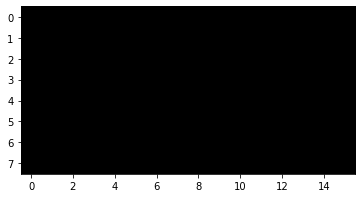

[]


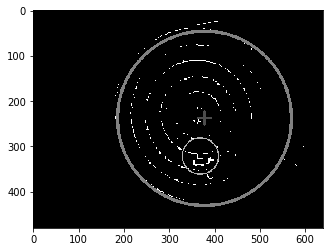

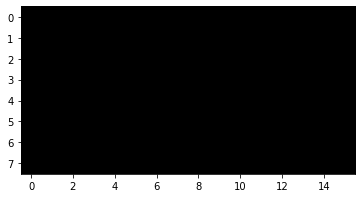

[]


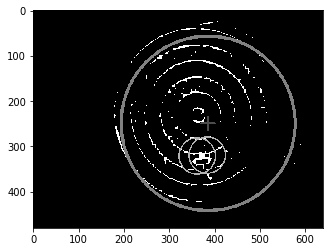

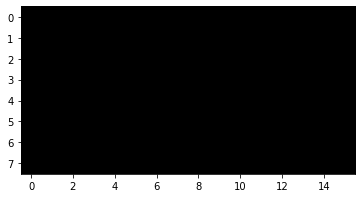

[]


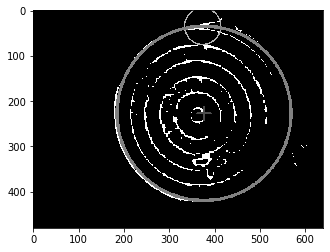

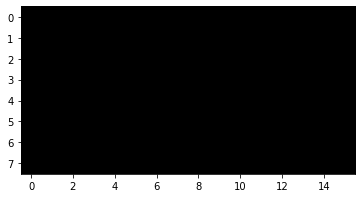

[]


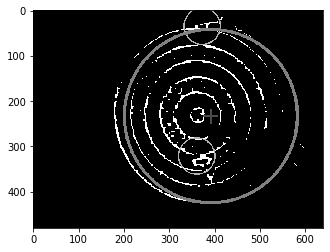

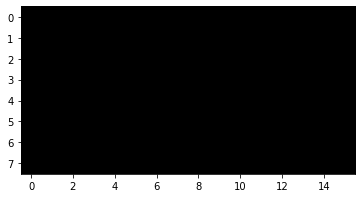

[]


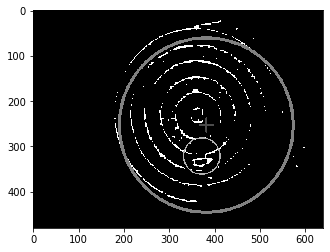

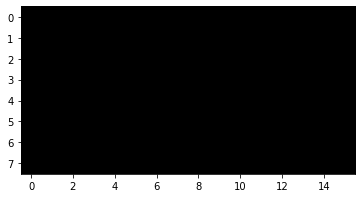

[]


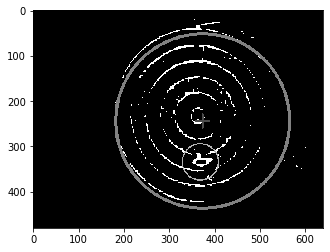

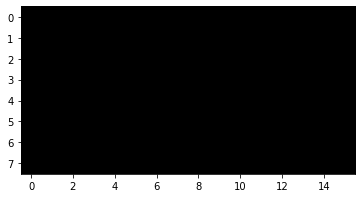

[]
(7, 0)
(5, 0)
(5, 1)
(4, 0)
(3, 0)


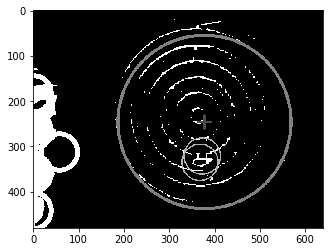

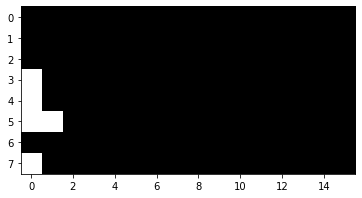

[]
(7, 14)
(0, 15)


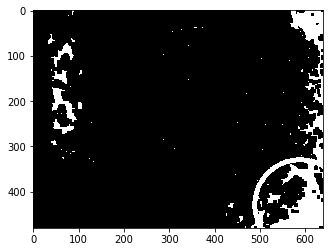

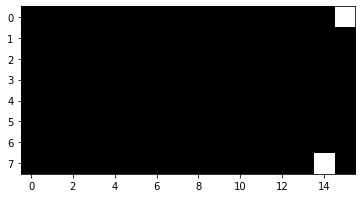

[]
(7, 14)
(4, 15)
(0, 15)


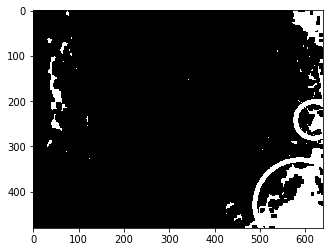

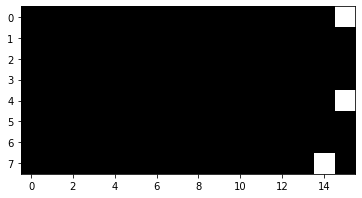

[(0, 15), (7, 14)]
(7, 14)
(4, 15)
(0, 15)


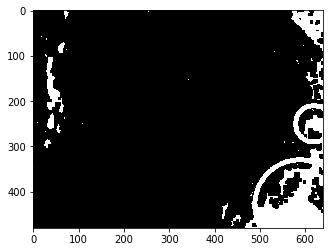

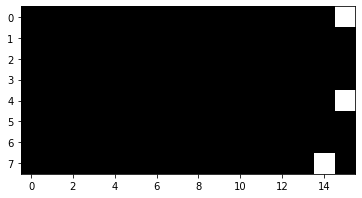

[(0, 15), (4, 15), (7, 14)]
(7, 14)
(4, 15)
(2, 0)
(0, 15)


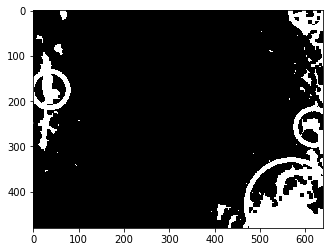

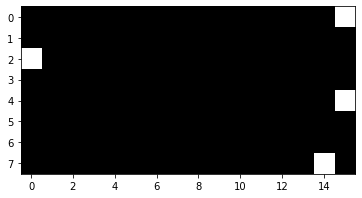

[(0, 15), (4, 15), (7, 14)]


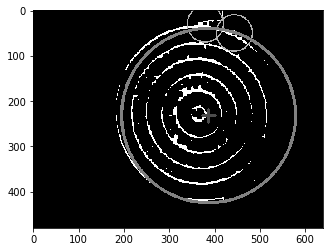

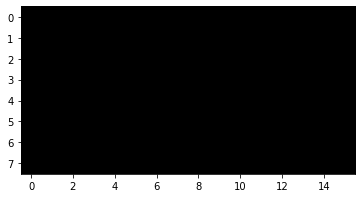

[(0, 15), (4, 15), (7, 14)]


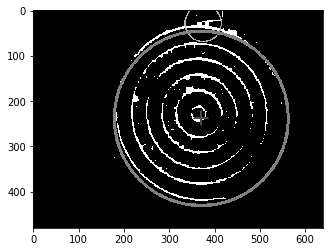

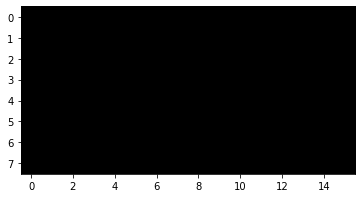

[(0, 15), (4, 15), (7, 14)]


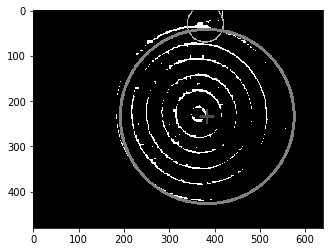

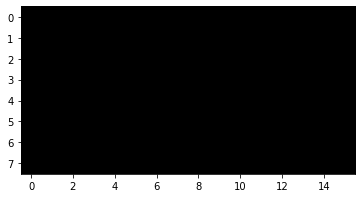

[(0, 15), (4, 15), (7, 14)]
(3, 9)


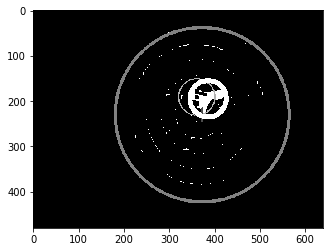

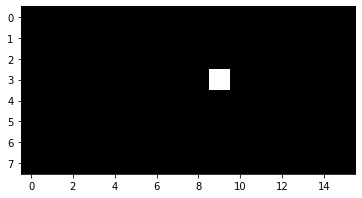

[]
(3, 9)


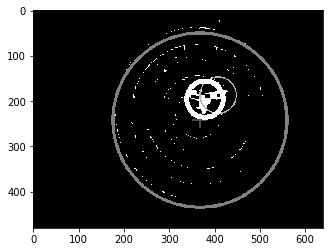

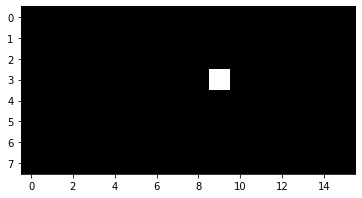

[(3, 9)]


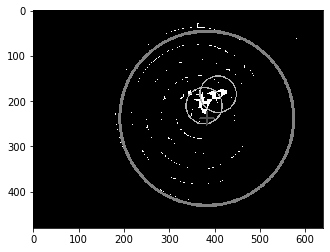

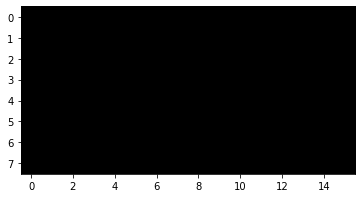

[(3, 9)]


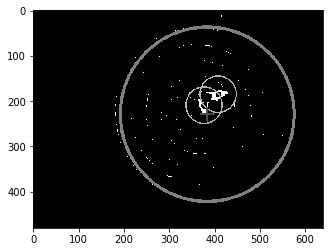

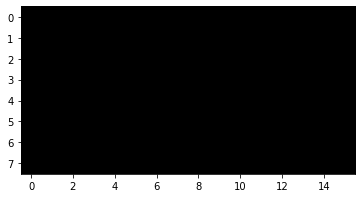

[(3, 9)]


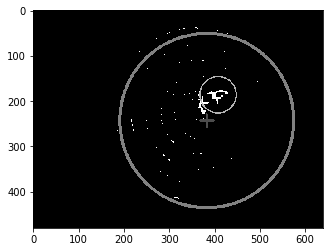

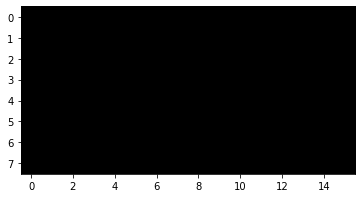

[(3, 9)]


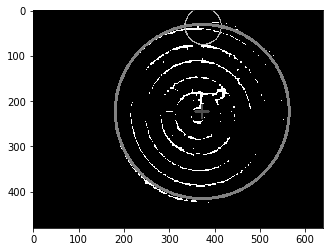

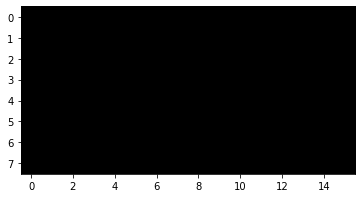

[]


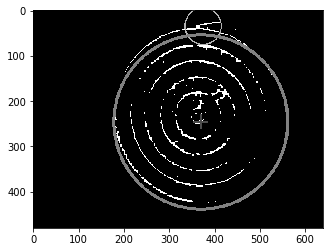

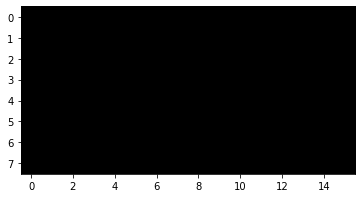

[]


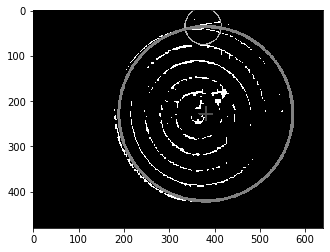

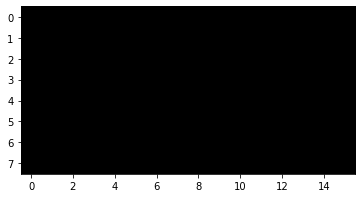

[]
(7, 5)
(4, 3)


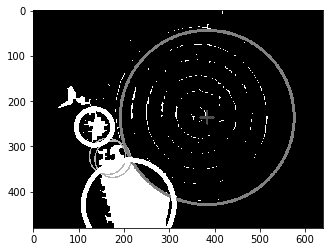

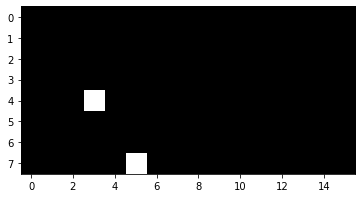

[]
(3, 1)


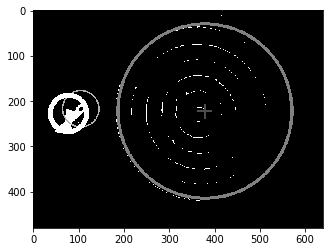

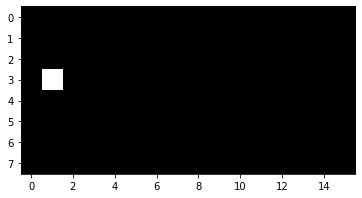

[]
(4, 2)


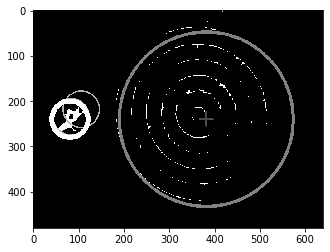

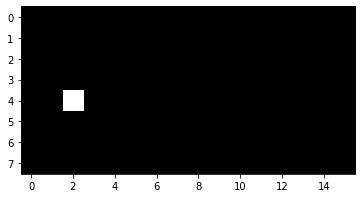

[]


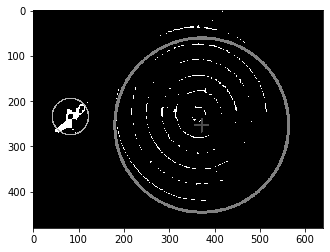

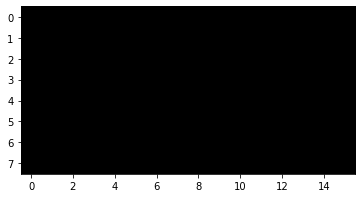

[]


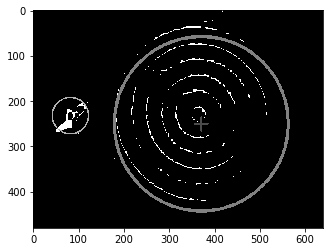

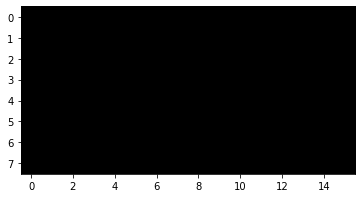

[]


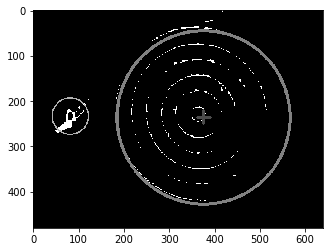

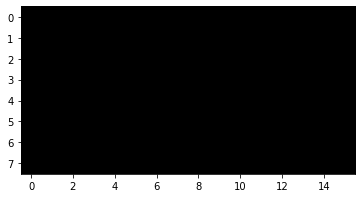

[]


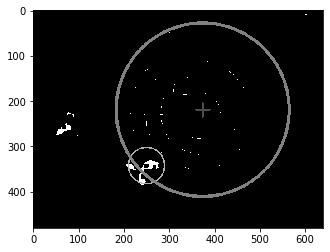

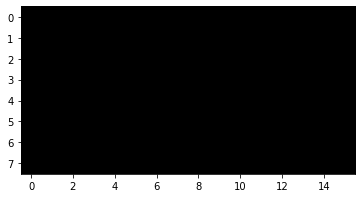

[]


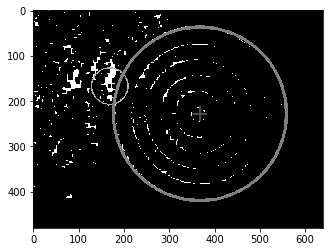

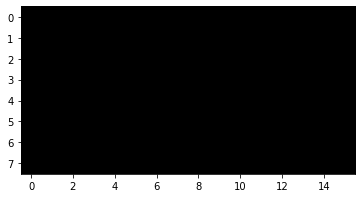

[]


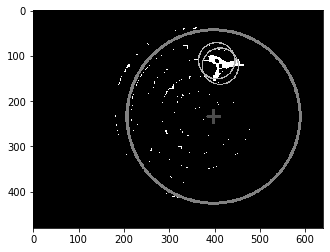

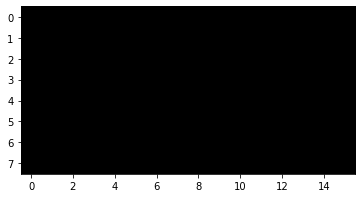

[]
(6, 7)


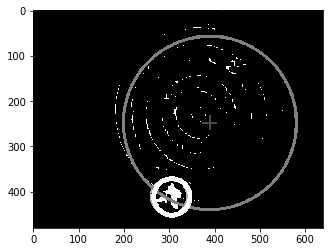

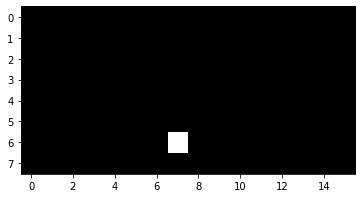

[]


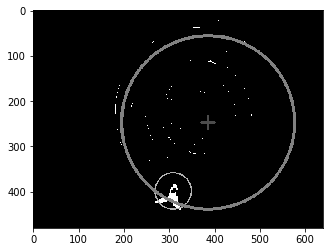

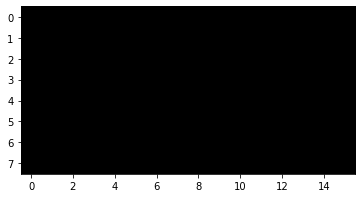

[]


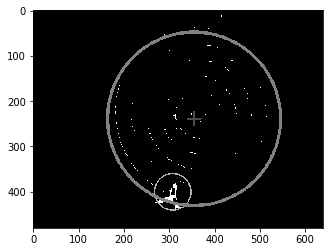

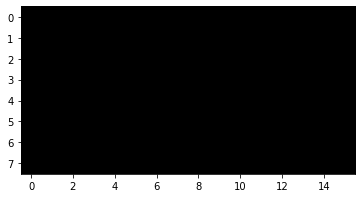

[]


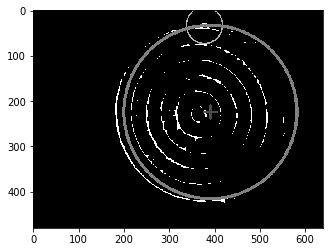

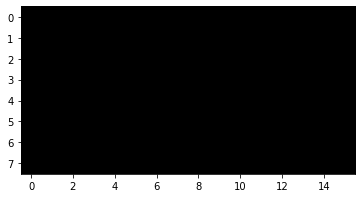

[]


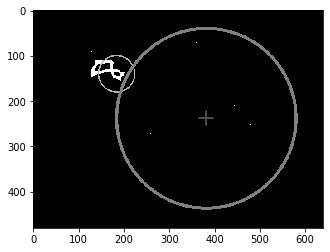

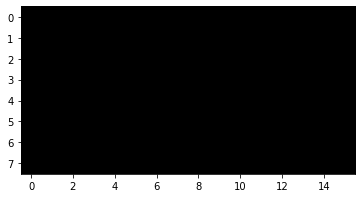

[]


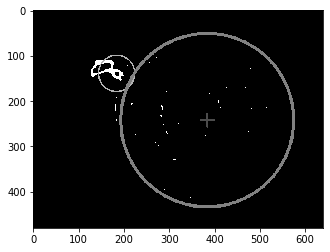

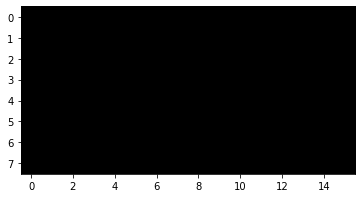

[]


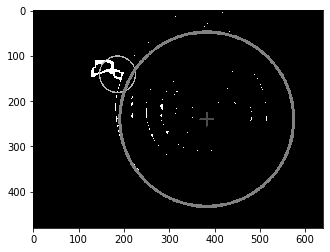

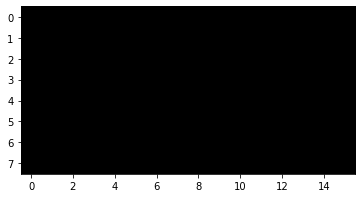

[]


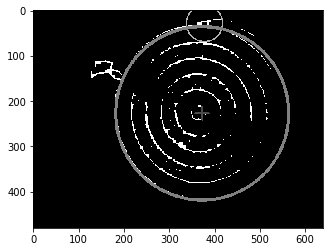

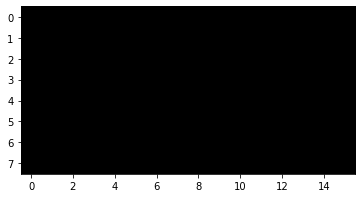

[]


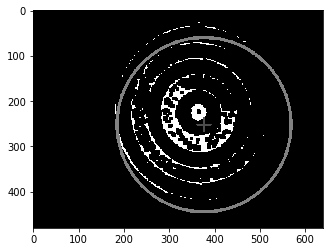

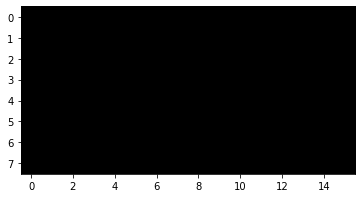

[]


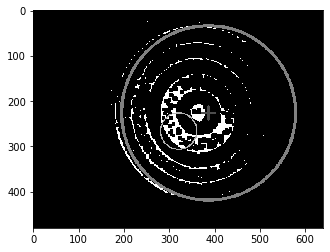

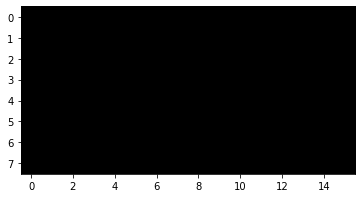

[]


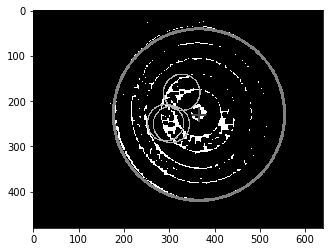

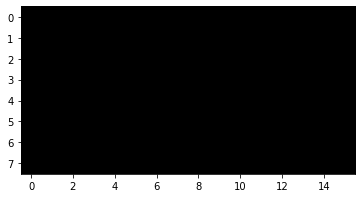

[]


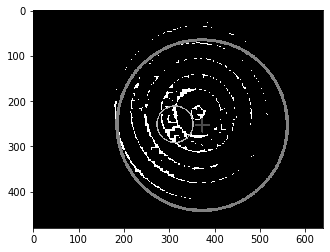

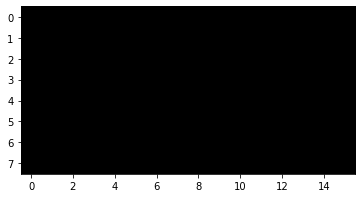

[]


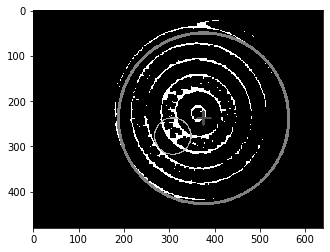

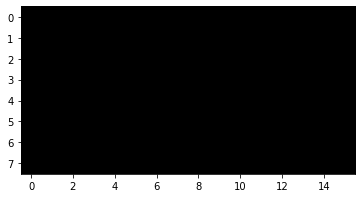

[]


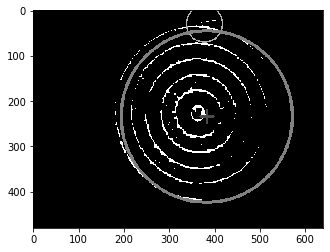

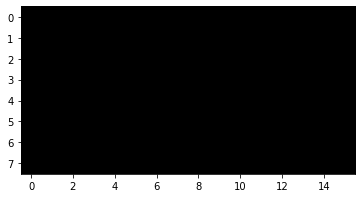

[]


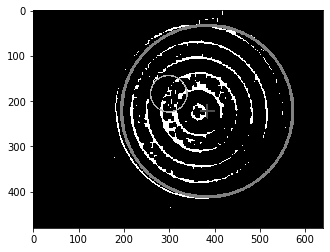

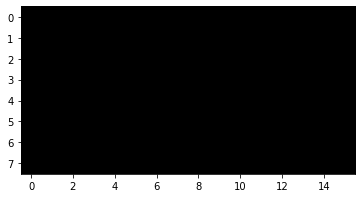

[]


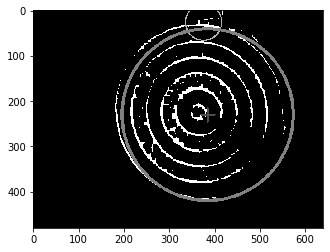

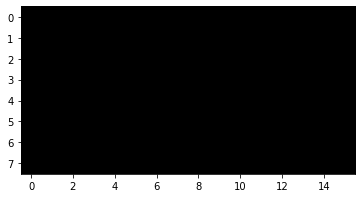

[]
(3, 7)


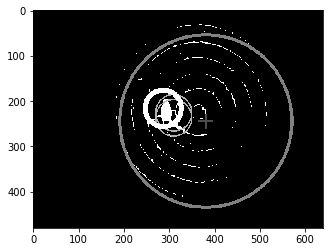

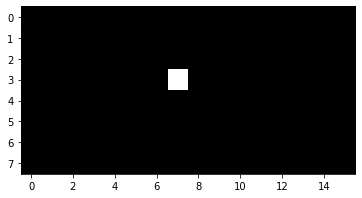

[]


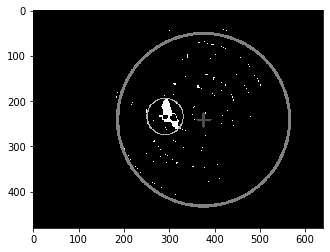

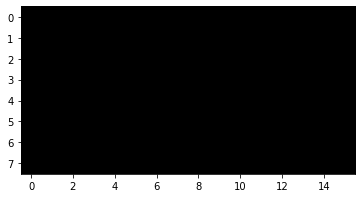

[]


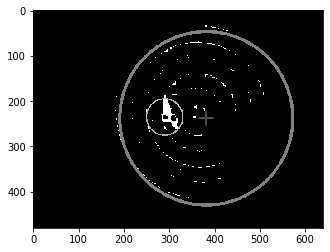

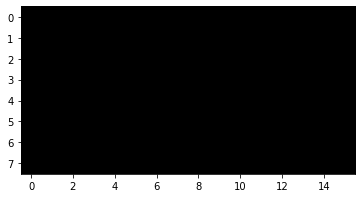

[]


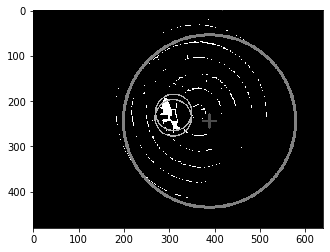

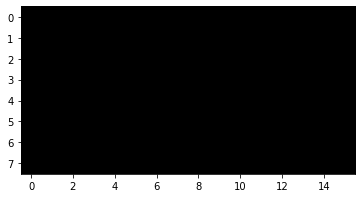

[]
(3, 7)


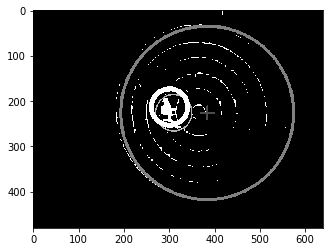

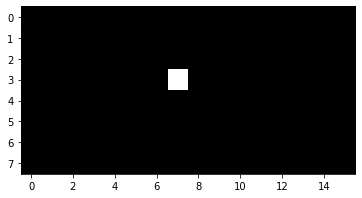

[(3, 7)]


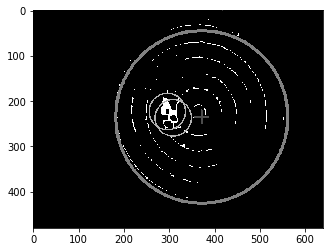

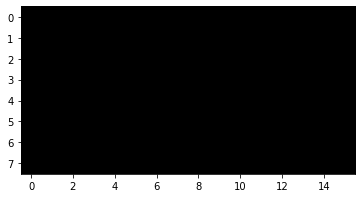

[]


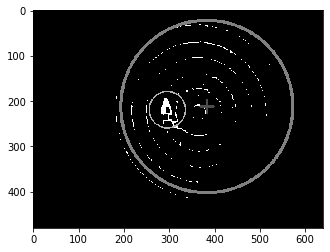

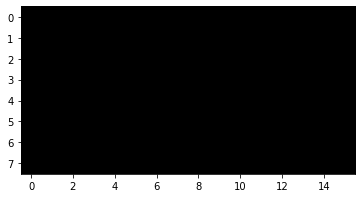

[]


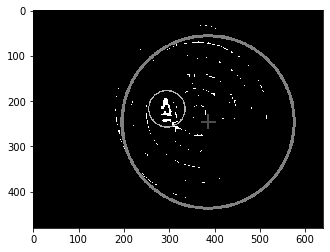

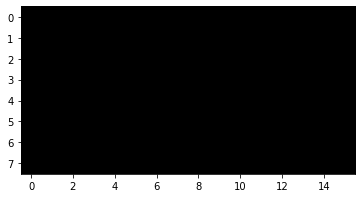

[]


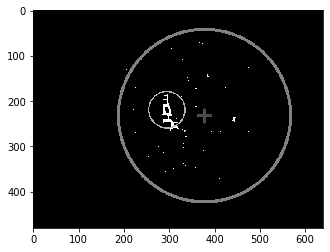

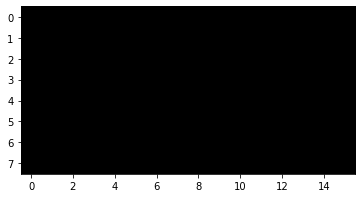

[]


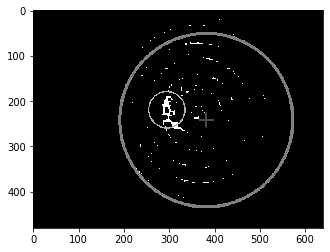

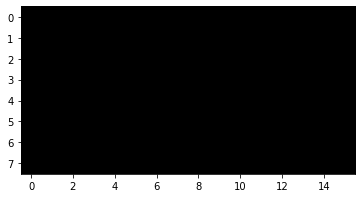

[]


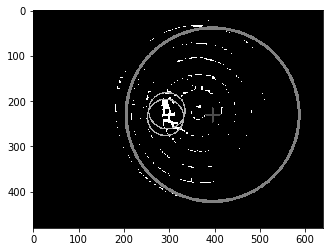

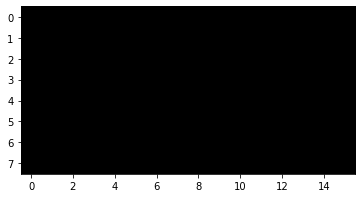

[]


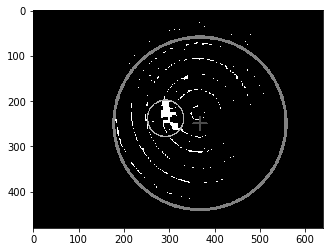

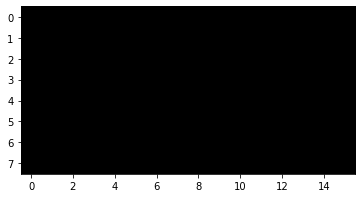

[]


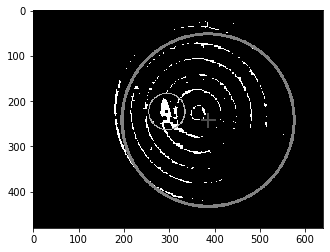

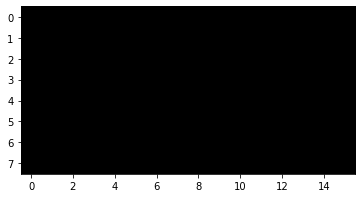

[]


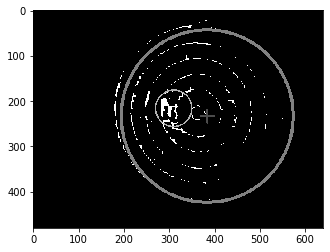

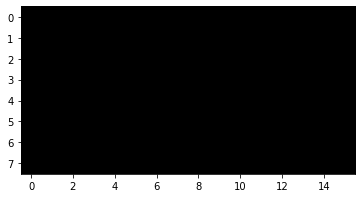

[]


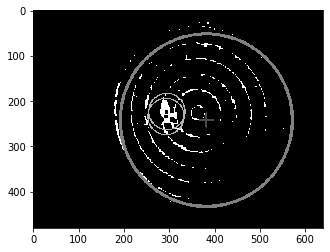

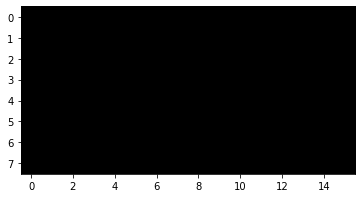

[]


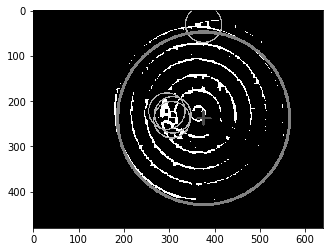

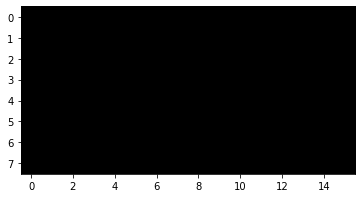

[]


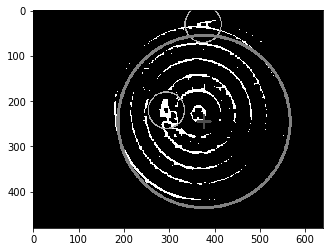

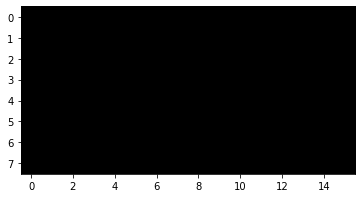

[]
(7, 2)
(7, 4)


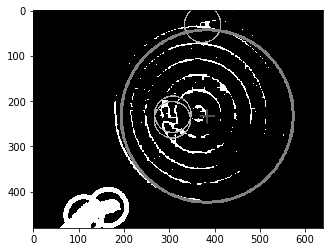

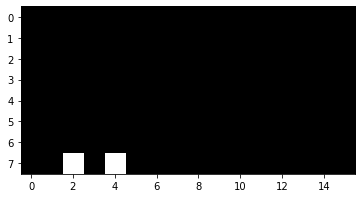

[]


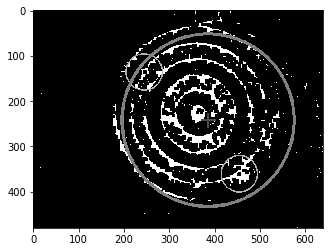

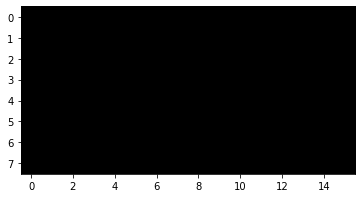

[]


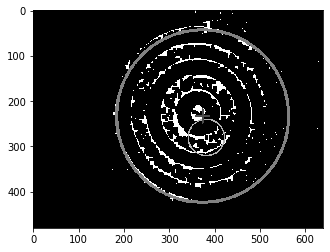

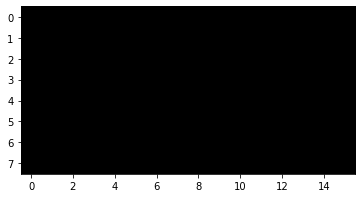

[]


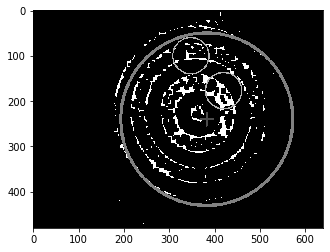

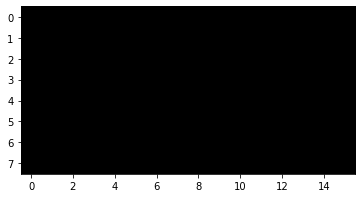

[]


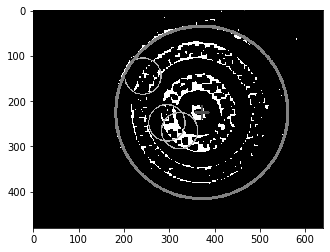

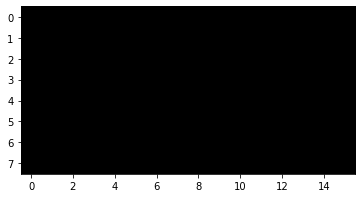

[]


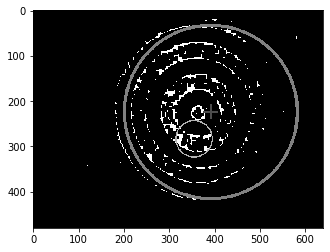

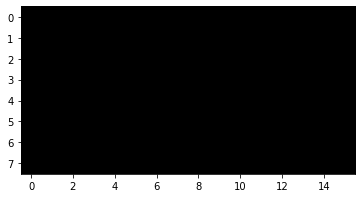

[]


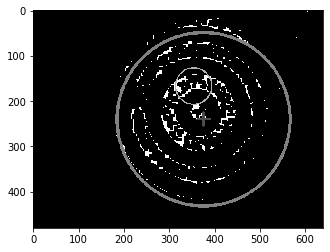

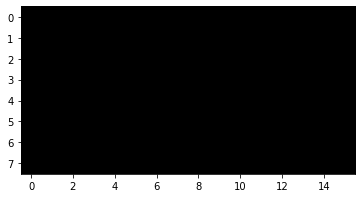

[]


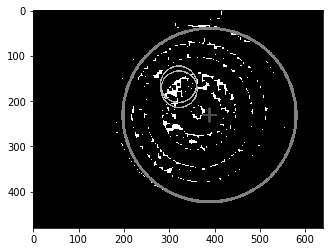

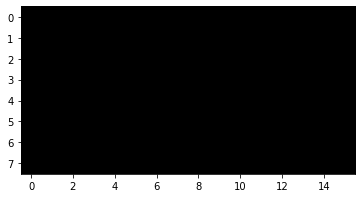

[]


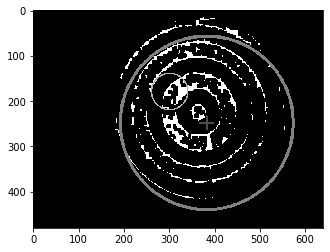

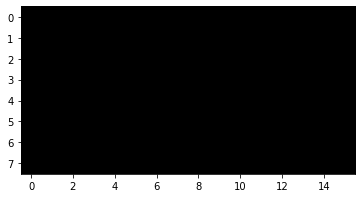

[]


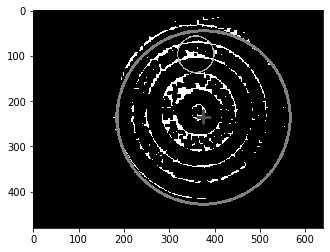

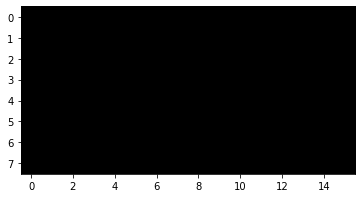

[]


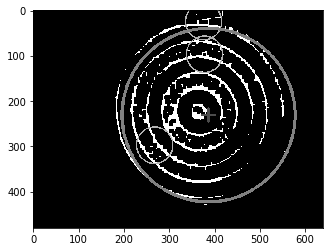

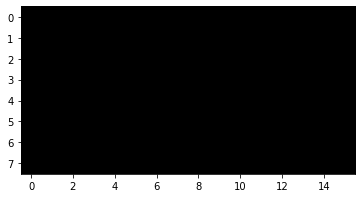

[]


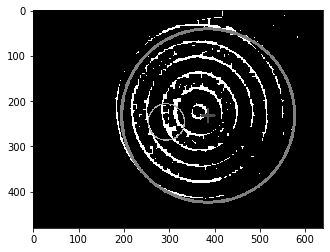

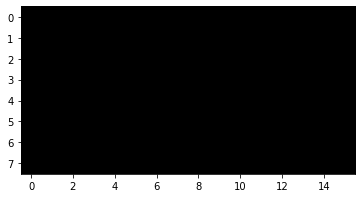

[]
(4, 7)


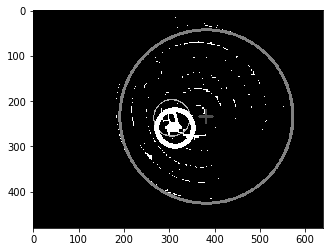

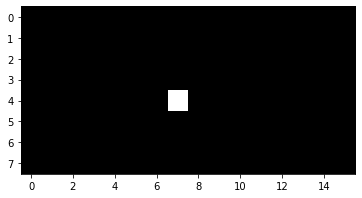

[]


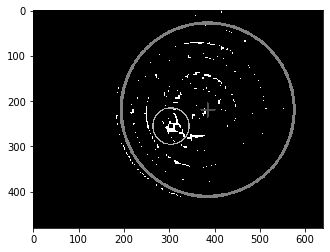

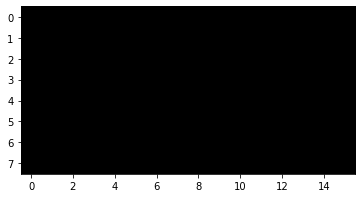

[]
(4, 7)


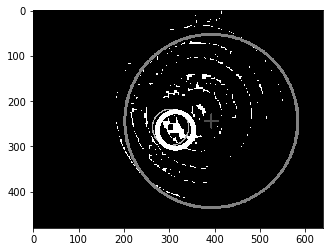

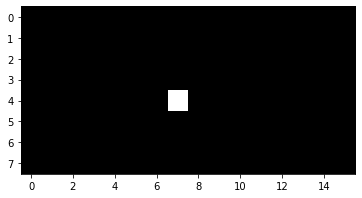

[(4, 7)]


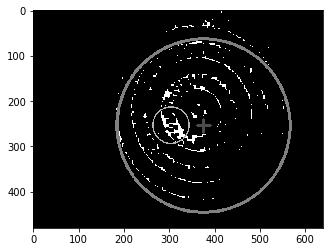

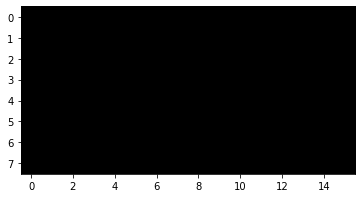

[(4, 7)]


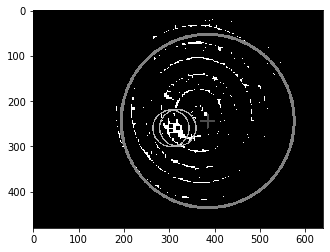

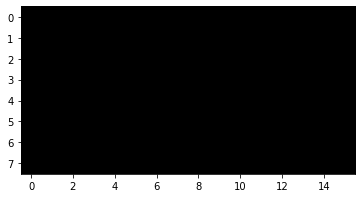

[(4, 7)]


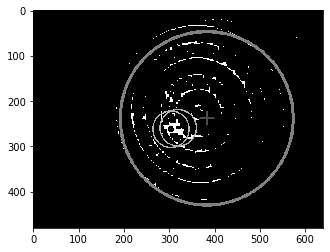

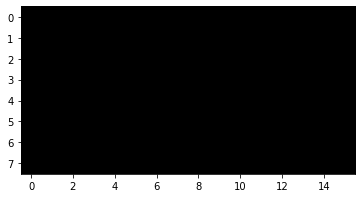

[]


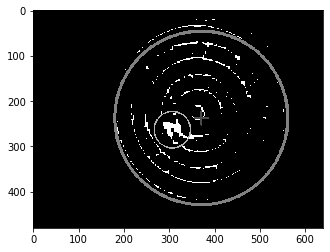

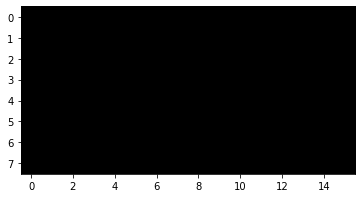

[]


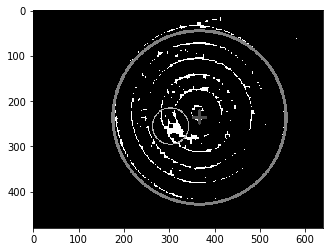

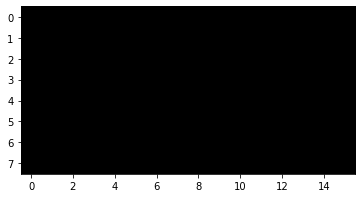

[]


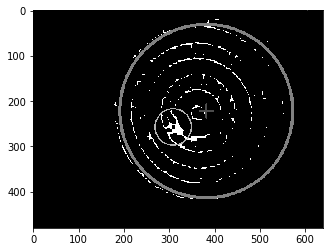

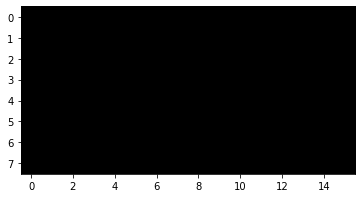

[]


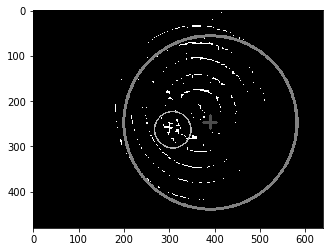

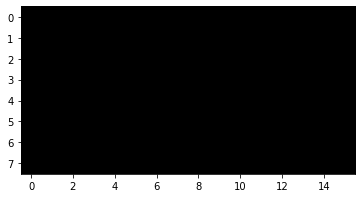

[]
(7, 9)


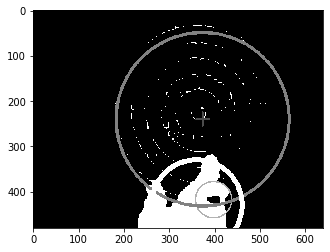

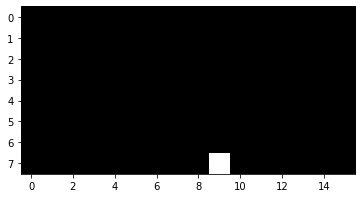

[]
(4, 8)
(4, 0)
(3, 0)


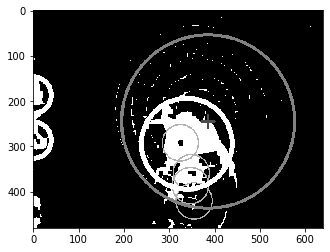

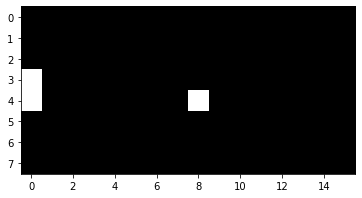

[]
(4, 8)


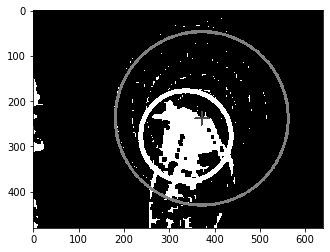

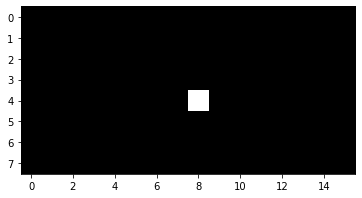

[(4, 8)]
(7, 7)
(4, 8)


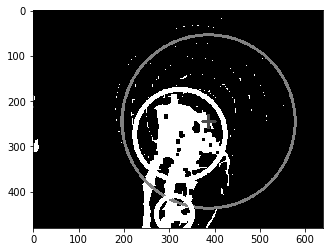

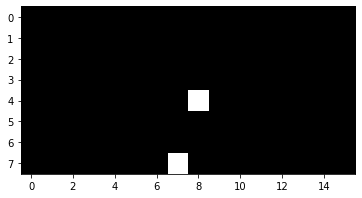

[(4, 8)]


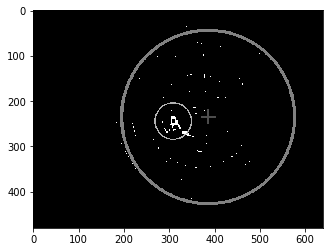

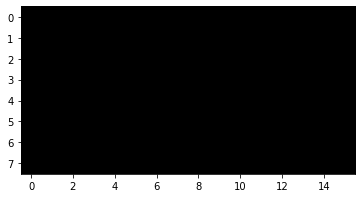

[(4, 8)]


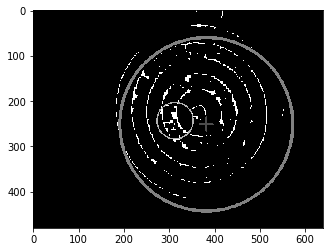

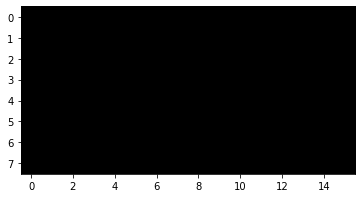

[(4, 8)]


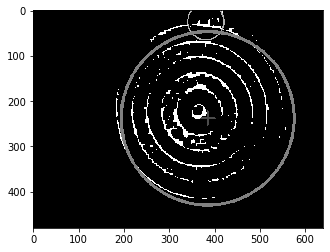

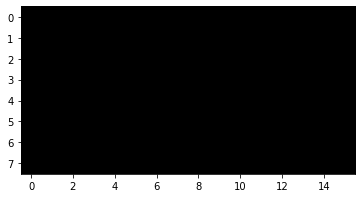

[(4, 8)]


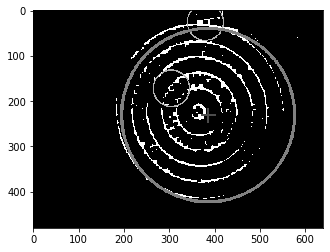

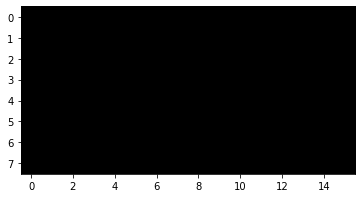

[]
(1, 7)


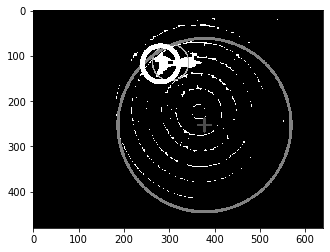

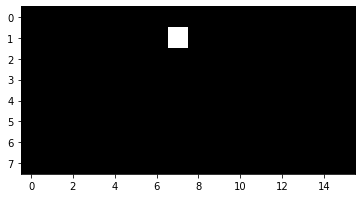

[]
(1, 7)


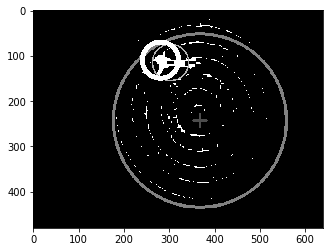

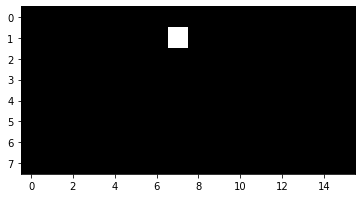

[(1, 7)]


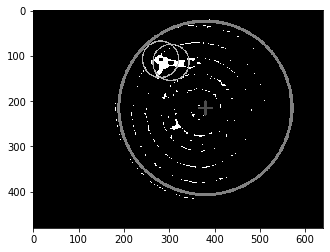

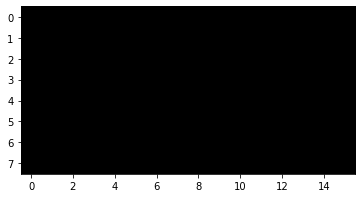

[(1, 7)]
(1, 7)


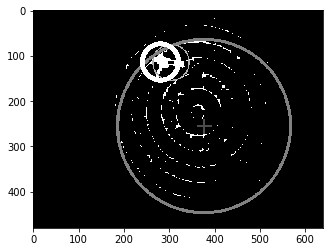

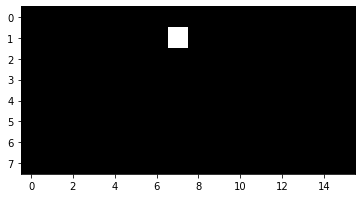

[(1, 7)]
(1, 7)


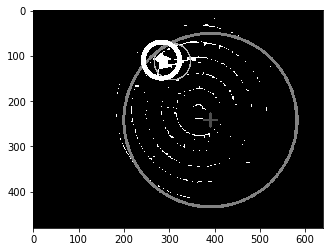

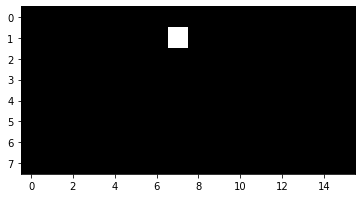

[(1, 7)]


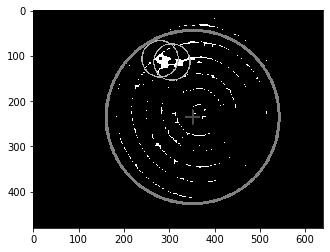

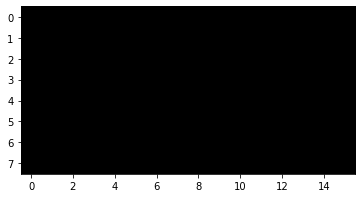

[(1, 7)]


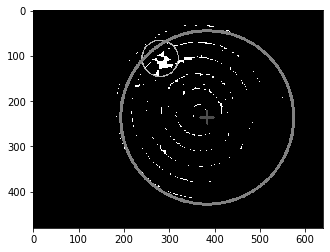

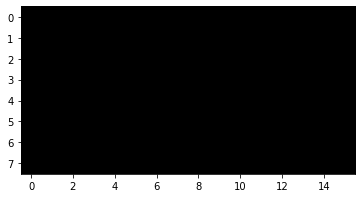

[(1, 7)]


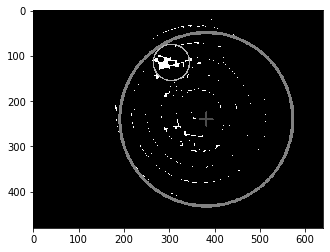

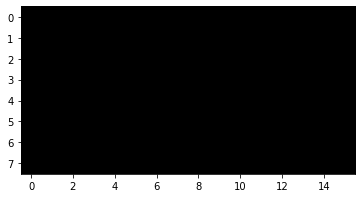

[(1, 7)]


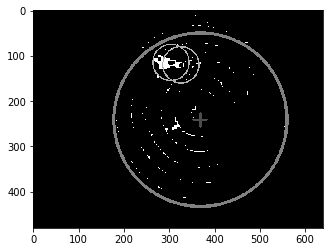

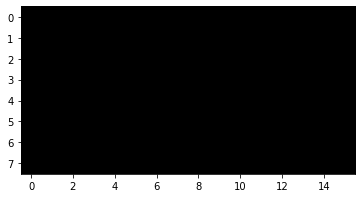

[]


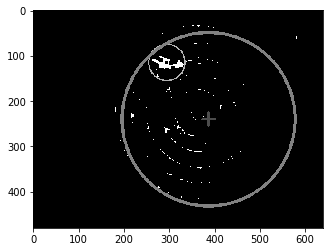

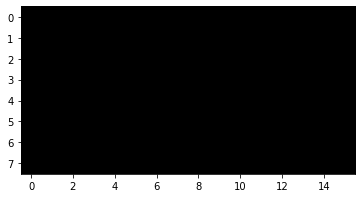

[]


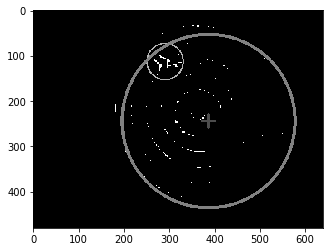

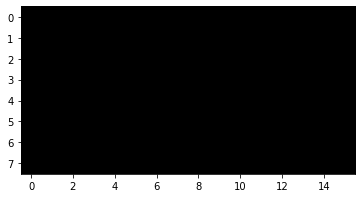

[]


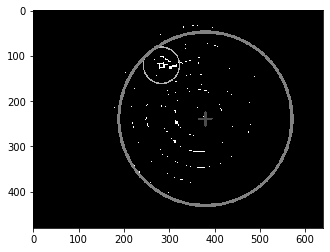

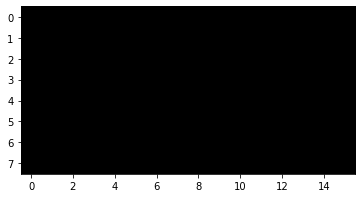

[]


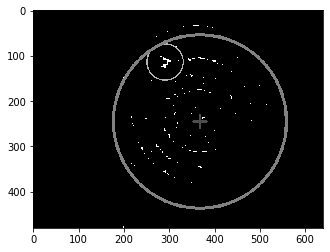

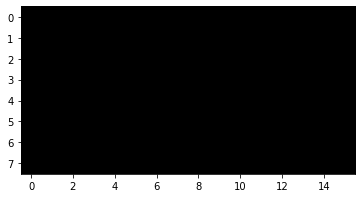

[]


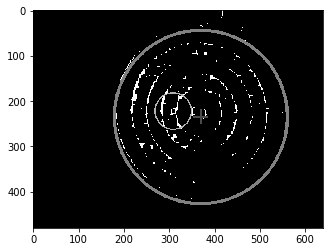

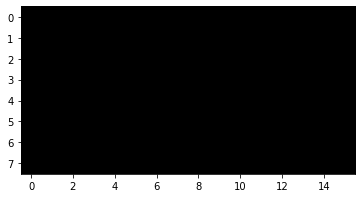

[]


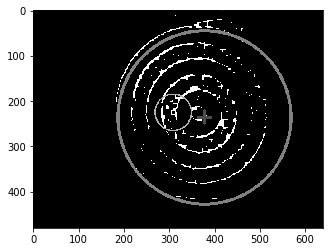

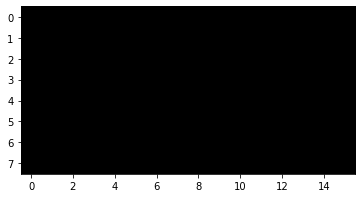

[]


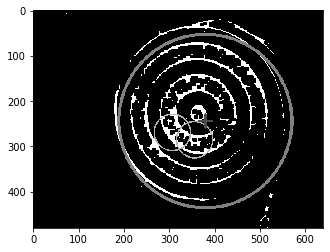

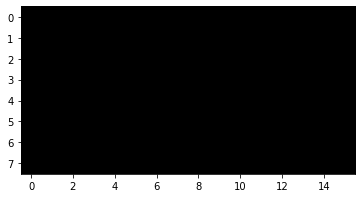

[]


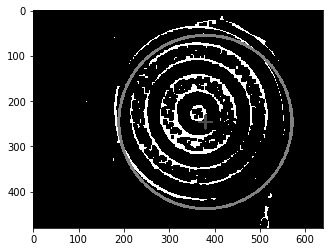

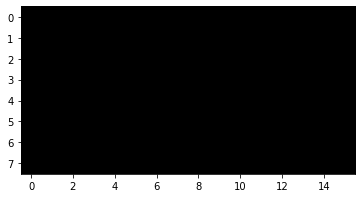

[]


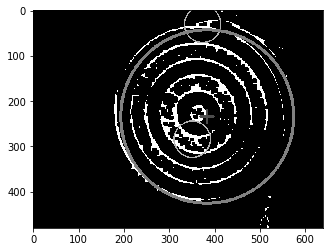

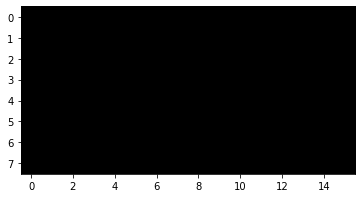

[]


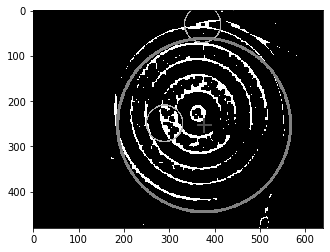

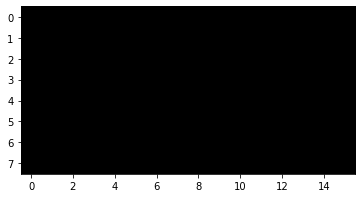

[]


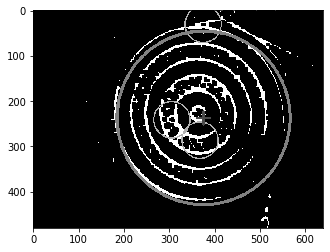

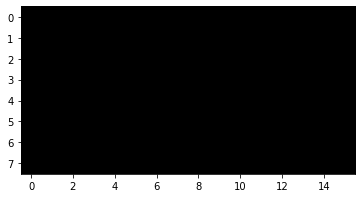

[]
(7, 0)
(5, 0)
(5, 1)
(4, 0)


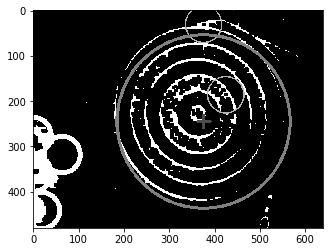

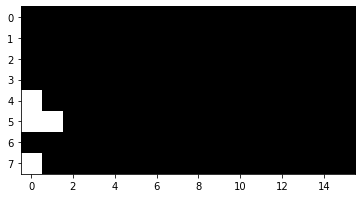

[]
(4, 0)
(3, 0)
(0, 0)


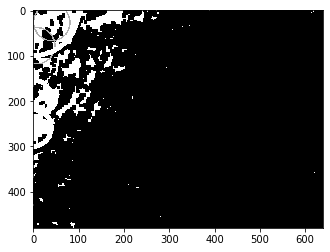

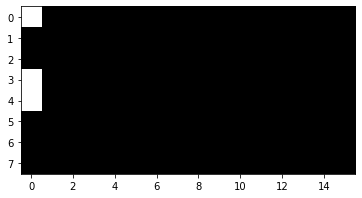

[(4, 0)]
(3, 0)
(0, 4)
(0, 0)


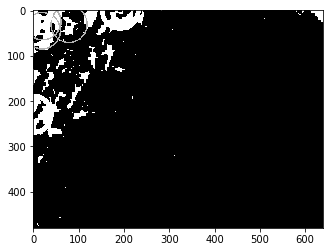

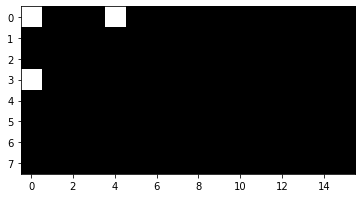

[(0, 0), (3, 0), (4, 0)]
(3, 0)
(0, 15)


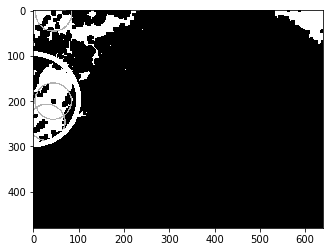

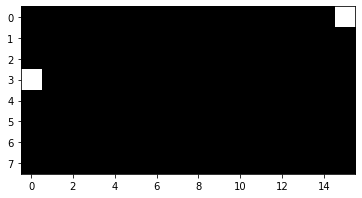

[(0, 0), (3, 0), (4, 0)]


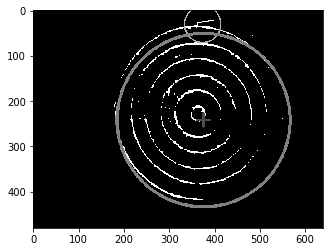

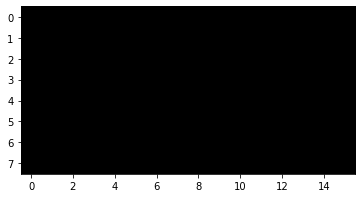

[(0, 0), (3, 0), (4, 0)]
(3, 7)


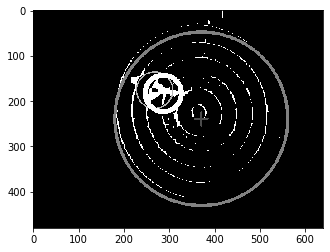

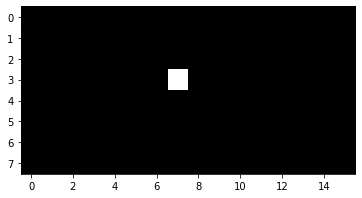

[(0, 0), (3, 0)]
(3, 9)


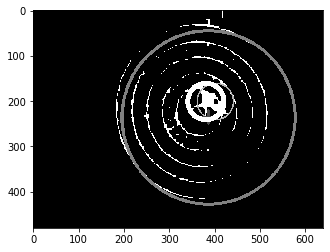

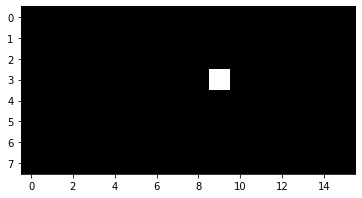

[(3, 0)]
(3, 9)


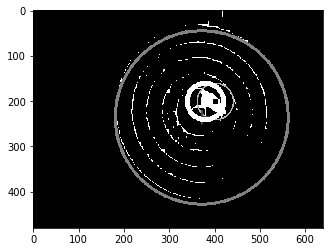

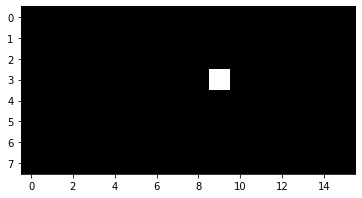

[(3, 9)]
(3, 9)


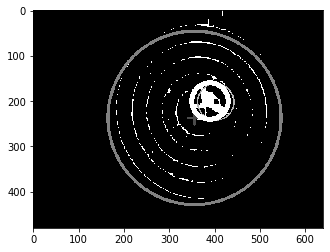

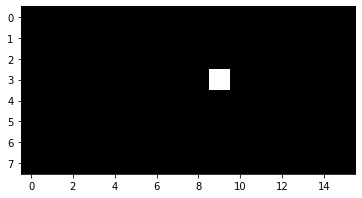

[(3, 9)]
(3, 9)


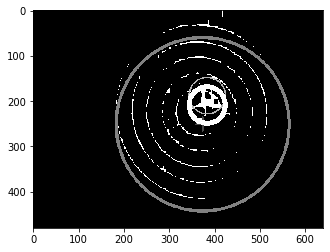

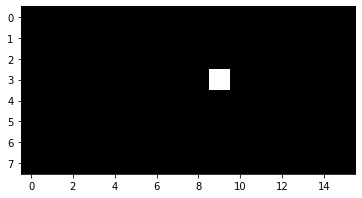

[(3, 9)]


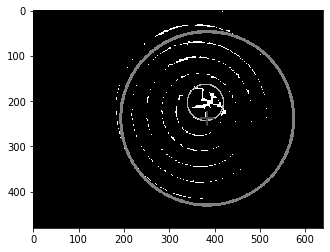

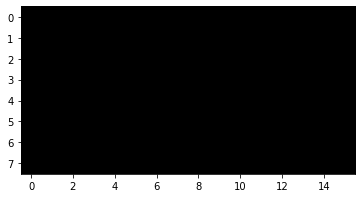

[(3, 9)]


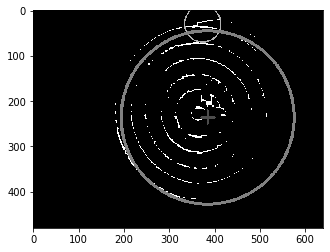

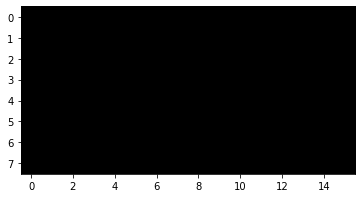

[(3, 9)]


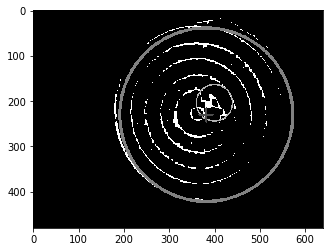

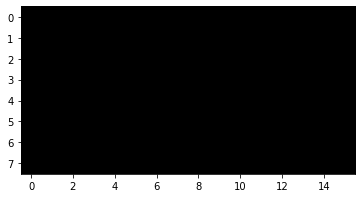

[(3, 9)]


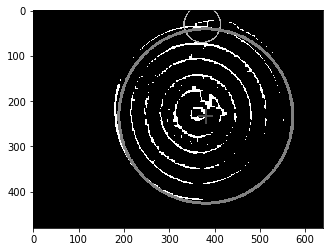

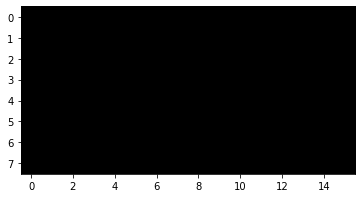

[]


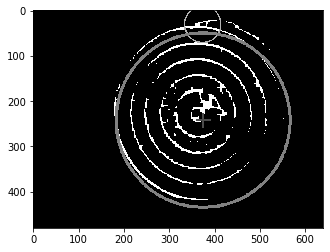

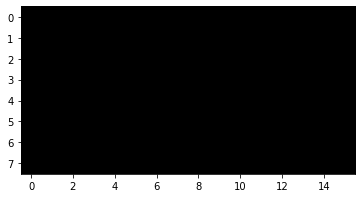

[]


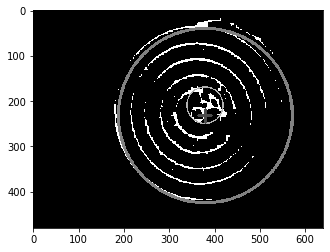

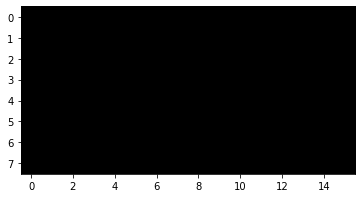

[]


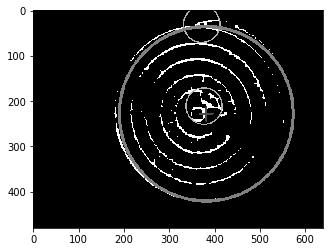

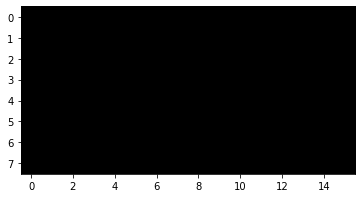

[]


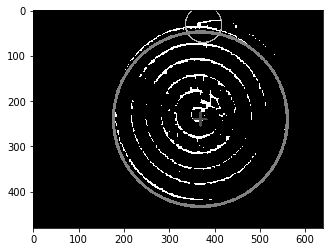

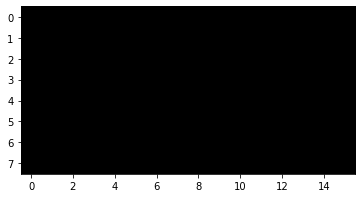

[]


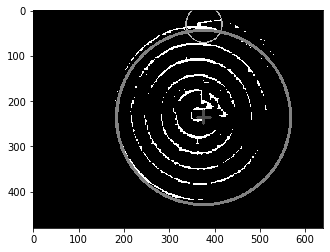

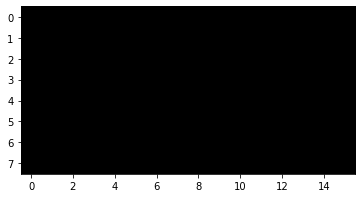

[]
(2, 9)


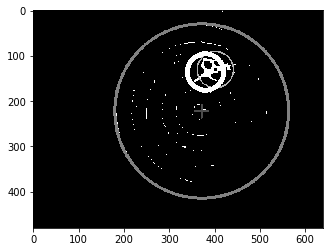

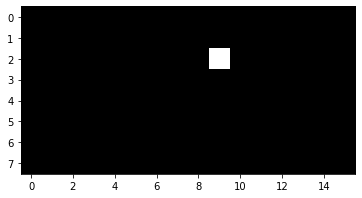

[]


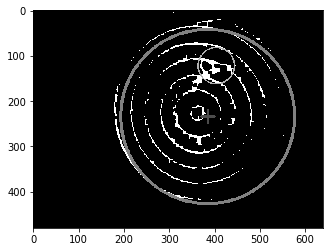

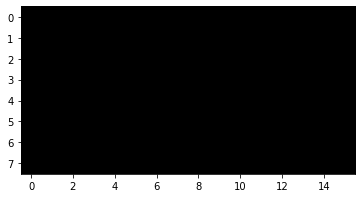

[]
(5, 12)
(2, 12)
(1, 11)
(0, 8)


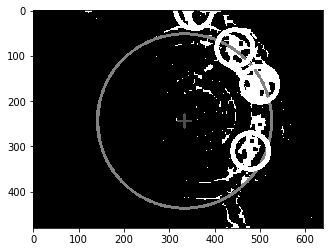

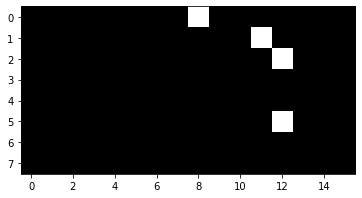

[]
(7, 11)
(7, 15)
(6, 11)
(5, 9)
(0, 8)


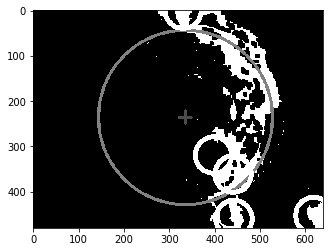

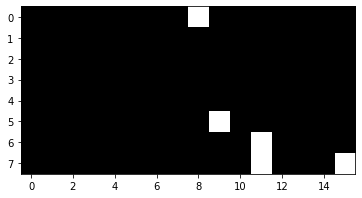

[(0, 8)]
(3, 7)


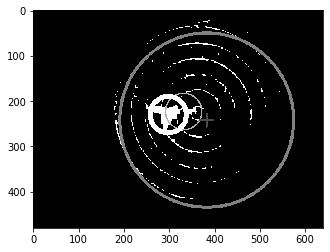

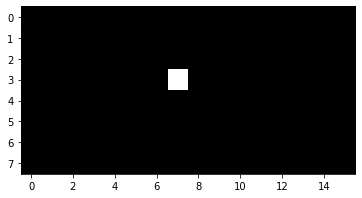

[(0, 8)]
(3, 7)


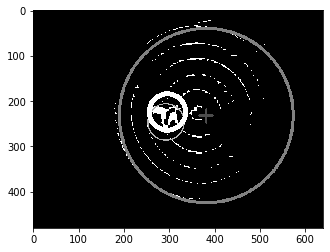

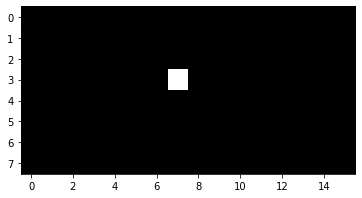

[(0, 8), (3, 7)]


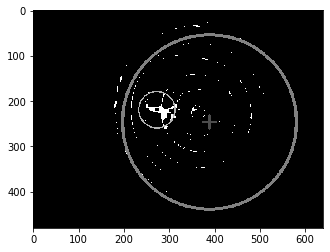

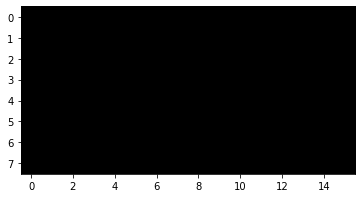

[(0, 8), (3, 7)]


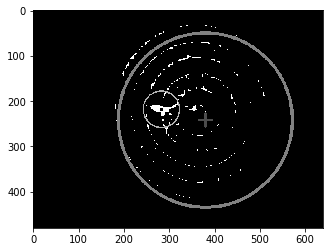

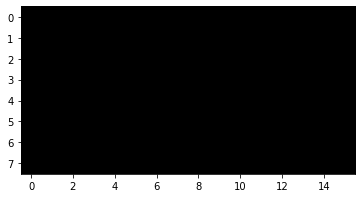

[(3, 7)]


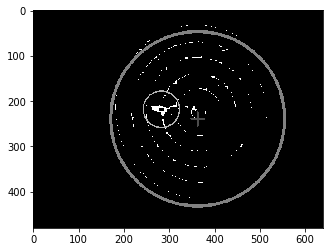

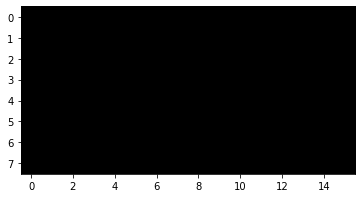

[(3, 7)]


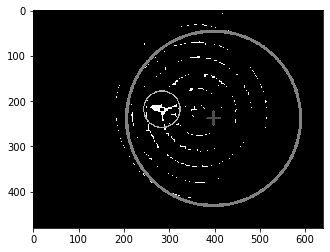

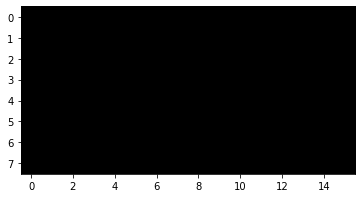

[]


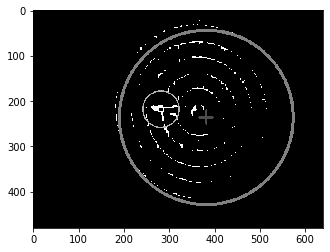

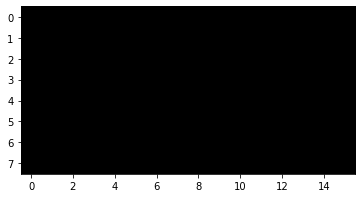

[]
(3, 7)


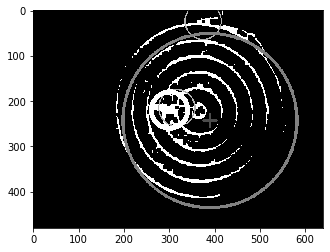

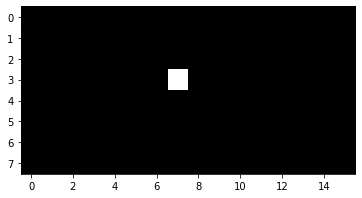

[]


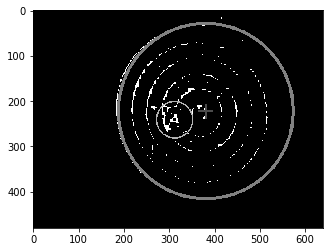

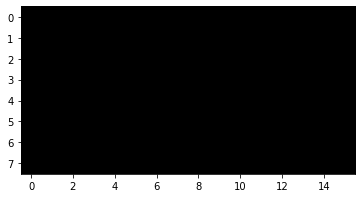

[]


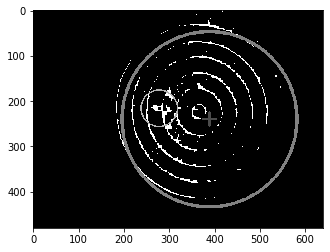

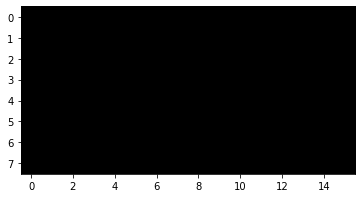

[]


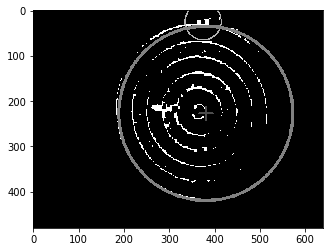

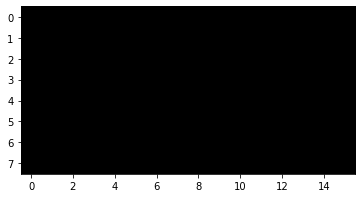

[]


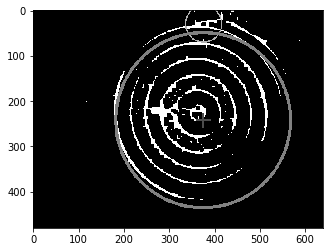

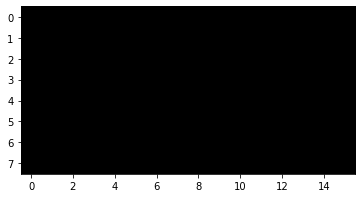

[]
(3, 7)


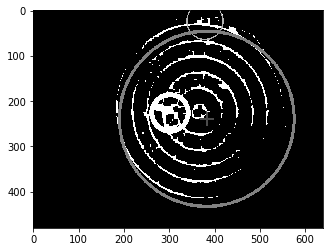

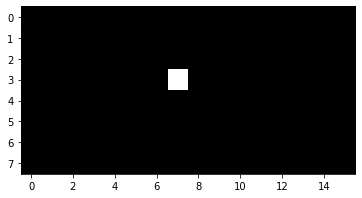

[]


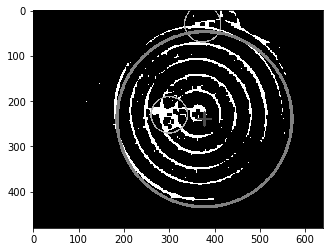

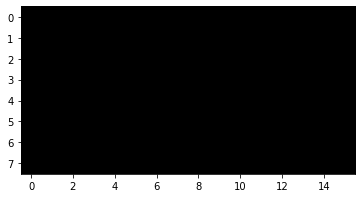

[]
(3, 7)


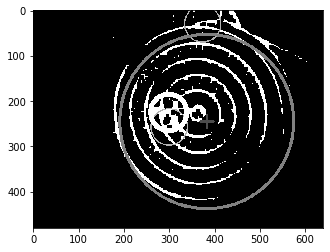

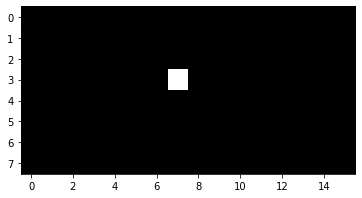

[(3, 7)]


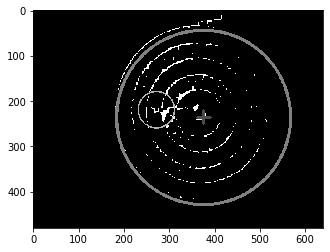

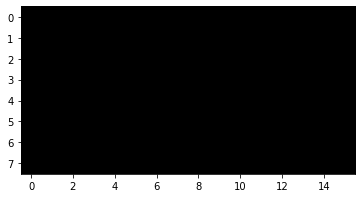

[(3, 7)]


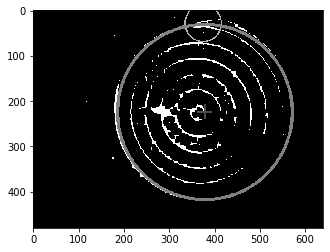

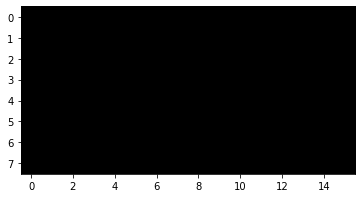

[(3, 7)]
(3, 7)


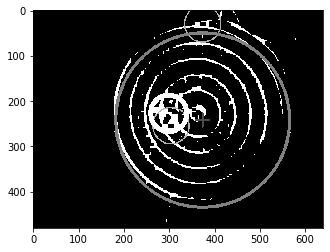

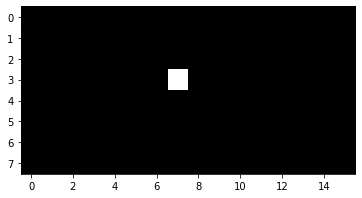

[(3, 7)]
(3, 7)


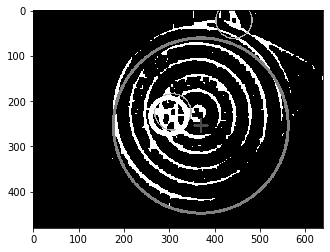

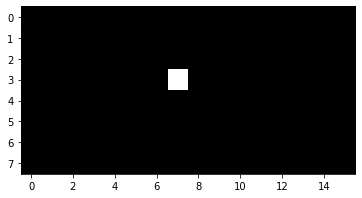

[(3, 7)]
(3, 7)


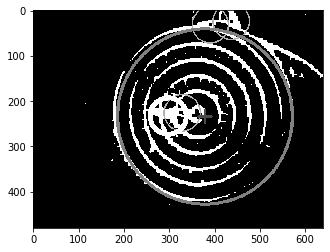

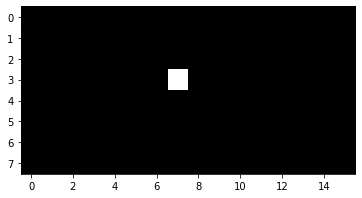

[(3, 7)]


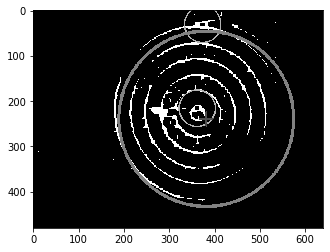

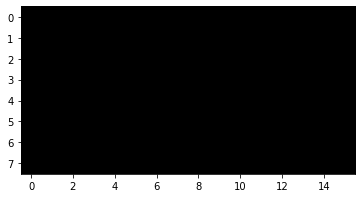

[(3, 7)]
(3, 7)


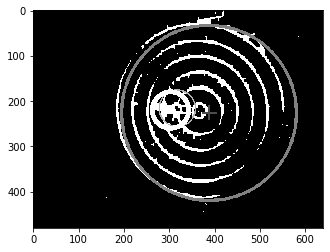

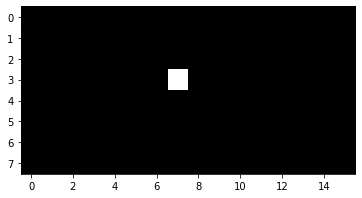

[(3, 7)]


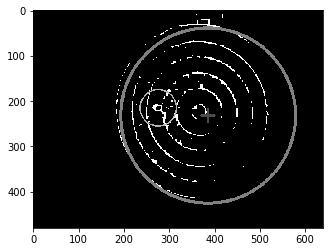

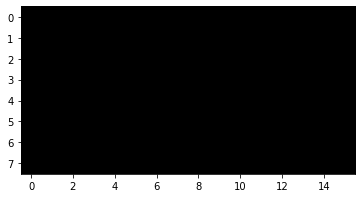

[(3, 7)]


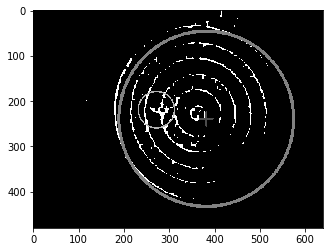

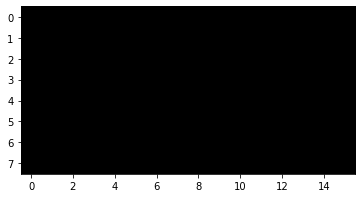

[(3, 7)]


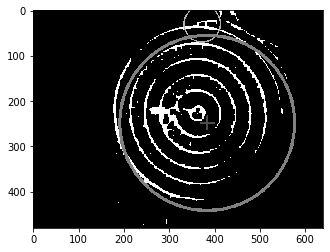

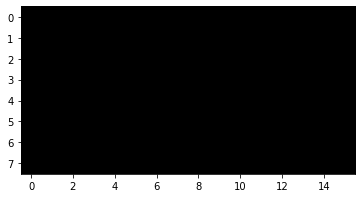

[]
(3, 7)


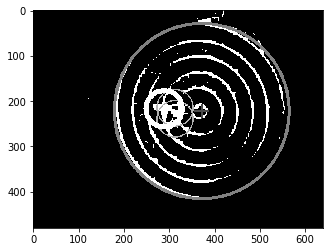

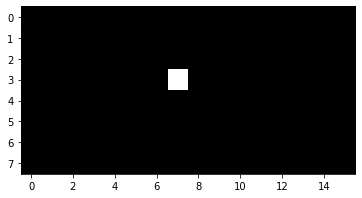

[(3, 7)]


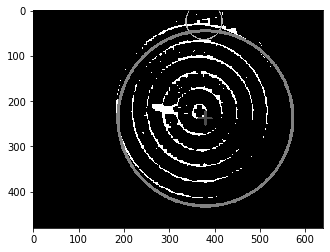

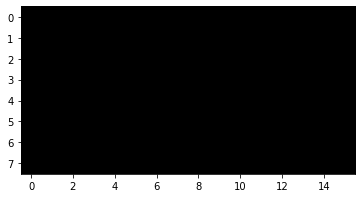

[]
(3, 7)


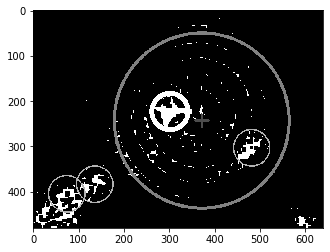

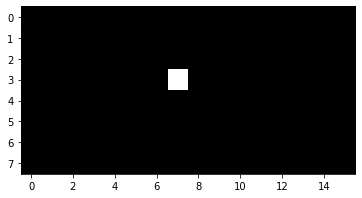

[(3, 7)]


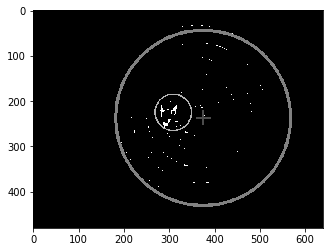

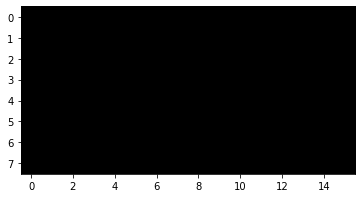

[(3, 7)]


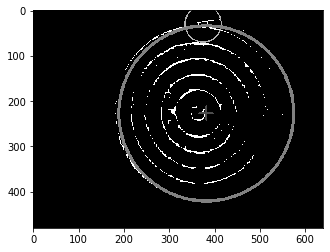

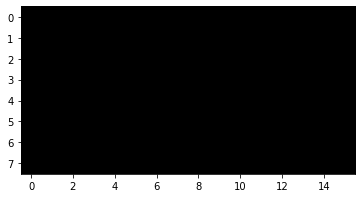

[(3, 7)]


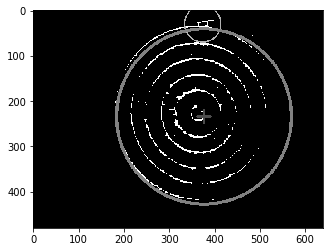

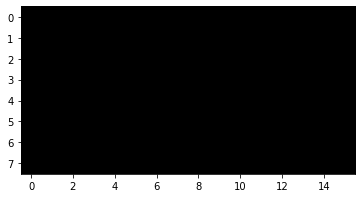

[]
(7, 4)
(5, 0)
(4, 7)


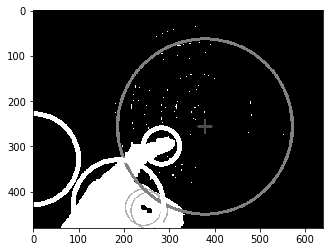

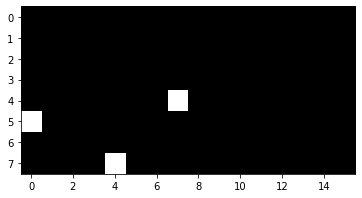

[]
(7, 8)


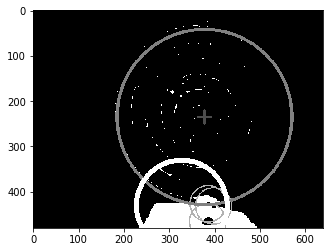

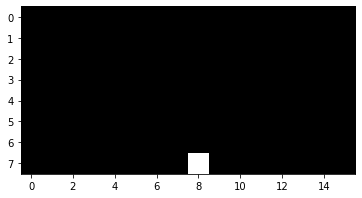

[]


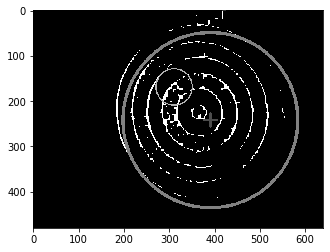

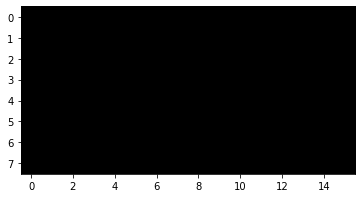

[]


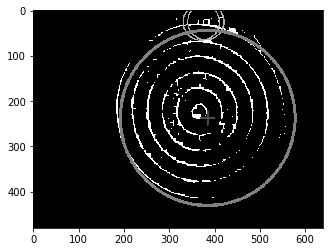

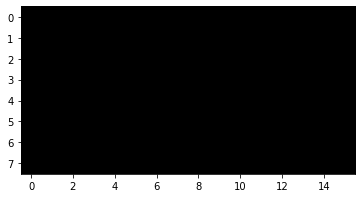

[]


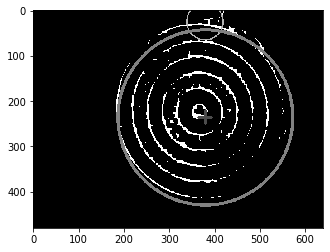

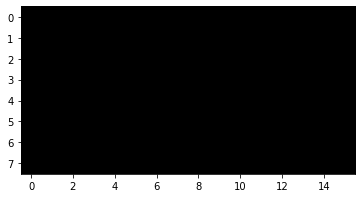

[]


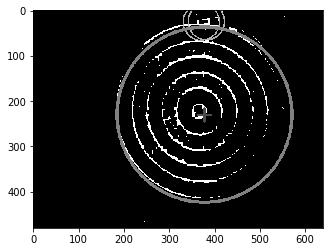

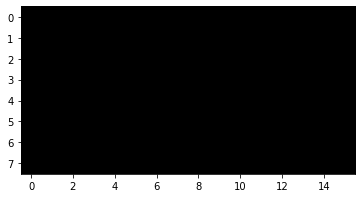

[]


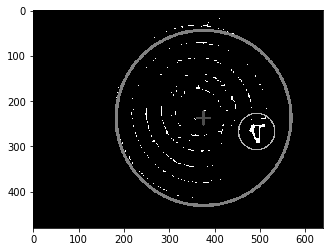

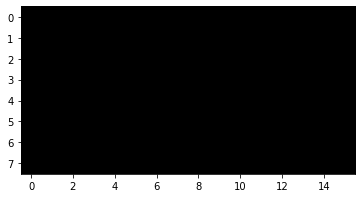

[]


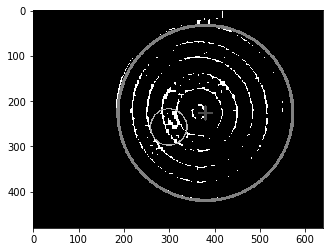

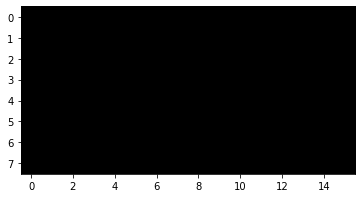

[]
(3, 10)


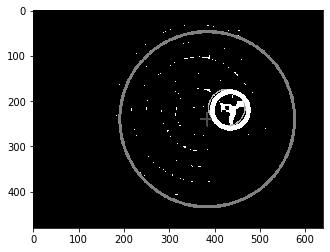

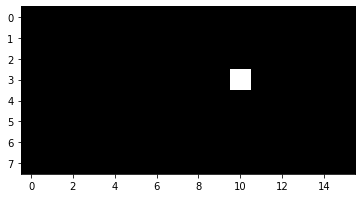

[]
(3, 10)


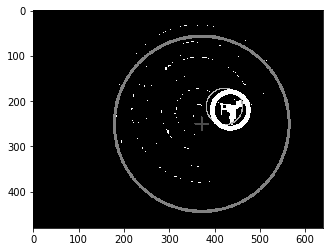

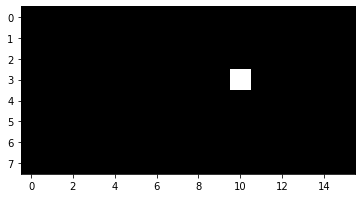

[(3, 10)]


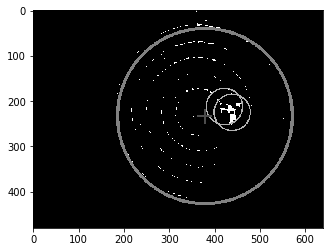

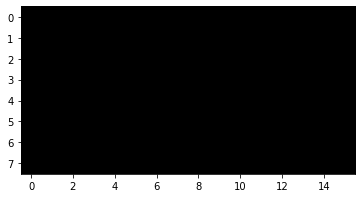

[(3, 10)]


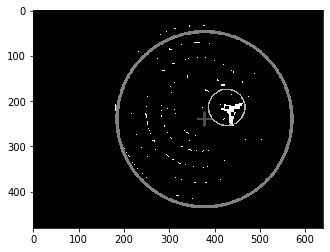

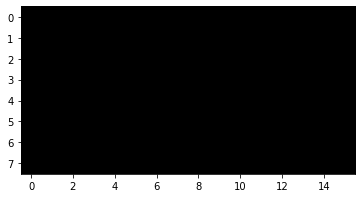

[(3, 10)]


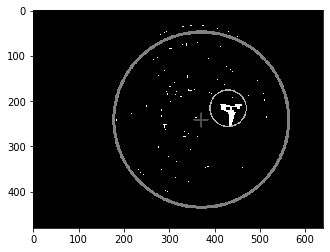

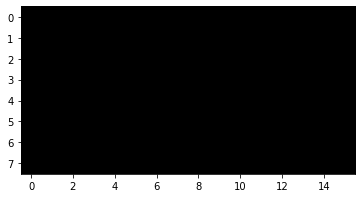

[(3, 10)]


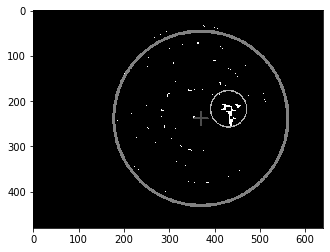

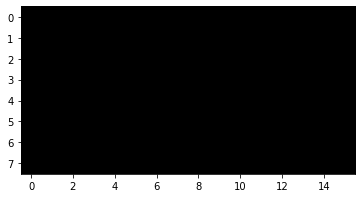

[]


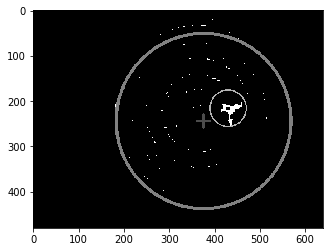

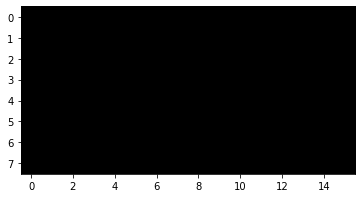

[]


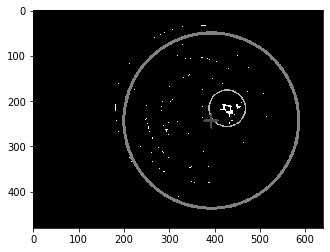

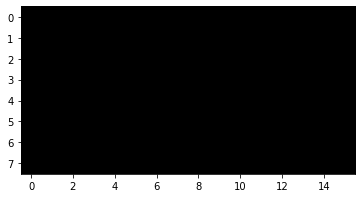

[]


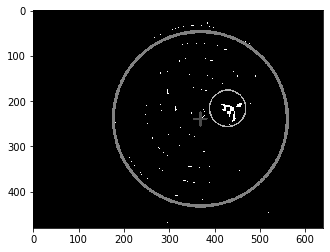

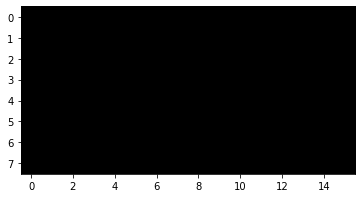

[]


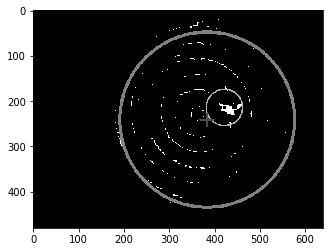

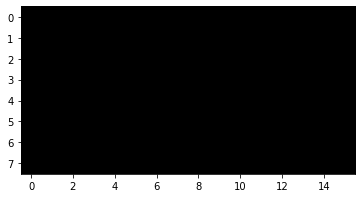

[]
(7, 0)
(6, 2)
(3, 0)


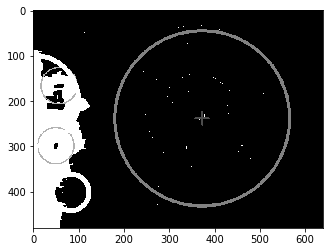

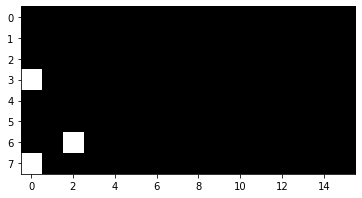

[]
(2, 0)


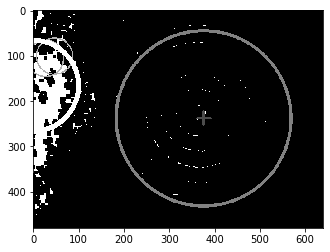

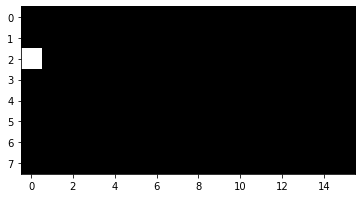

[]


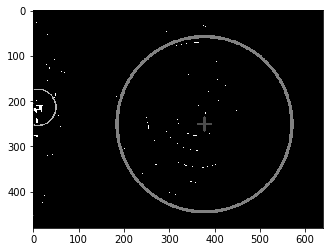

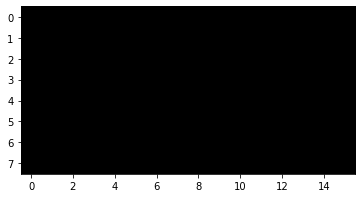

[]


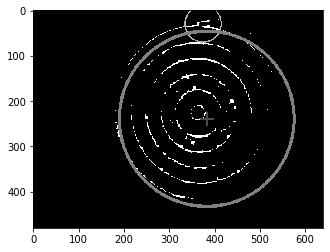

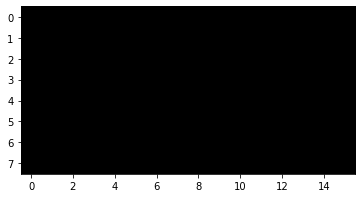

[]


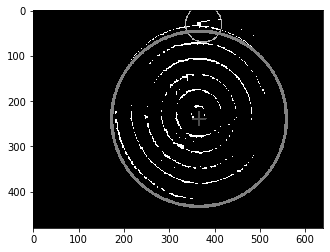

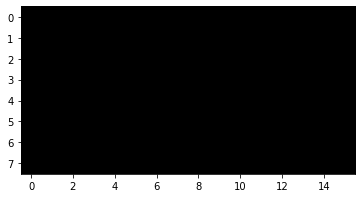

[]


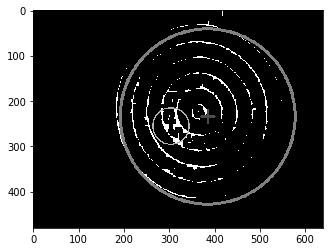

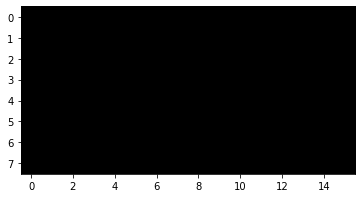

[]


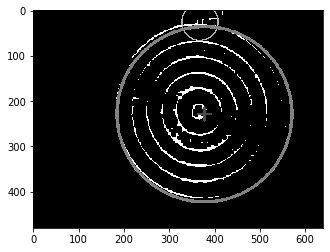

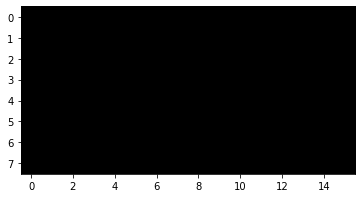

[]
(3, 6)


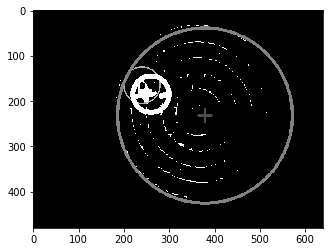

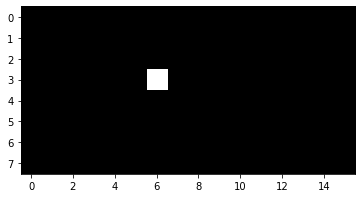

[]


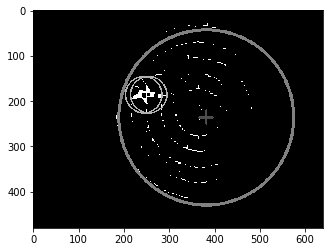

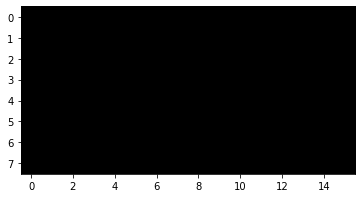

[]
(5, 0)


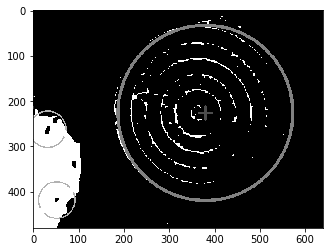

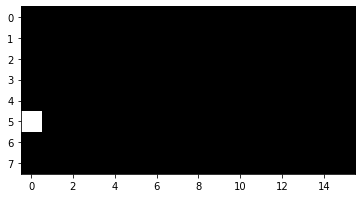

[]
(5, 0)


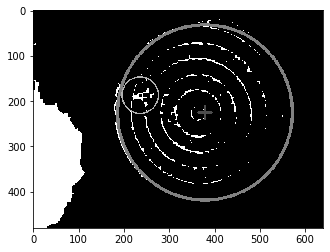

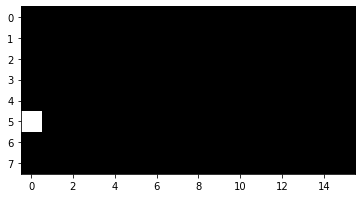

[(5, 0)]


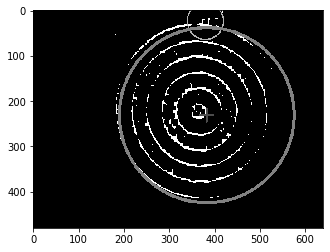

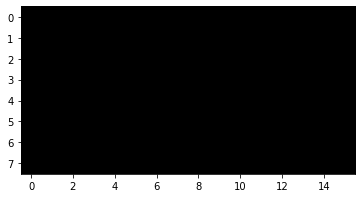

[(5, 0)]


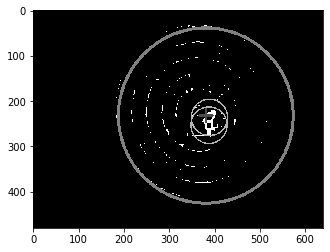

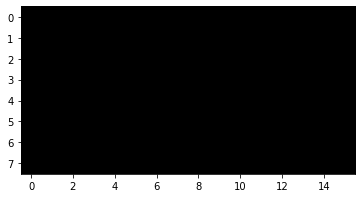

[(5, 0)]


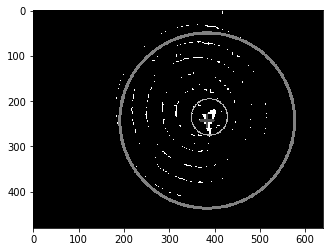

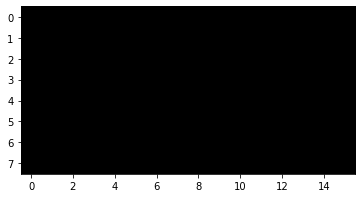

[(5, 0)]


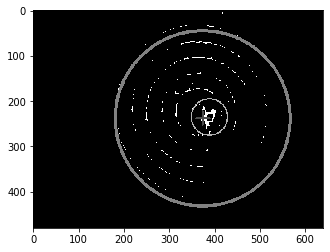

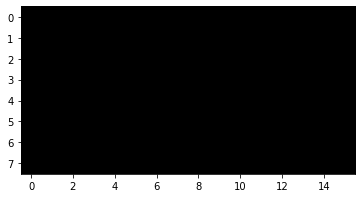

[]


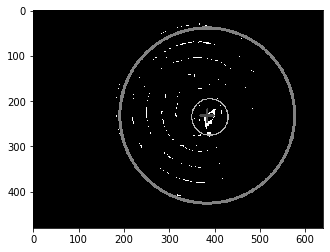

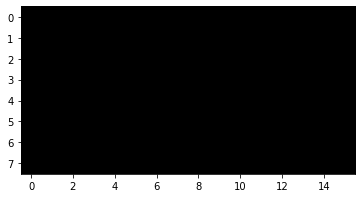

[]


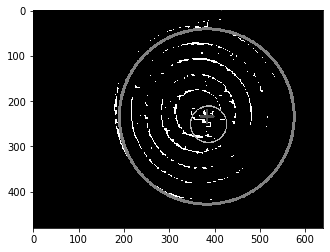

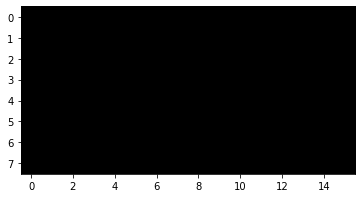

[]


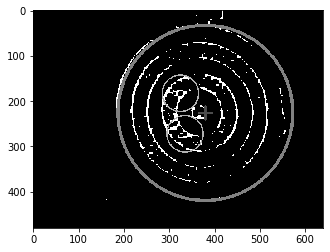

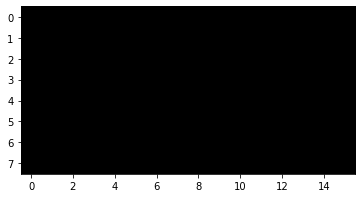

[]


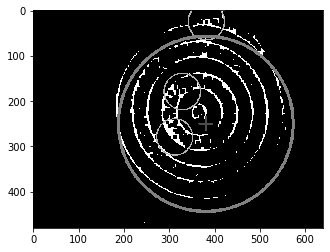

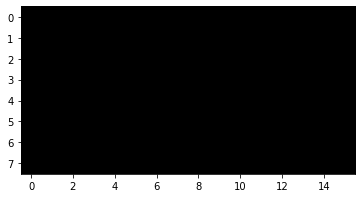

[]


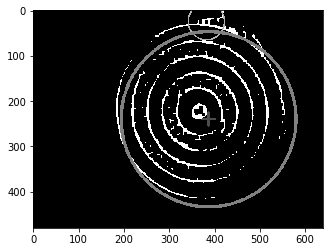

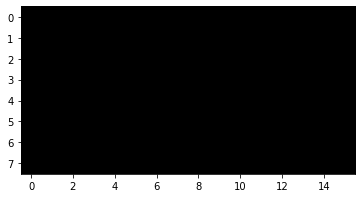

[]


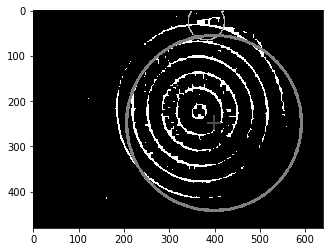

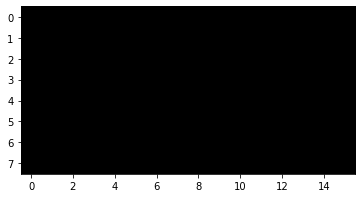

[]


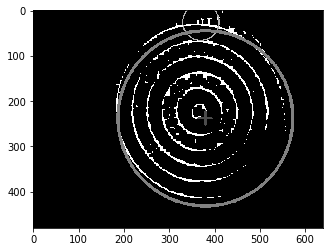

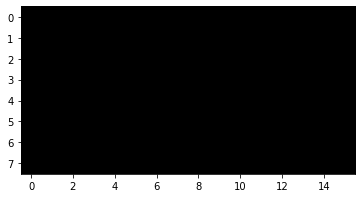

[]


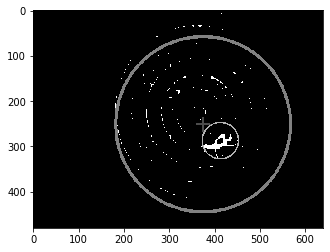

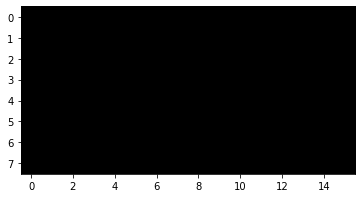

[]


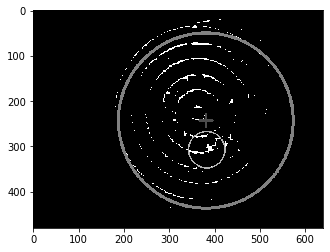

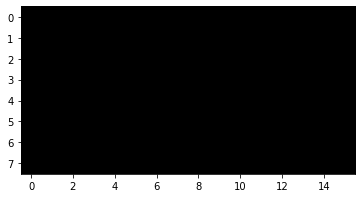

[]


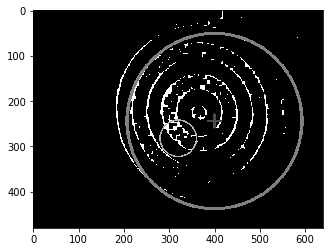

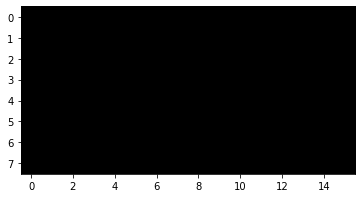

[]


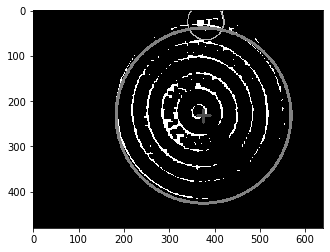

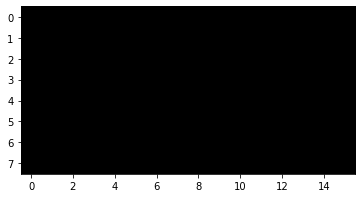

[]


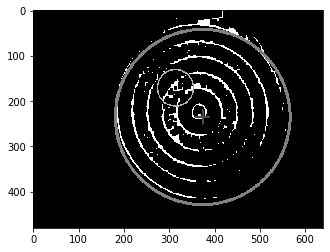

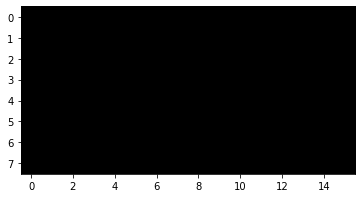

[]


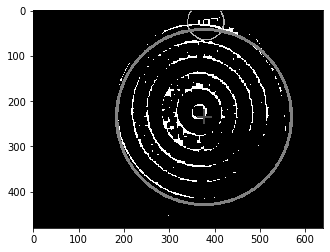

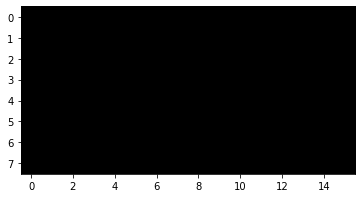

[]


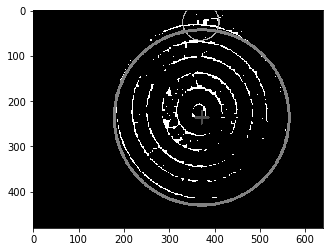

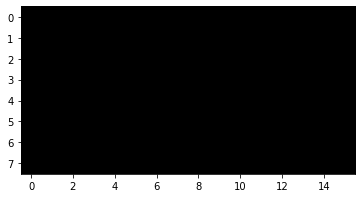

[]


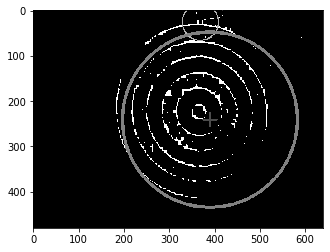

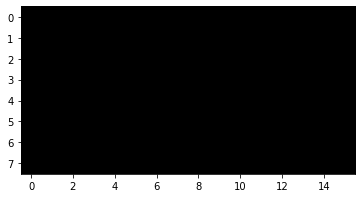

[]
(2, 5)


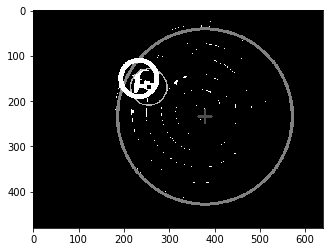

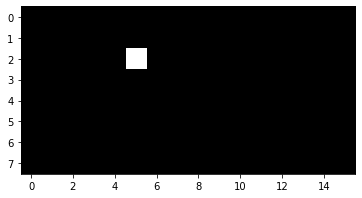

[]


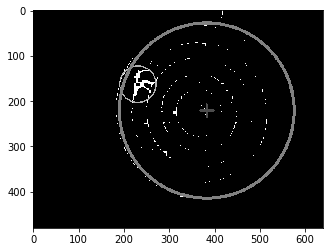

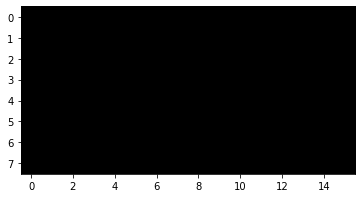

[]


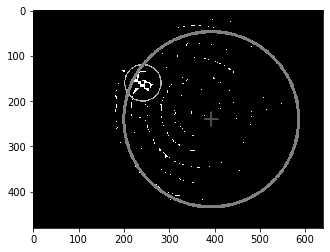

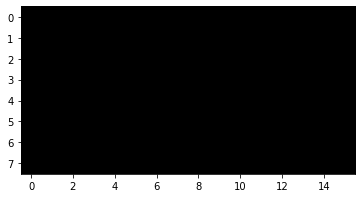

[]


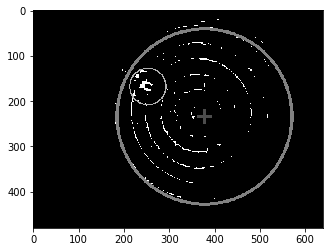

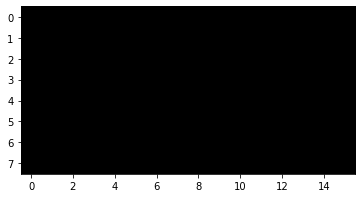

[]
(7, 1)
(6, 2)
(4, 3)


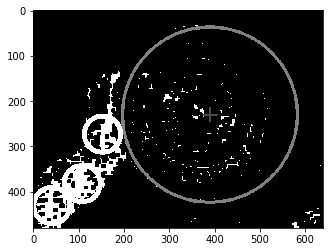

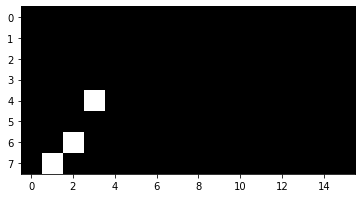

[]


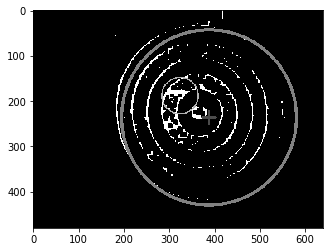

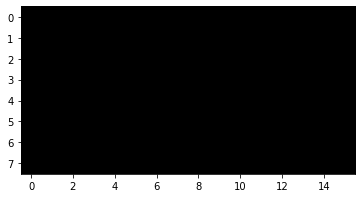

[]


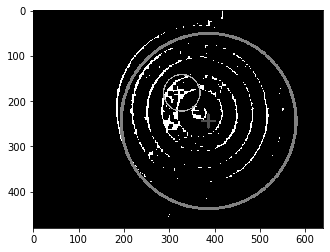

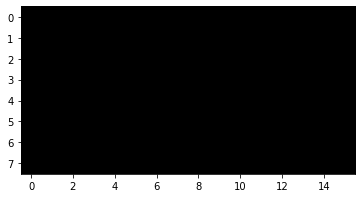

[]


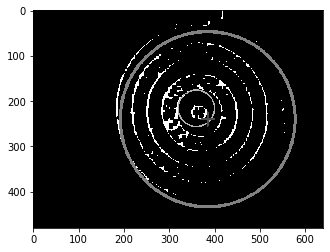

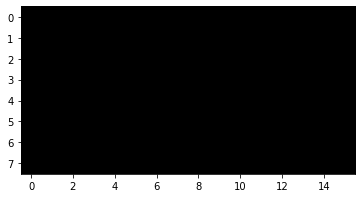

[]


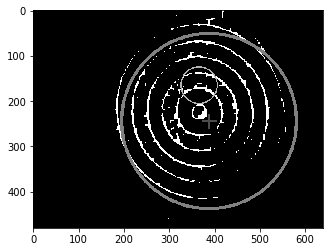

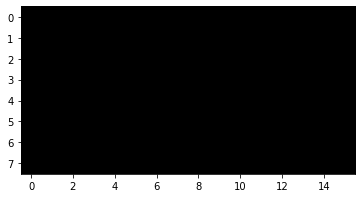

[]


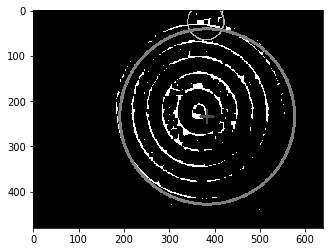

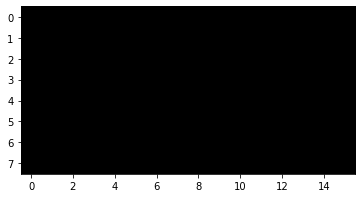

[]


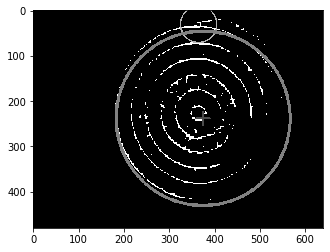

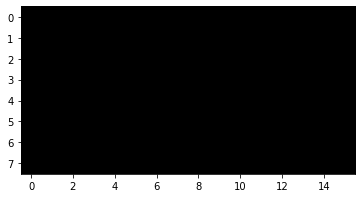

[]


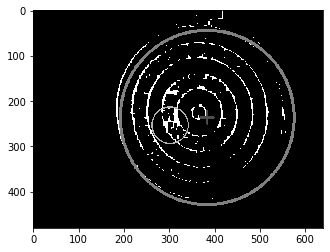

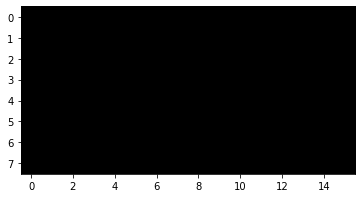

[]
(1, 7)


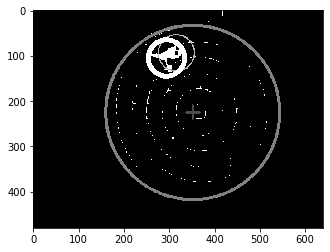

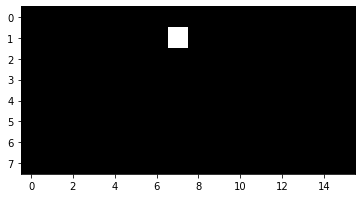

[]
(1, 7)


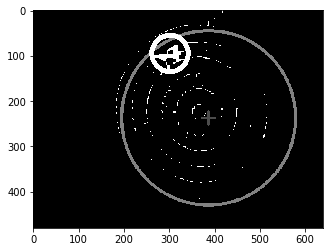

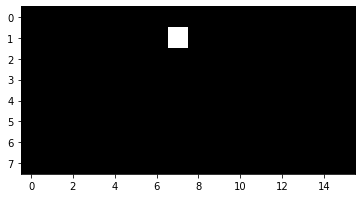

[(1, 7)]


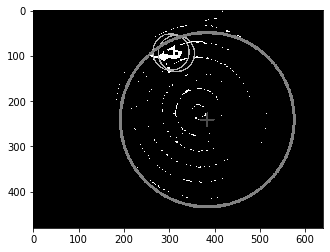

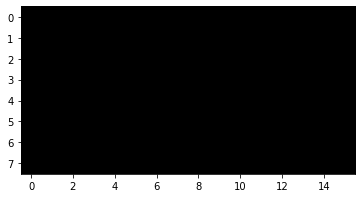

[(1, 7)]


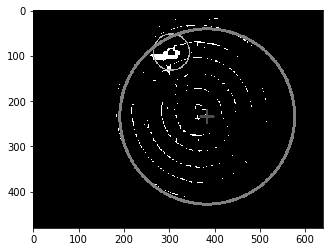

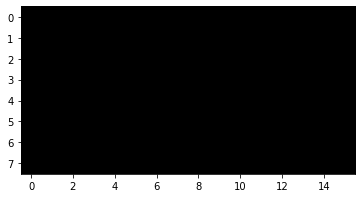

[(1, 7)]
(1, 7)


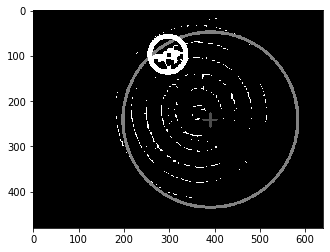

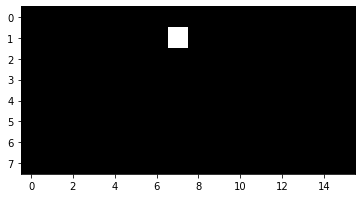

[(1, 7)]
(1, 7)


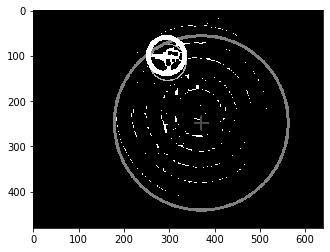

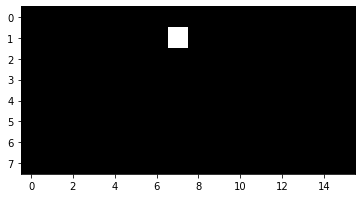

[(1, 7)]
(1, 7)


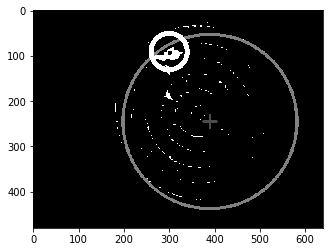

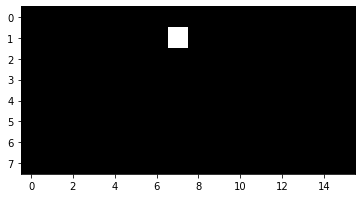

[(1, 7)]
(1, 7)


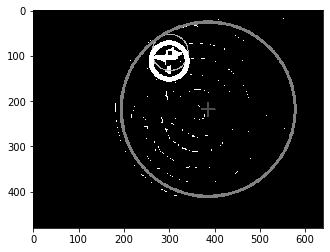

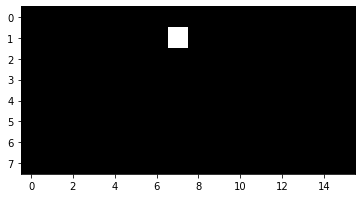

[(1, 7)]
(1, 7)


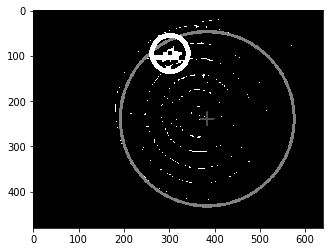

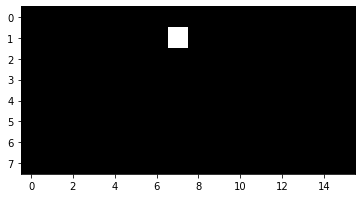

[(1, 7)]
(1, 7)


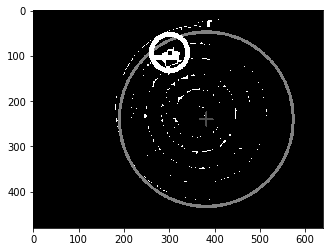

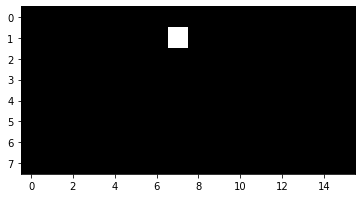

[(1, 7)]


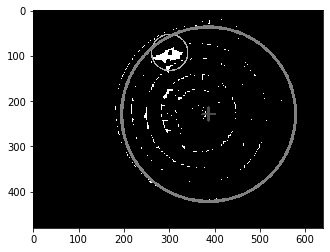

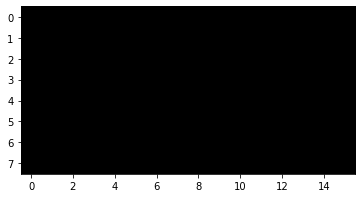

[(1, 7)]
(5, 2)
(1, 4)


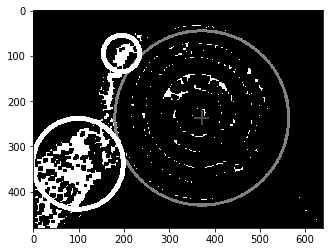

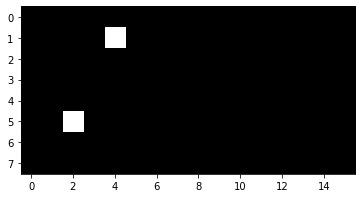

[(1, 7)]


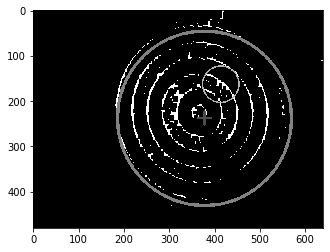

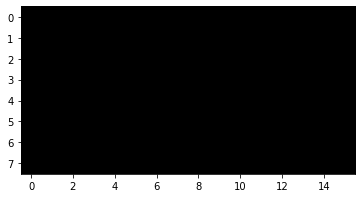

[(1, 7)]
(3, 8)


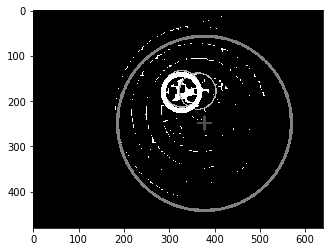

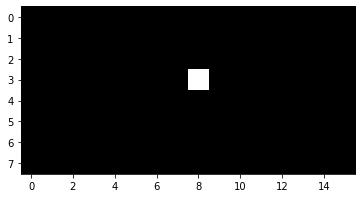

[]
(2, 8)


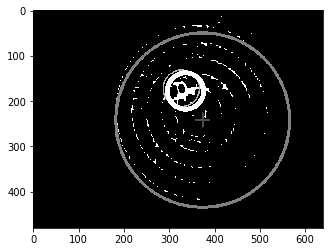

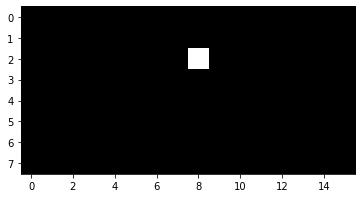

[]
(2, 8)


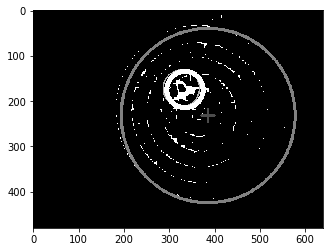

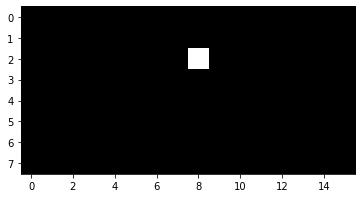

[(2, 8)]


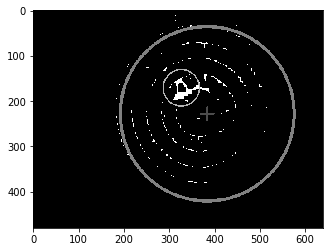

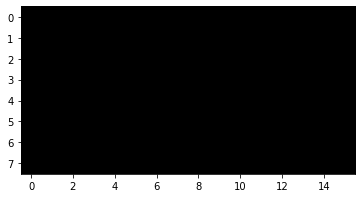

[(2, 8)]


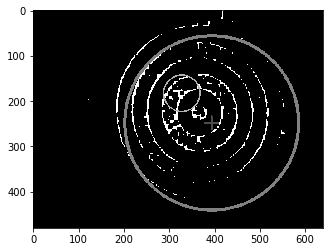

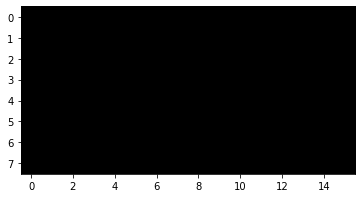

[(2, 8)]


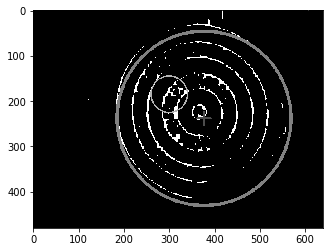

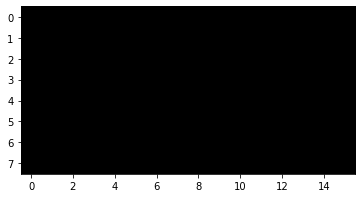

[(2, 8)]


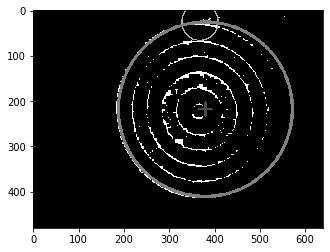

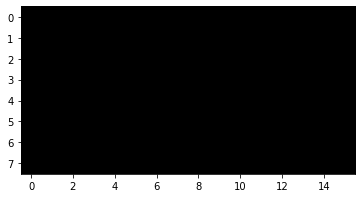

[]


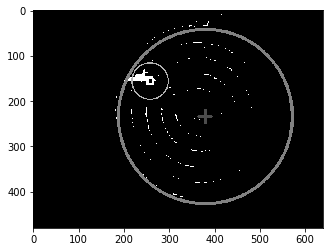

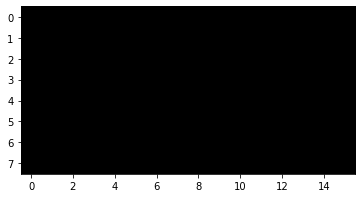

[]


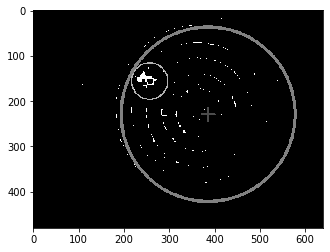

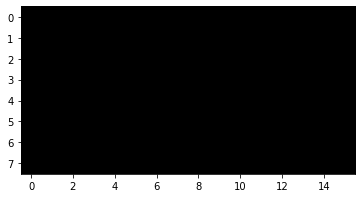

[]


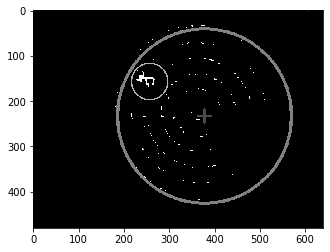

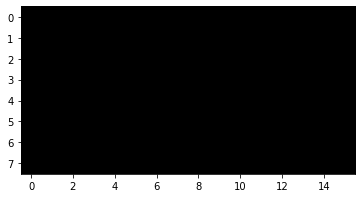

[]


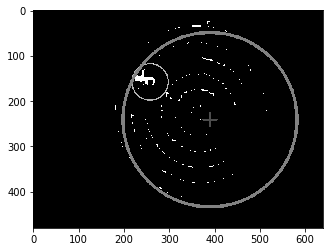

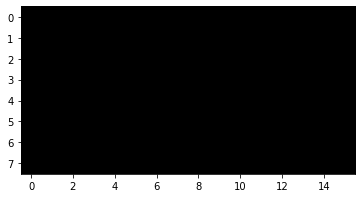

[]


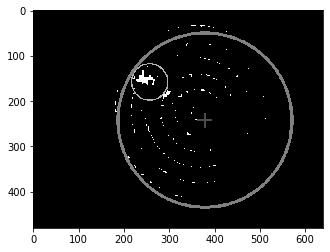

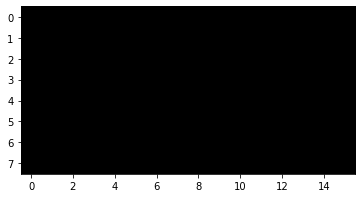

[]


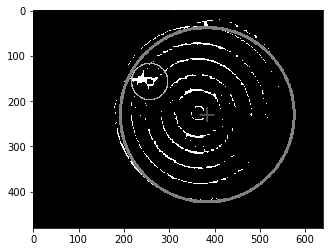

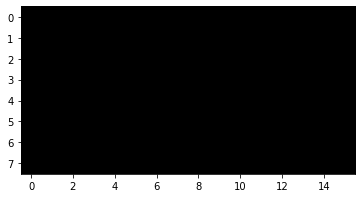

[]


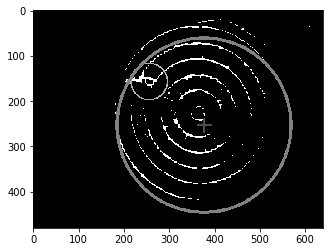

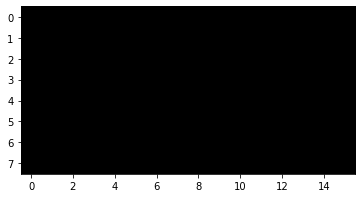

[]


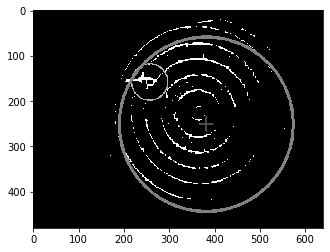

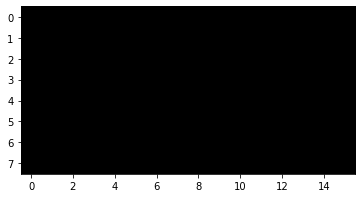

[]


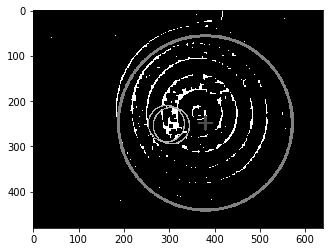

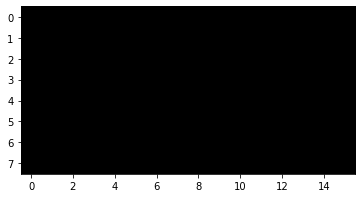

[]


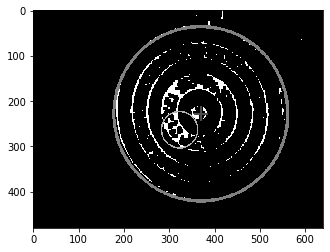

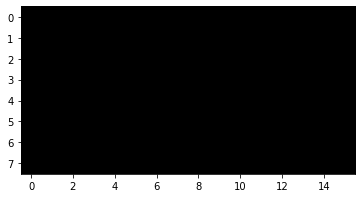

[]


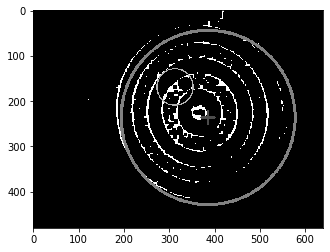

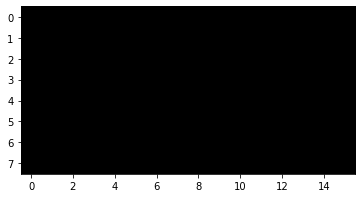

[]


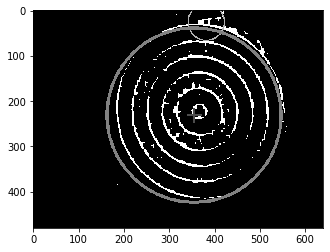

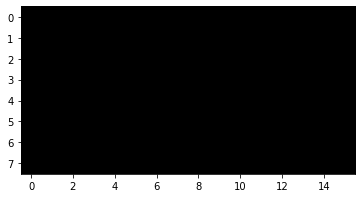

[]


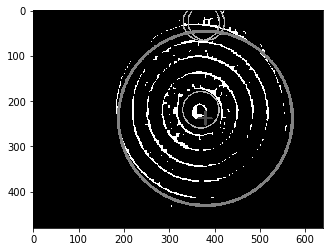

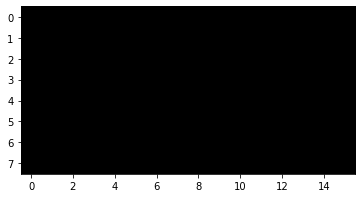

[]


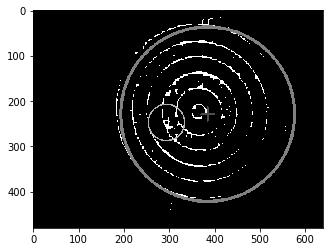

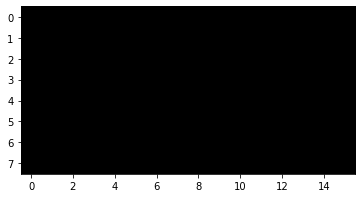

[]
(7, 12)


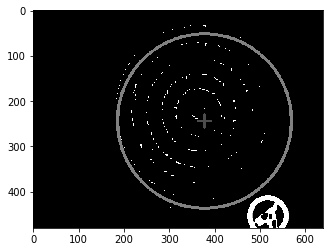

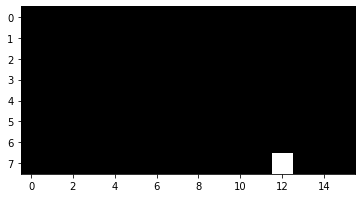

[]


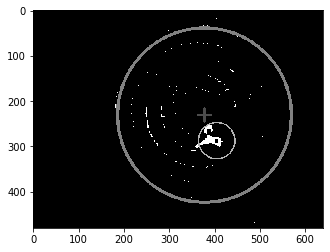

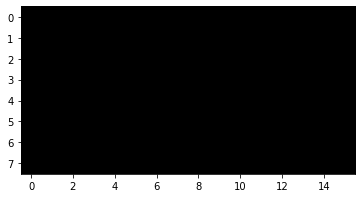

[]


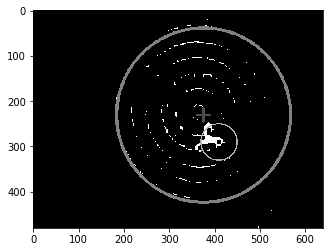

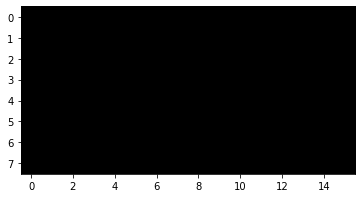

[]


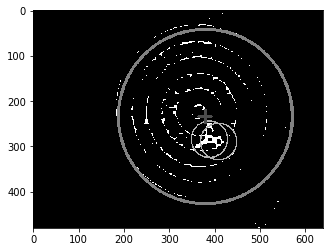

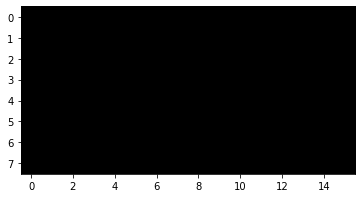

[]


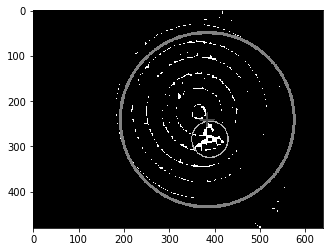

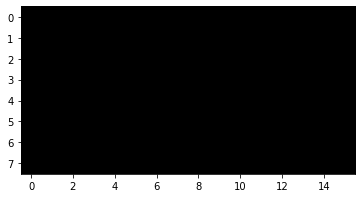

[]


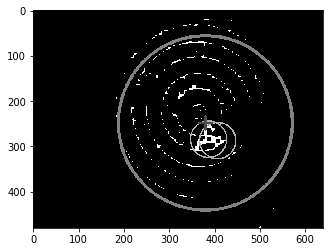

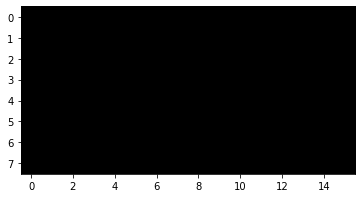

[]


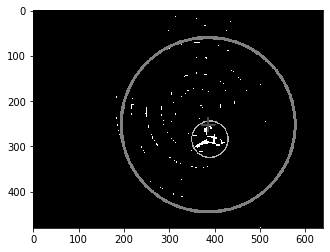

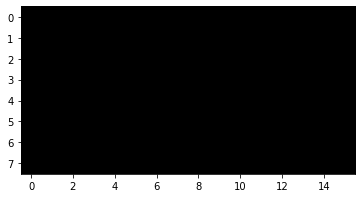

[]


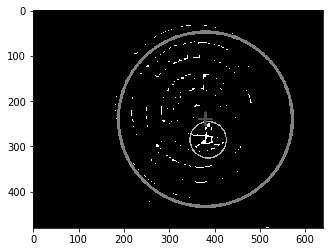

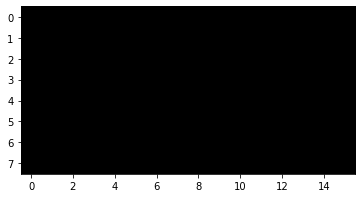

[]


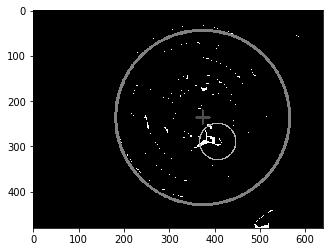

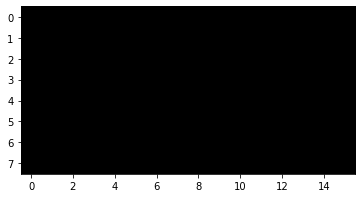

[]


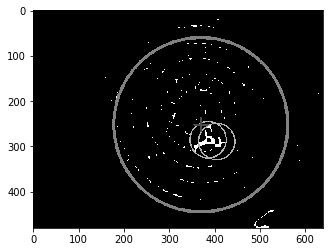

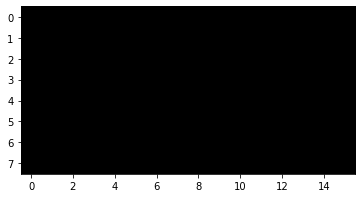

[]


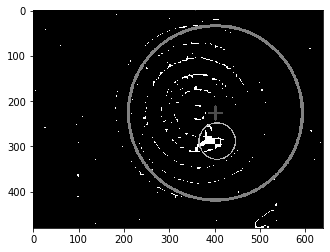

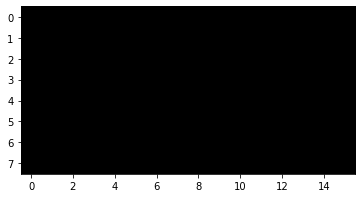

[]


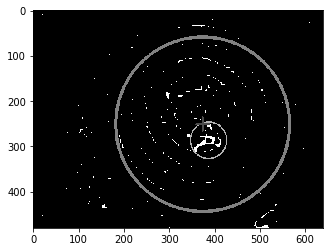

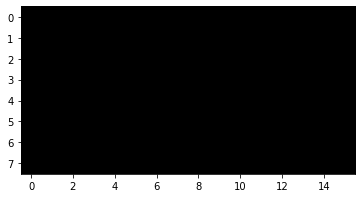

[]
(5, 0)
(1, 2)
(1, 0)
(0, 2)


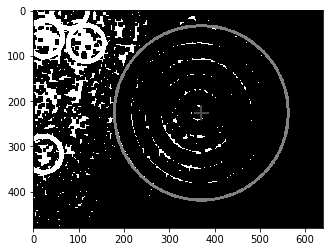

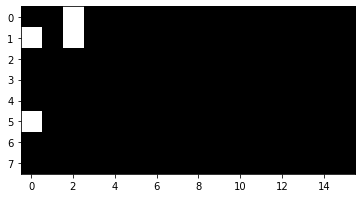

[]


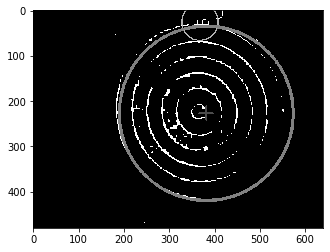

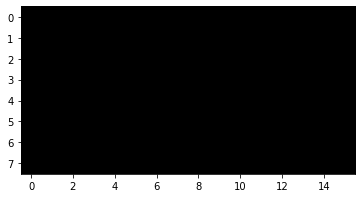

[]


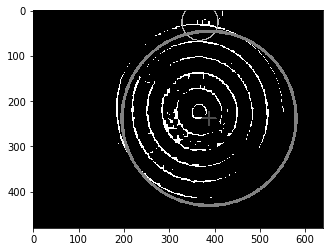

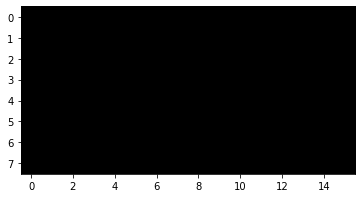

[]


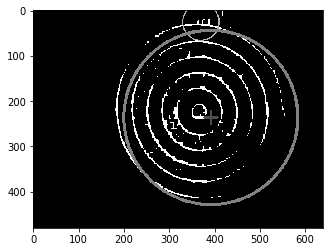

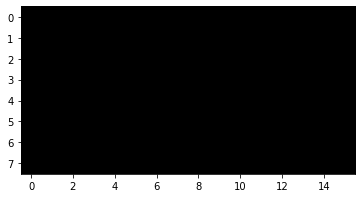

[]


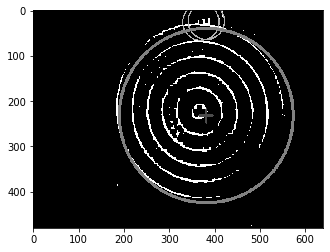

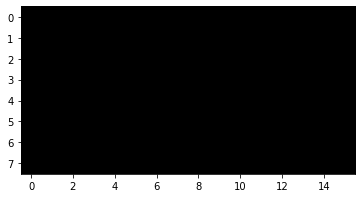

[]
(1, 5)


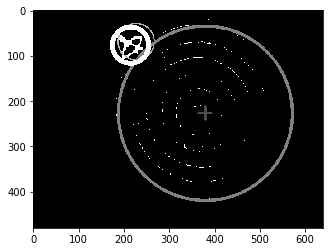

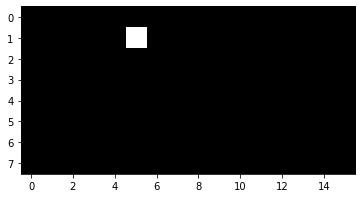

[]
(4, 0)
(3, 0)
(2, 3)


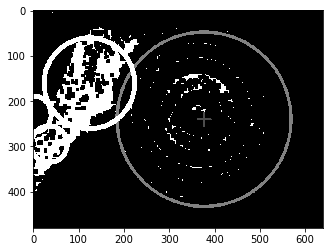

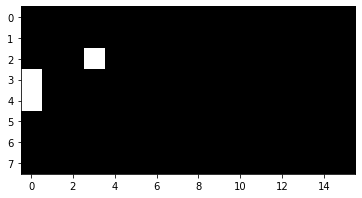

[]
(4, 6)


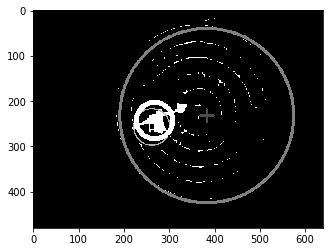

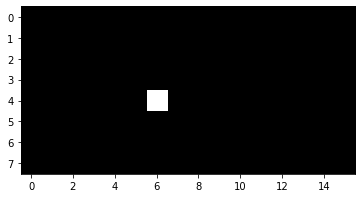

[]


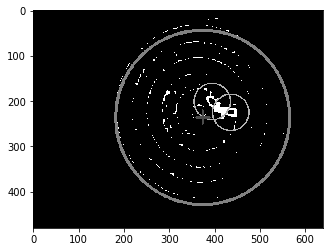

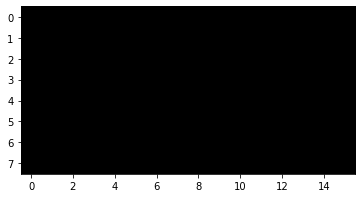

[]


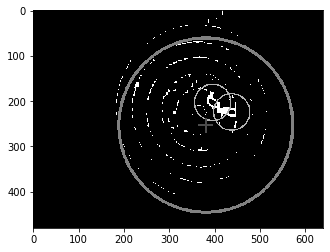

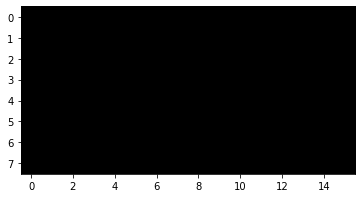

[]


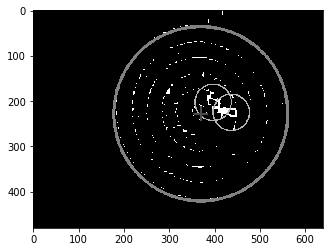

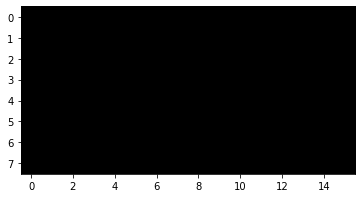

[]


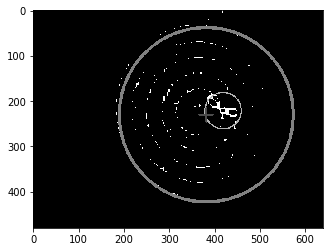

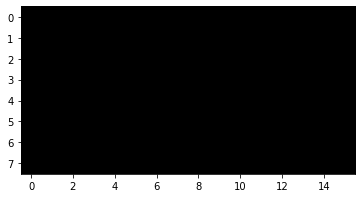

[]


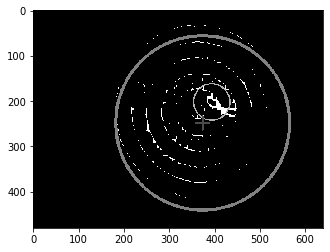

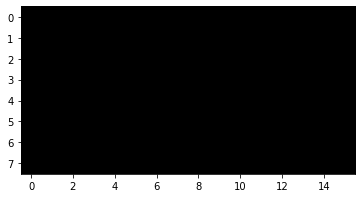

[]


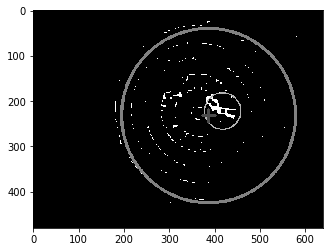

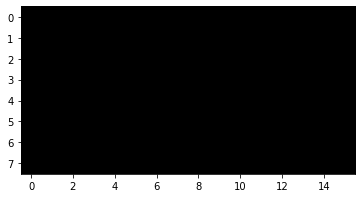

[]


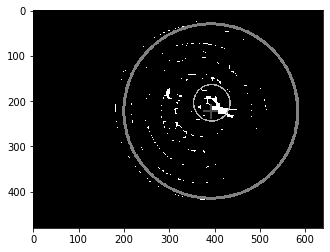

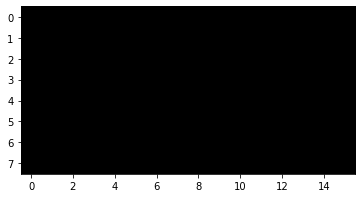

[]


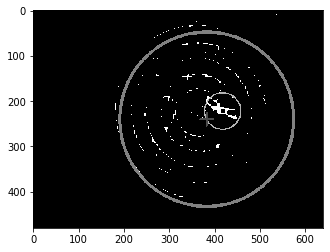

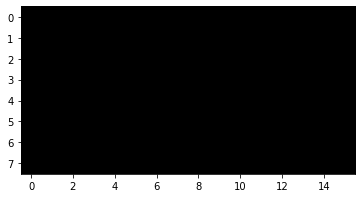

[]


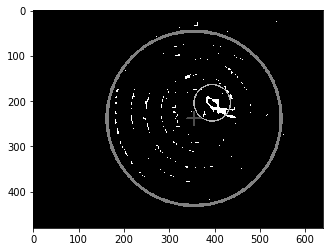

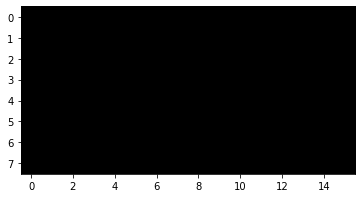

[]


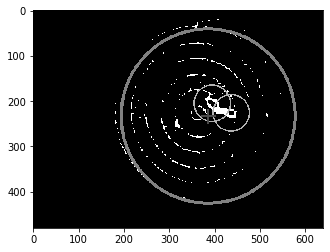

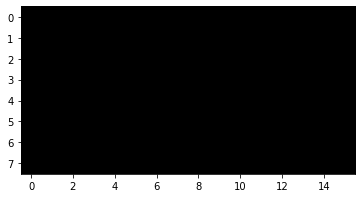

[]


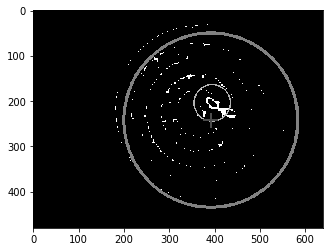

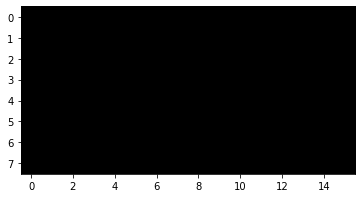

[]


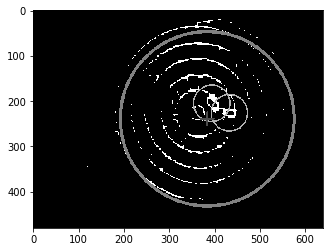

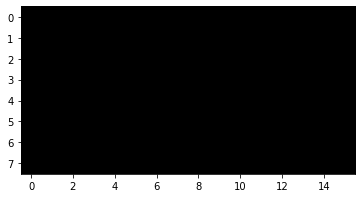

[]


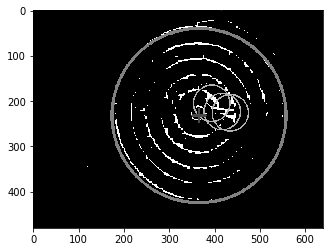

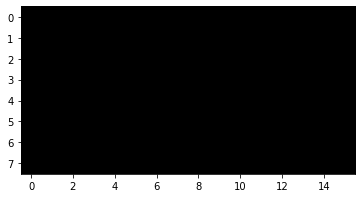

[]
(4, 9)


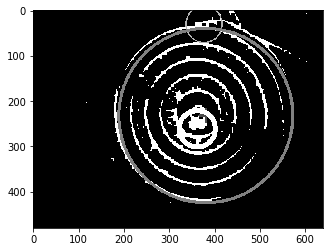

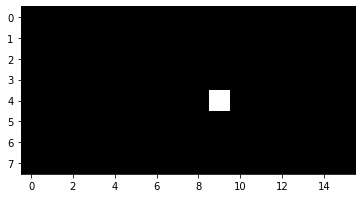

[]


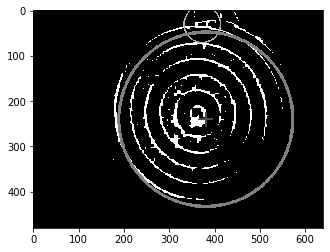

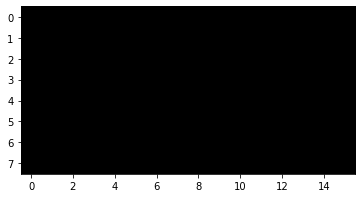

[]


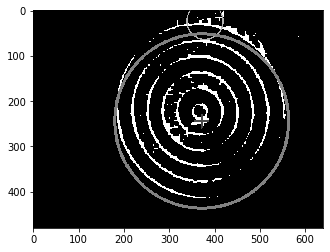

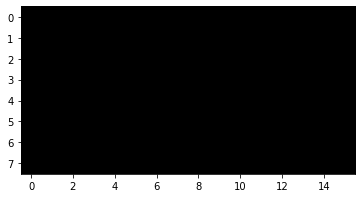

[]


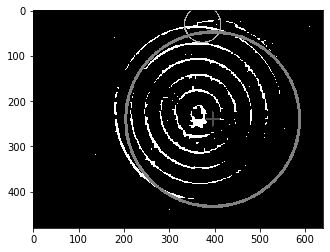

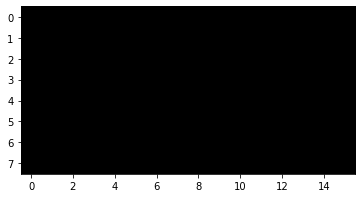

[]


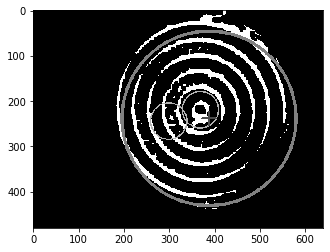

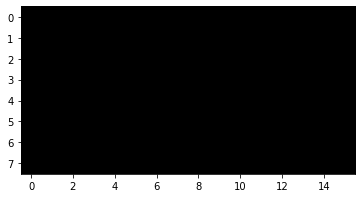

[]


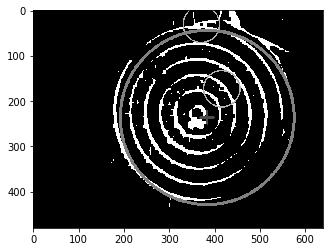

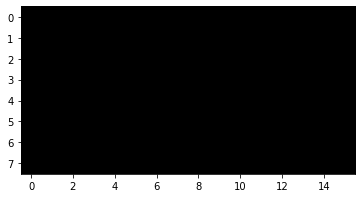

[]


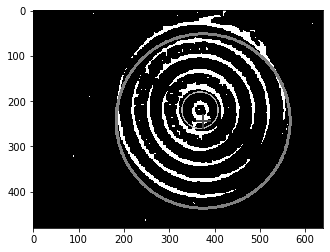

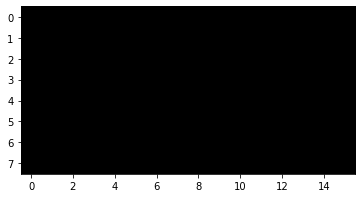

[]


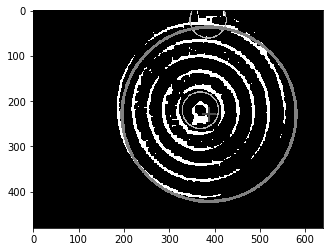

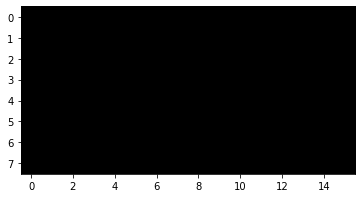

[]


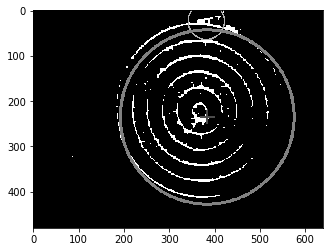

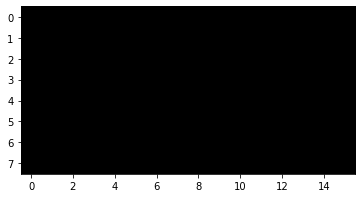

[]


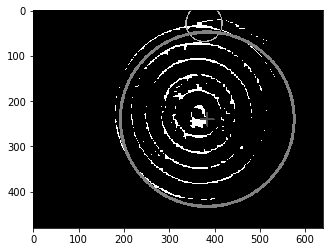

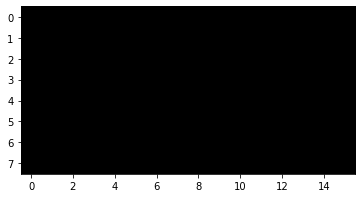

[]


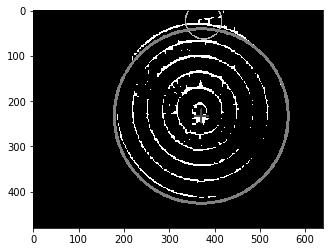

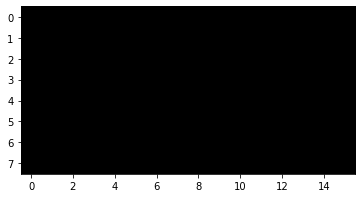

[]
(0, 9)


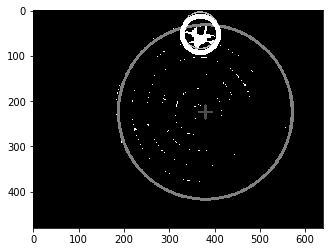

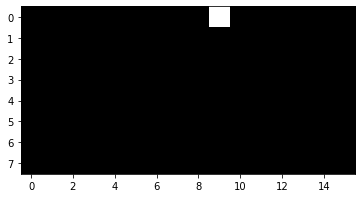

[]
(1, 9)


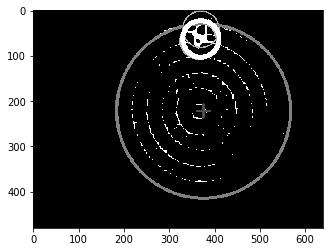

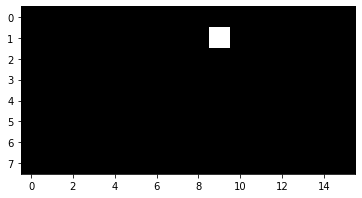

[]


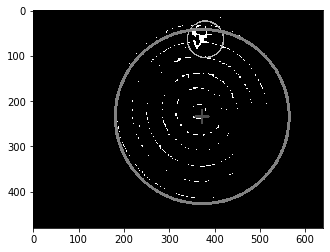

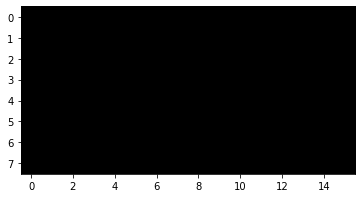

[]
(0, 9)


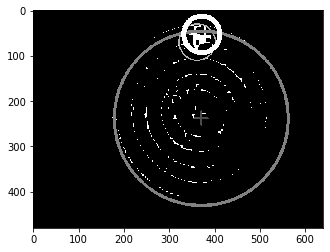

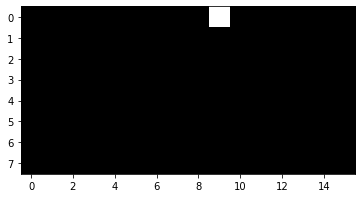

[(0, 9)]


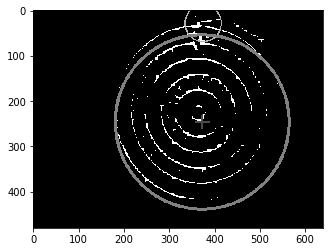

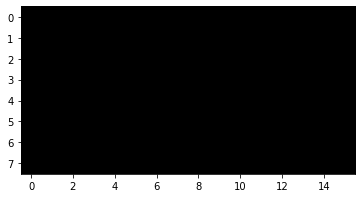

[(0, 9)]


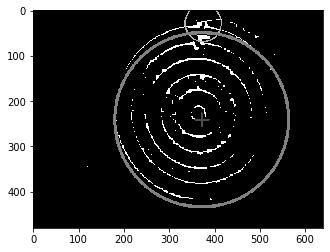

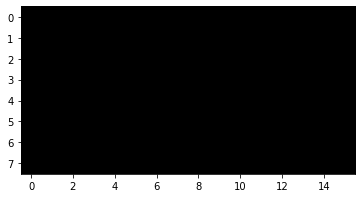

[]


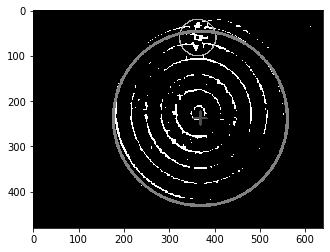

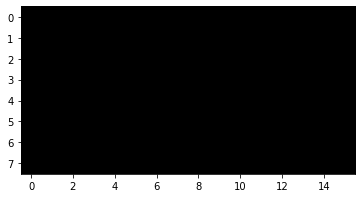

[]
(0, 9)


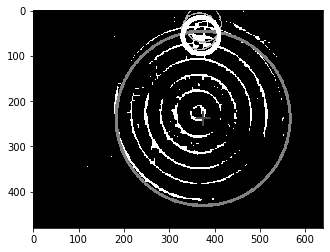

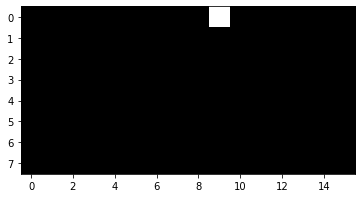

[(0, 9)]
(0, 9)


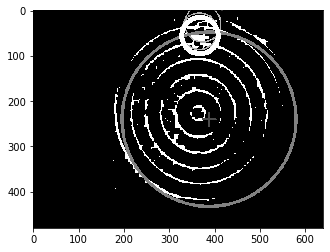

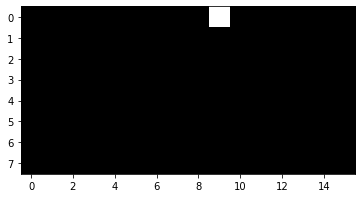

[(0, 9)]


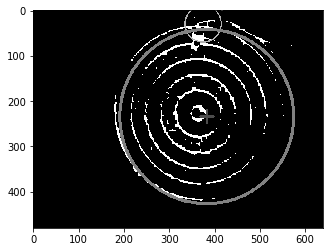

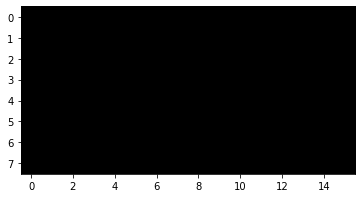

[(0, 9)]


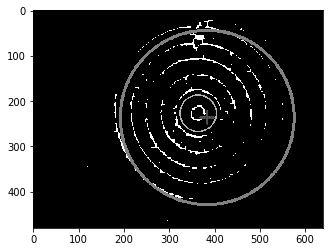

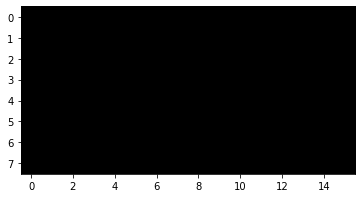

[(0, 9)]


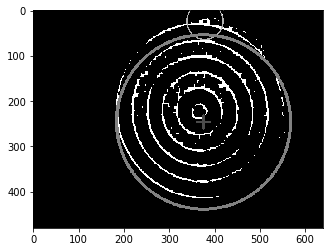

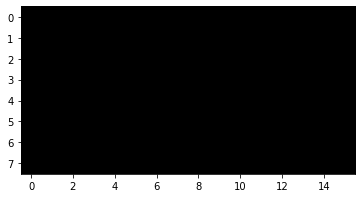

[(0, 9)]
(3, 11)


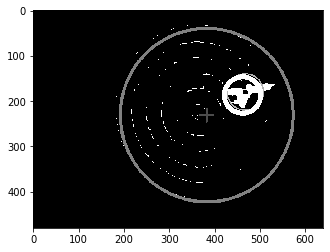

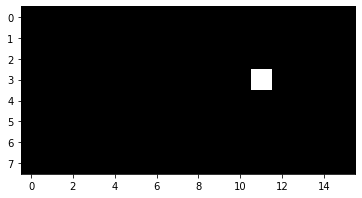

[]
(3, 11)


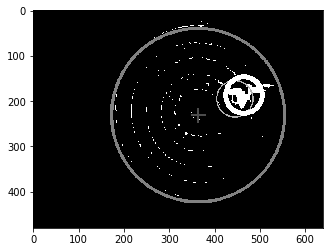

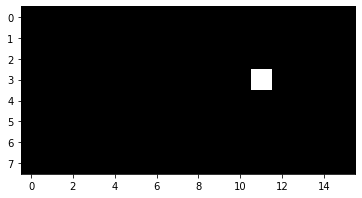

[(3, 11)]


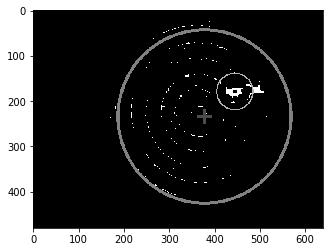

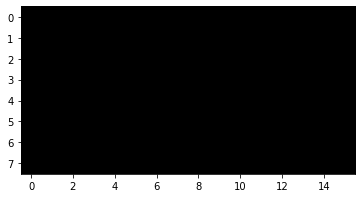

[(3, 11)]


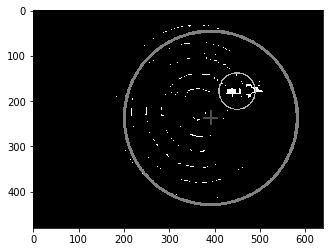

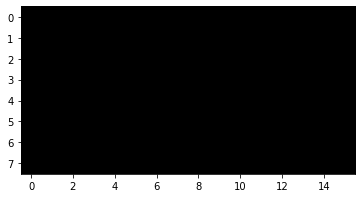

[(3, 11)]


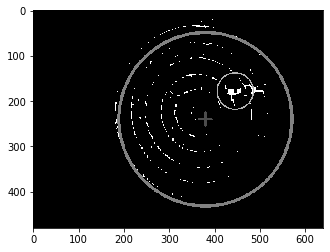

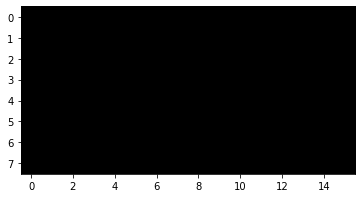

[(3, 11)]


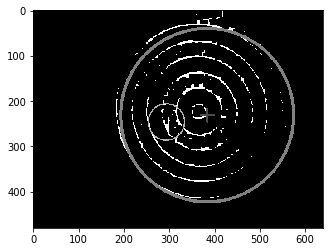

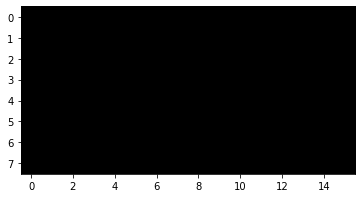

[]


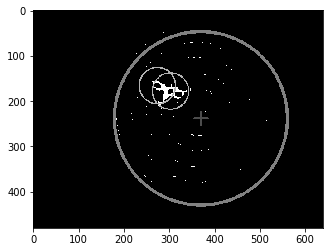

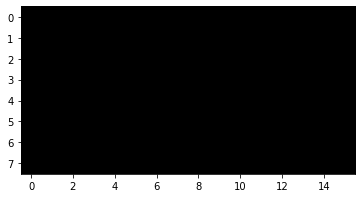

[]
(2, 7)


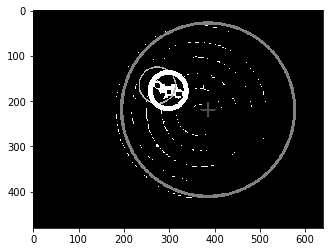

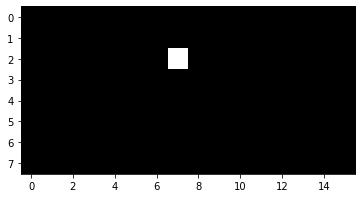

[]


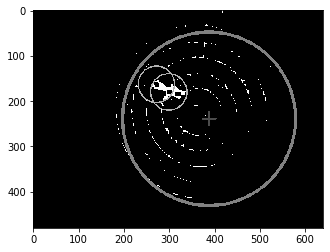

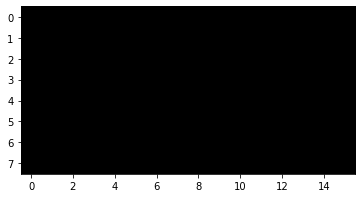

[]


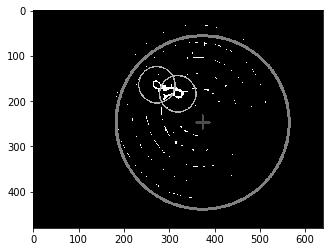

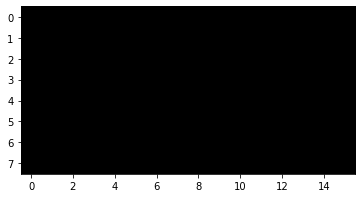

[]


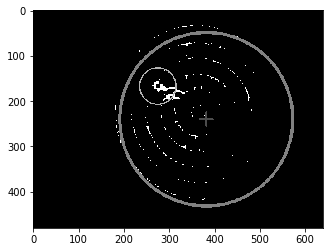

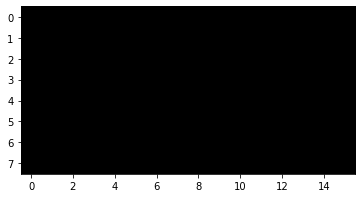

[]


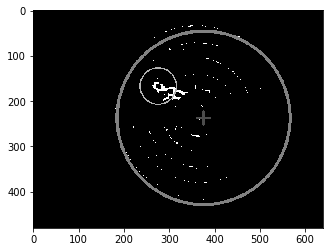

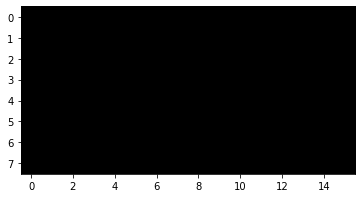

[]


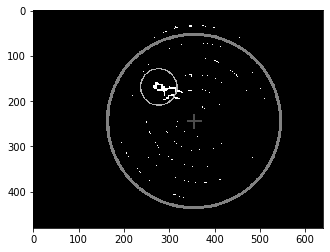

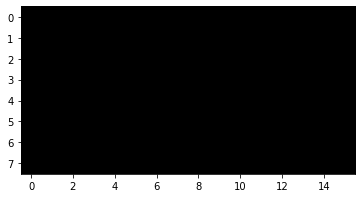

[]
(5, 0)
(4, 3)


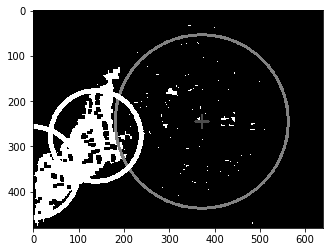

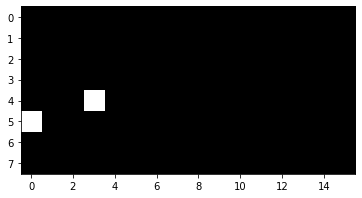

[]
(6, 0)
(5, 3)


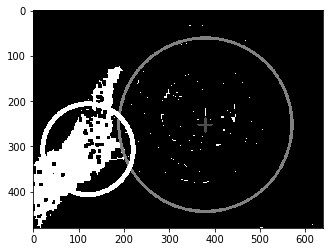

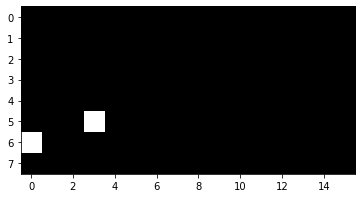

[]


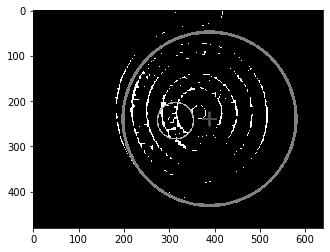

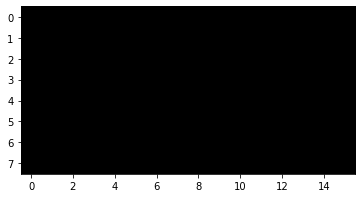

[]


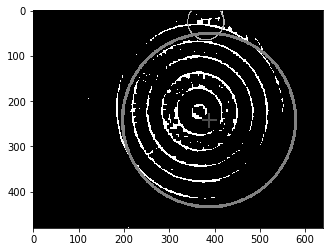

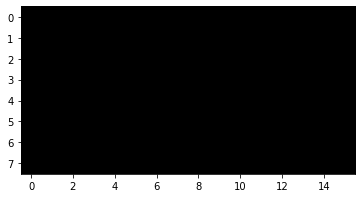

[]


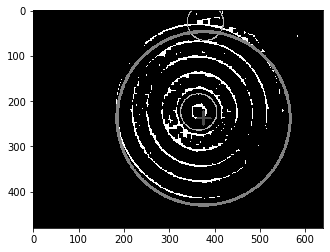

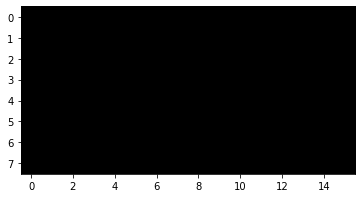

[]


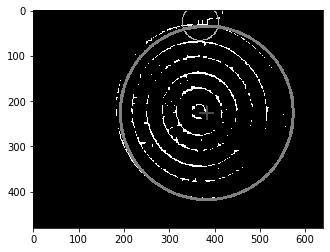

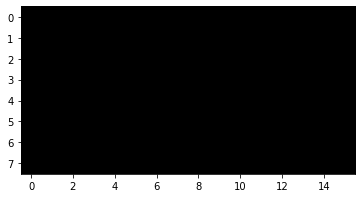

[]


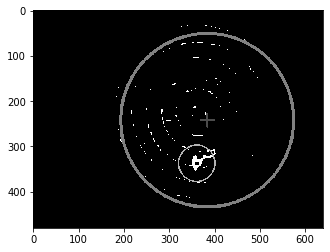

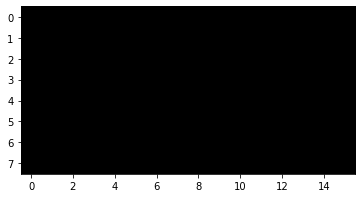

[]


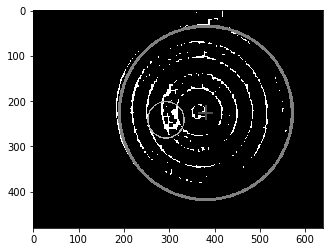

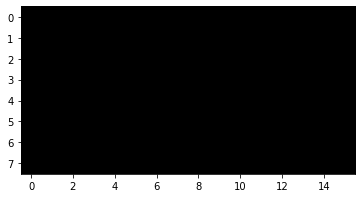

[]


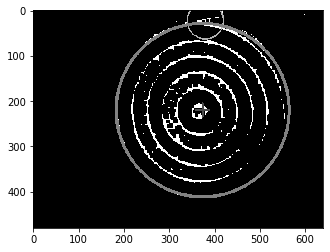

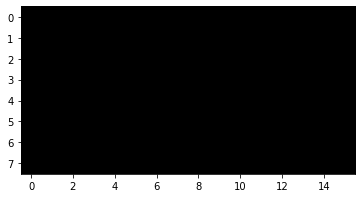

[]


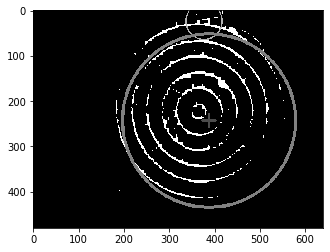

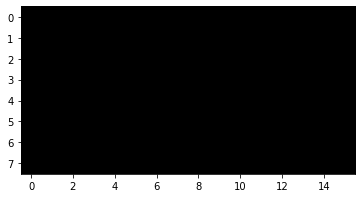

[]
(6, 5)


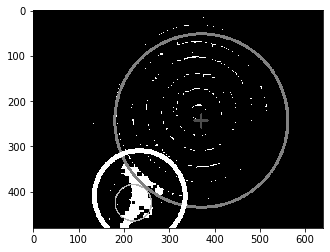

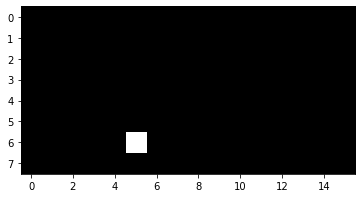

[]
(1, 10)


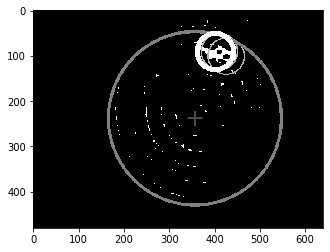

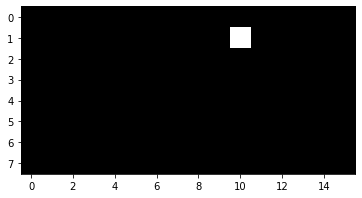

[]
(1, 10)


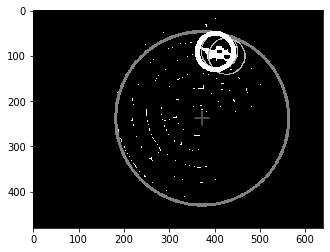

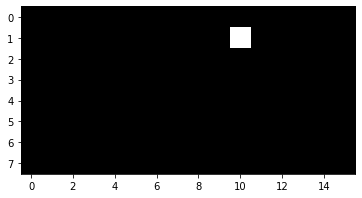

[(1, 10)]
(1, 10)


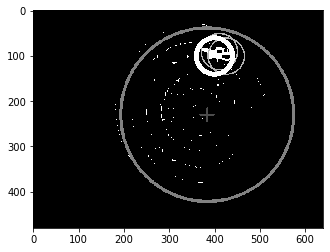

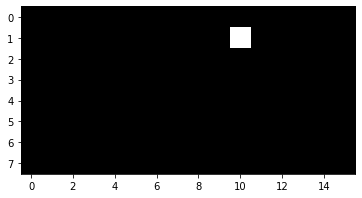

[(1, 10)]


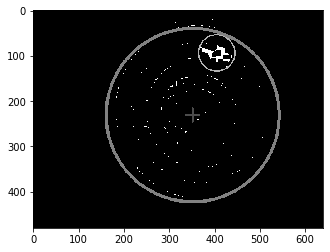

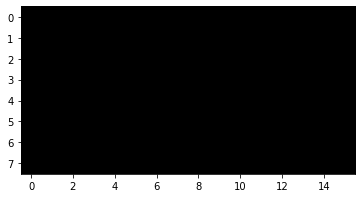

[(1, 10)]


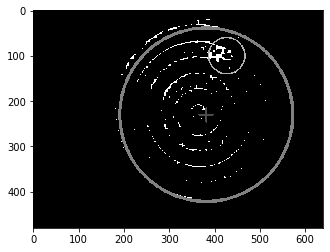

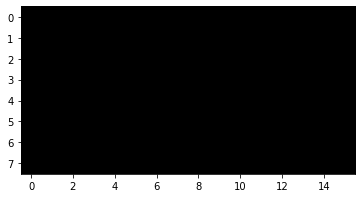

[(1, 10)]


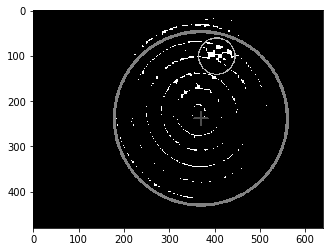

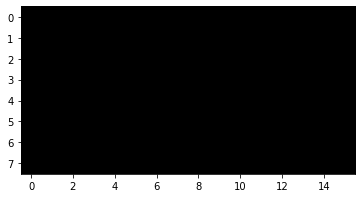

[(1, 10)]


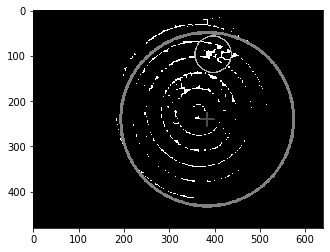

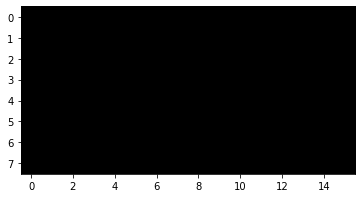

[]
(7, 11)


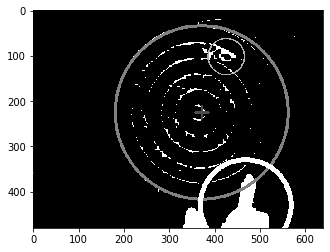

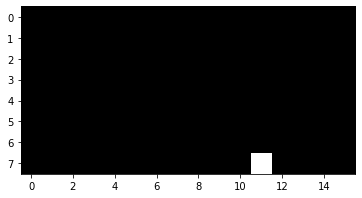

[]


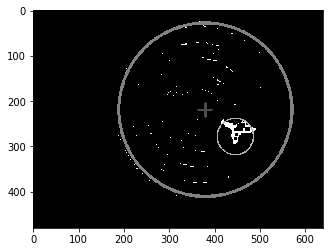

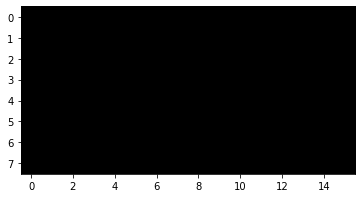

[]


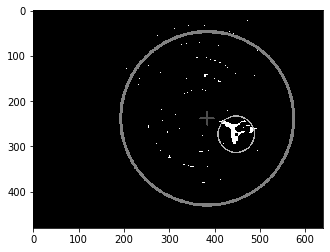

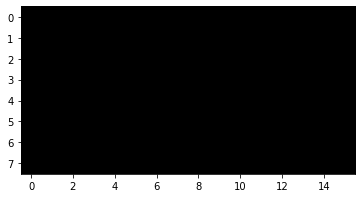

[]


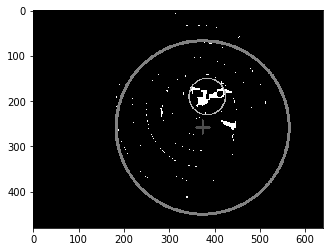

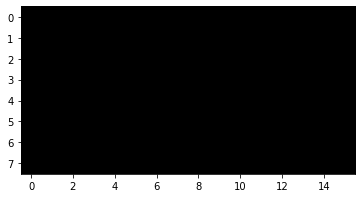

[]


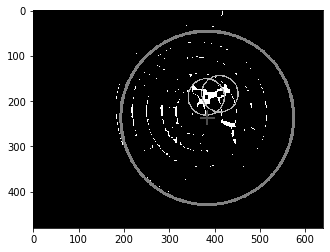

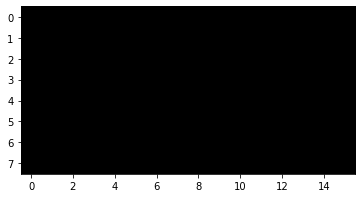

[]


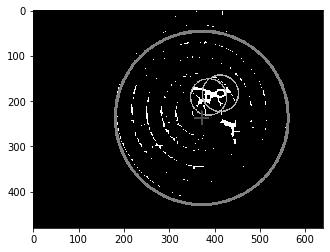

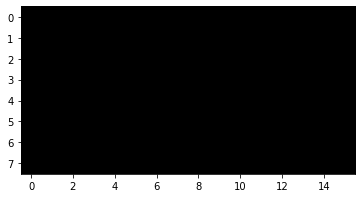

[]


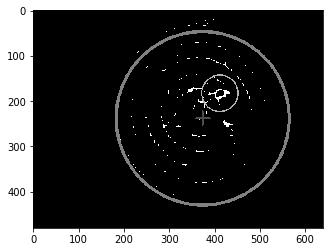

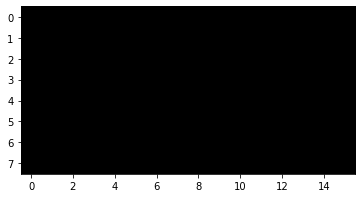

[]


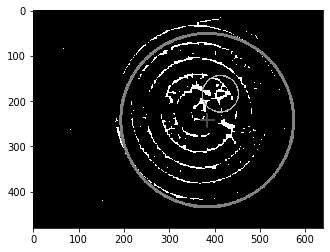

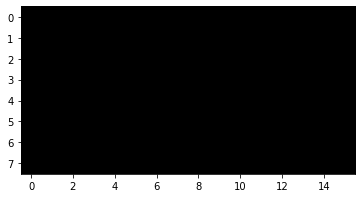

[]
(6, 0)
(3, 0)


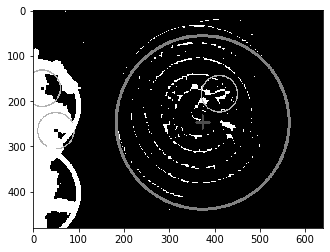

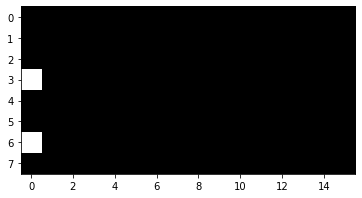

[]
(3, 0)


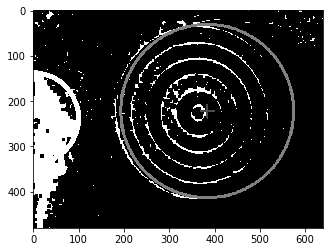

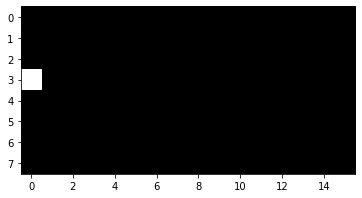

[(3, 0)]


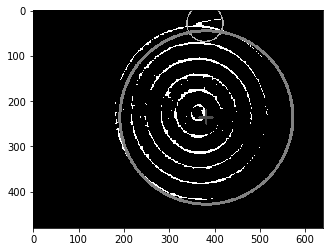

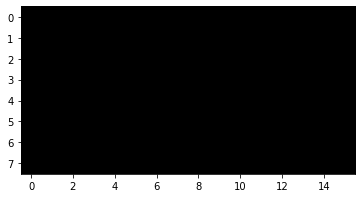

[(3, 0)]


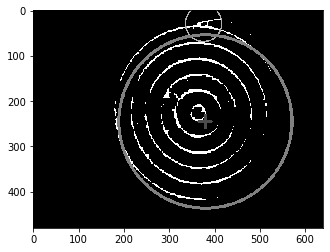

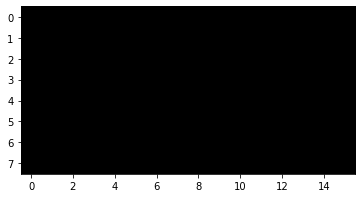

[(3, 0)]


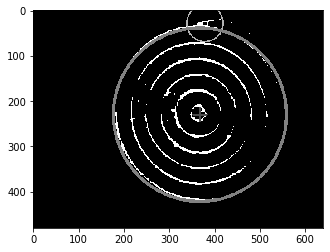

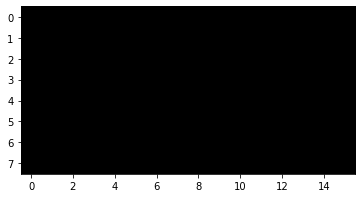

[(3, 0)]


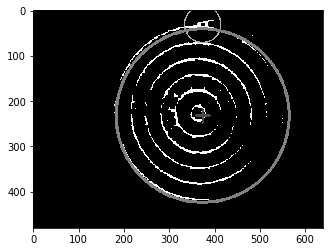

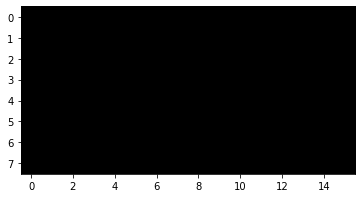

[]


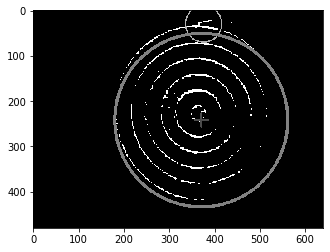

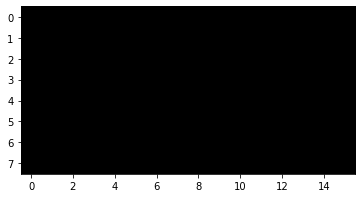

[]
(0, 7)


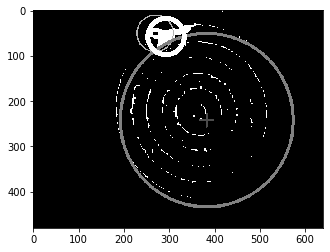

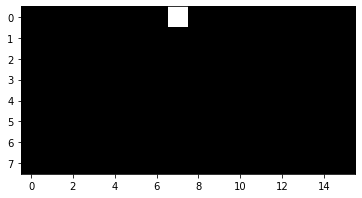

[]


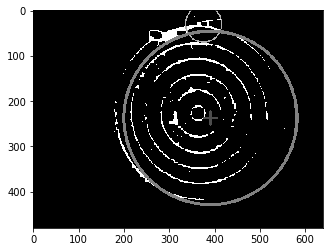

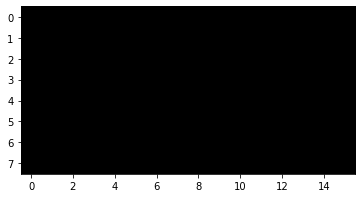

[]


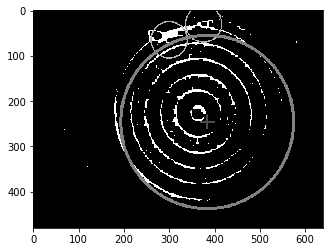

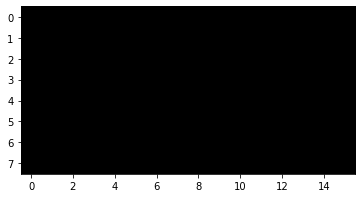

[]
(7, 13)
(7, 2)


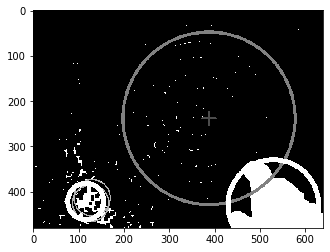

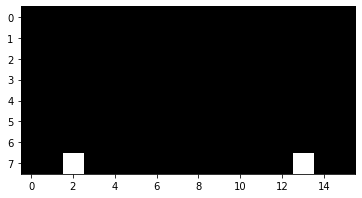

[]
(4, 9)


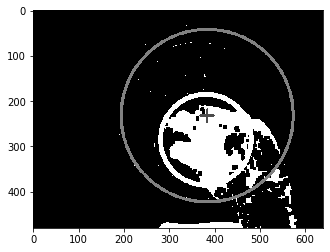

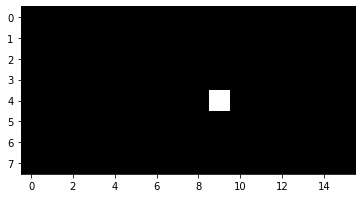

[]
(4, 9)


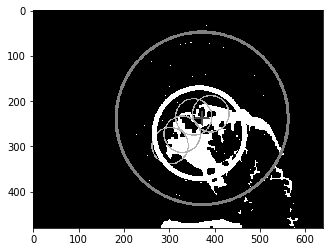

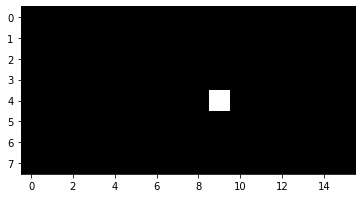

[(4, 9)]
(6, 13)
(4, 8)
(3, 11)


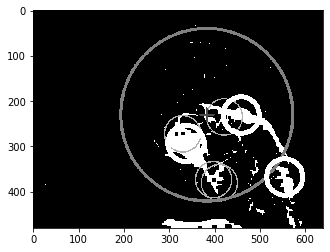

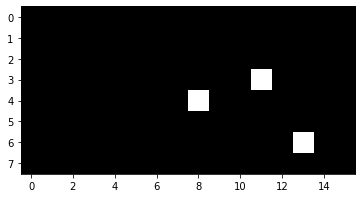

[(4, 9)]
(4, 7)


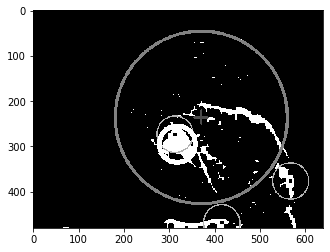

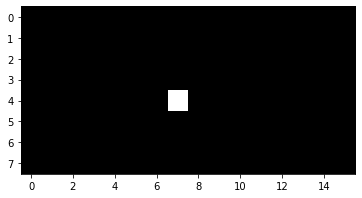

[(4, 9)]
(5, 7)


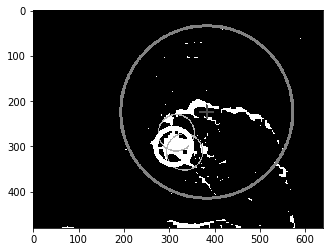

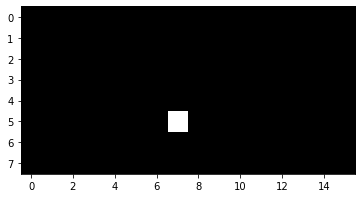

[(4, 9)]
(4, 8)


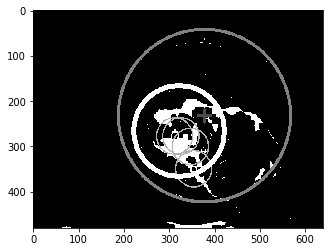

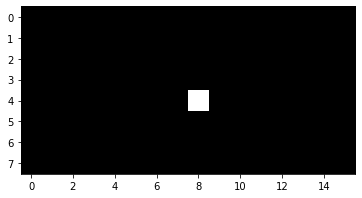

[(4, 8)]
(5, 7)
(5, 8)
(4, 7)


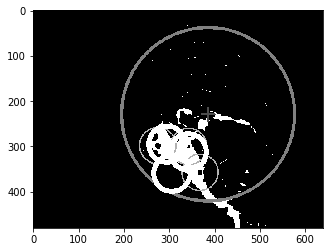

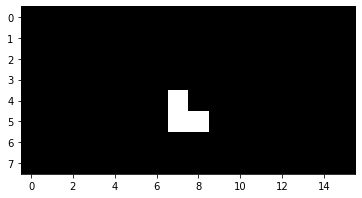

[(4, 7), (4, 8), (5, 7)]
(7, 9)


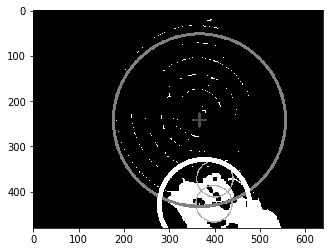

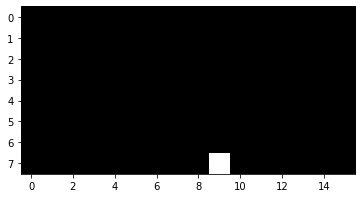

[(4, 7), (5, 7)]


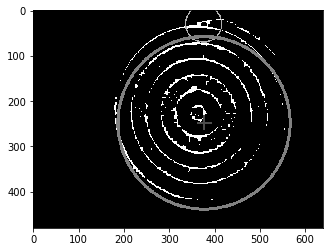

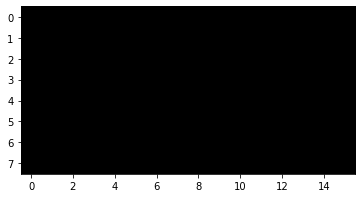

[(5, 7)]


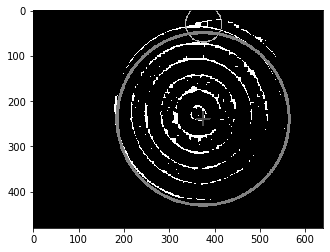

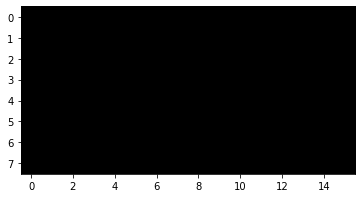

[]


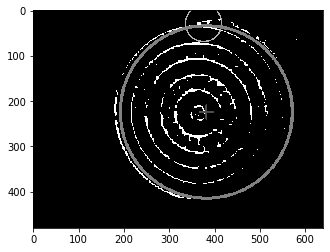

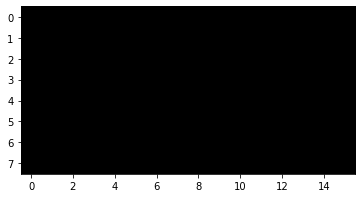

[]


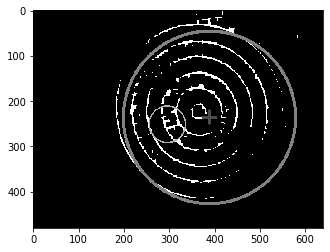

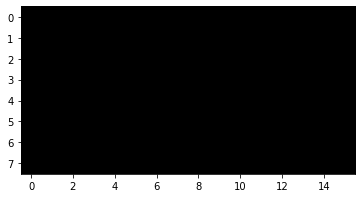

[]


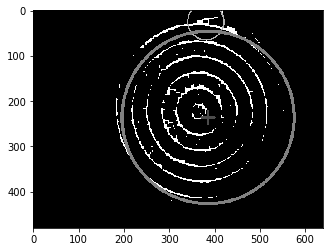

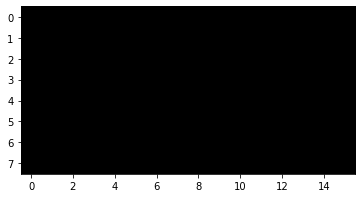

[]
(7, 8)


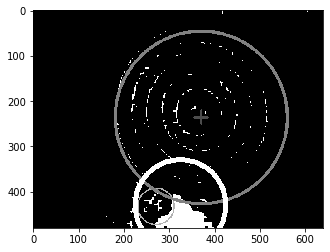

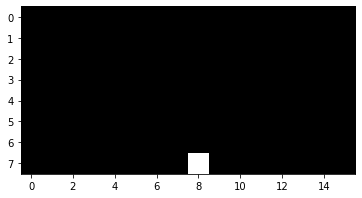

[]
(4, 7)


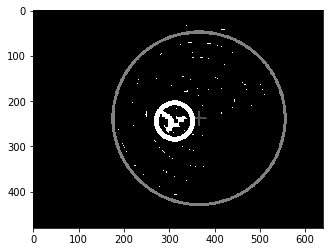

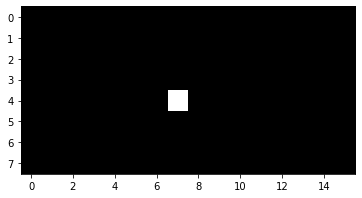

[]


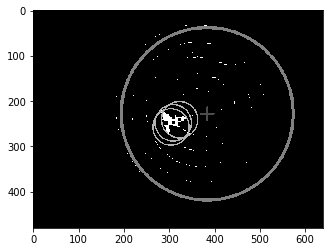

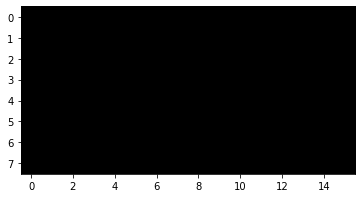

[]


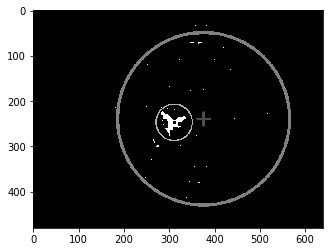

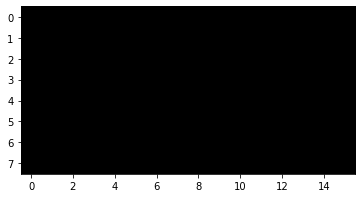

[]


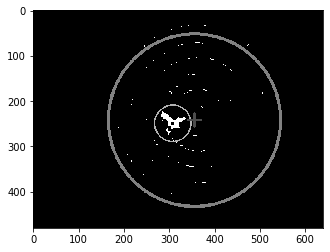

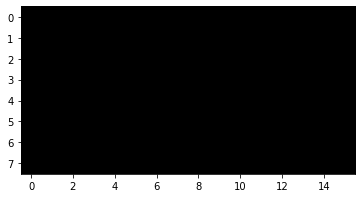

[]


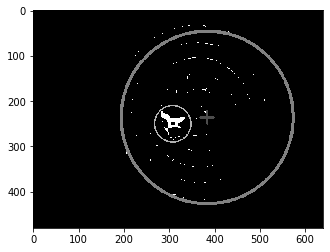

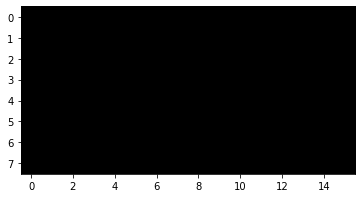

[]


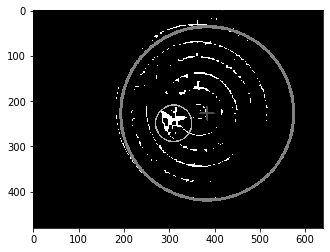

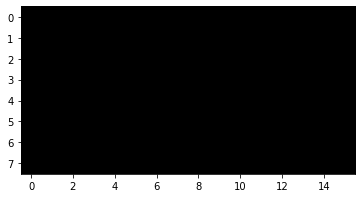

[]
(4, 7)


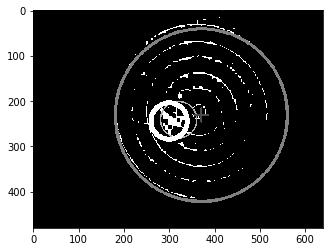

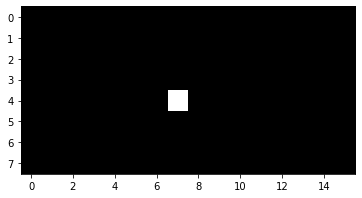

[]


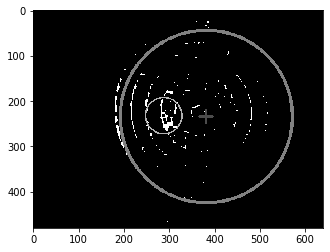

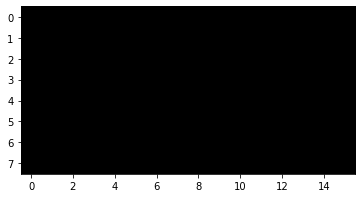

[]


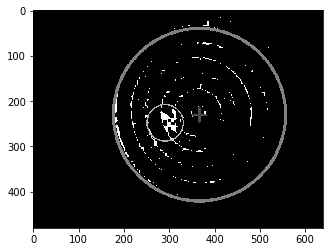

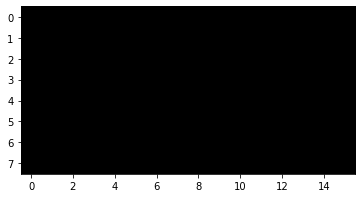

[]


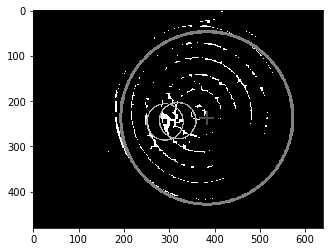

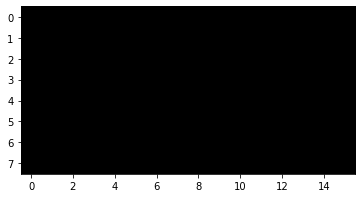

[]
(4, 7)


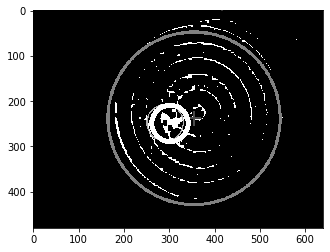

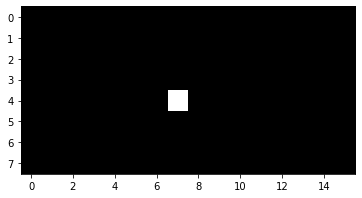

[(4, 7)]
(2, 8)


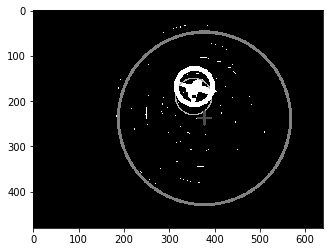

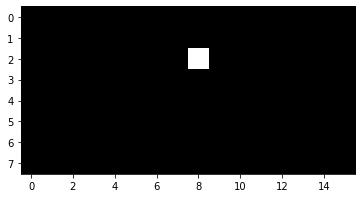

[]


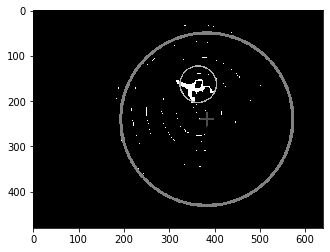

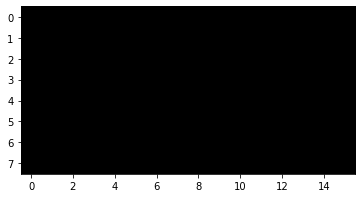

[]


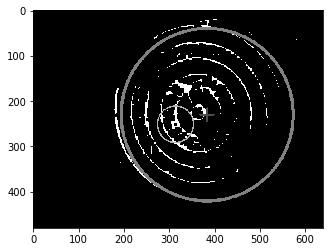

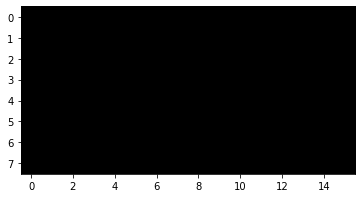

[]


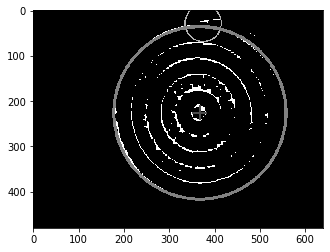

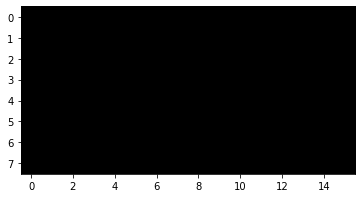

[]


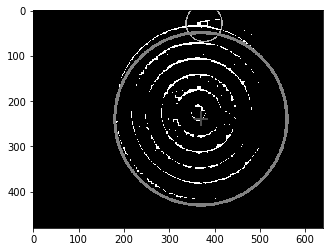

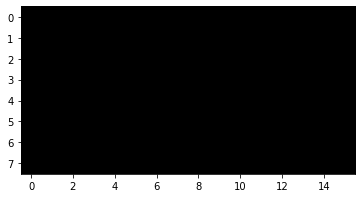

[]


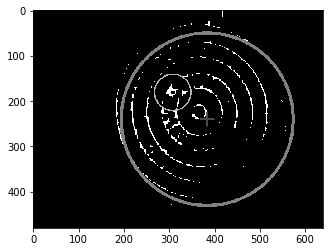

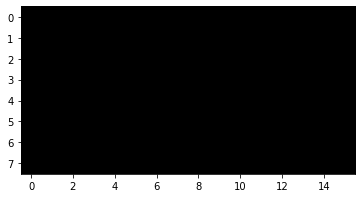

[]
(2, 6)


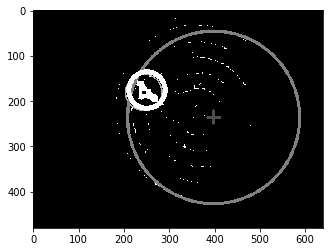

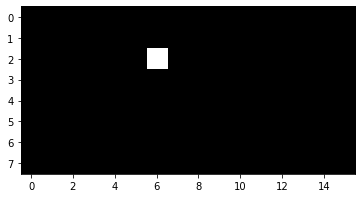

[]


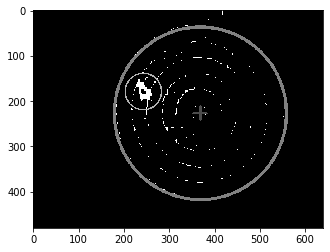

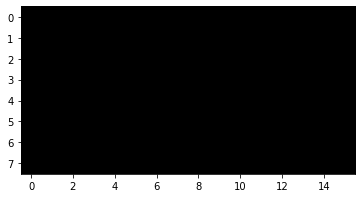

[]


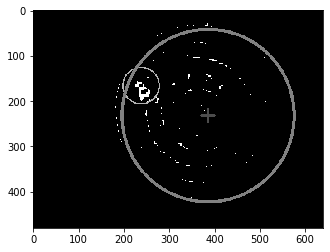

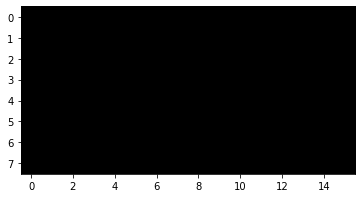

[]


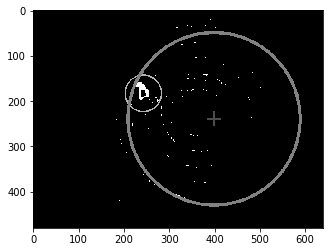

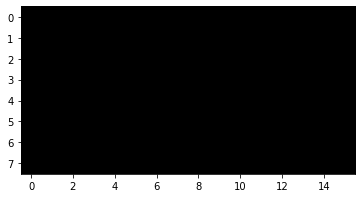

[]
(6, 2)
(6, 0)
(5, 4)
(4, 3)
(3, 3)


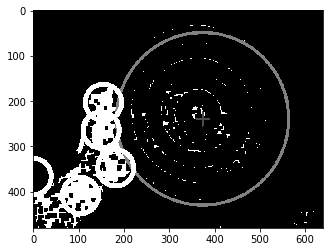

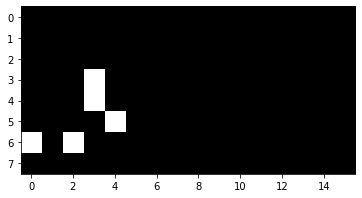

[]
(7, 13)


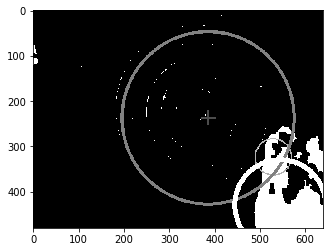

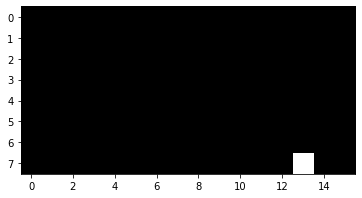

[]


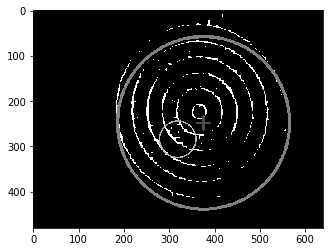

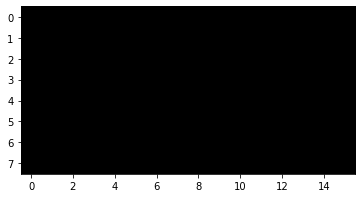

[]
(0, 9)


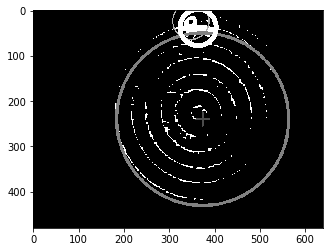

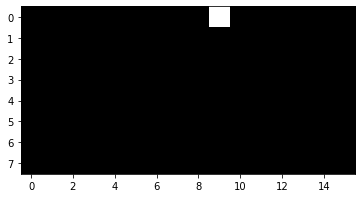

[]


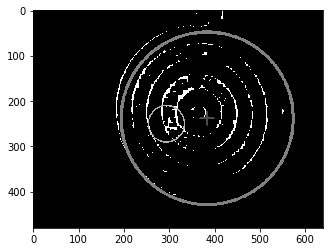

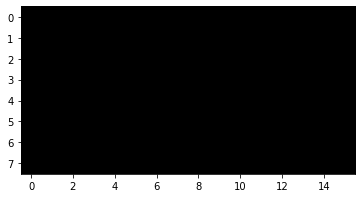

[]
(3, 7)


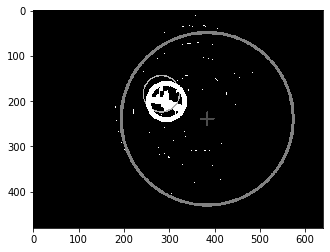

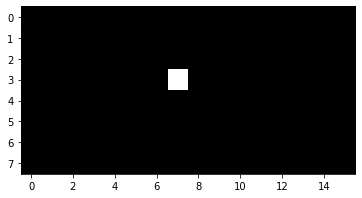

[]
(3, 7)


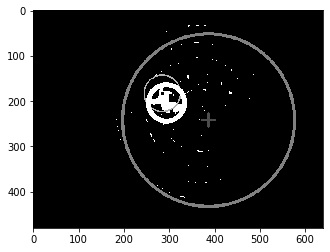

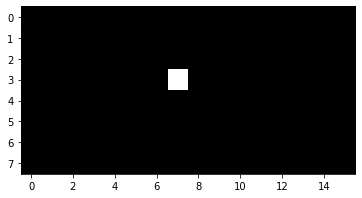

[(3, 7)]
(3, 7)


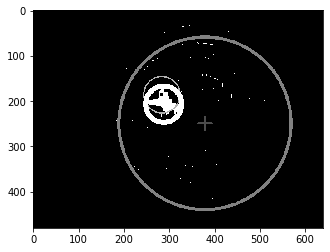

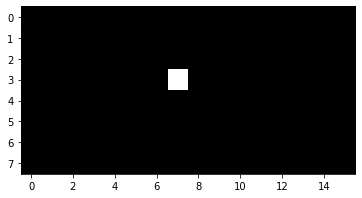

[(3, 7)]
(3, 7)


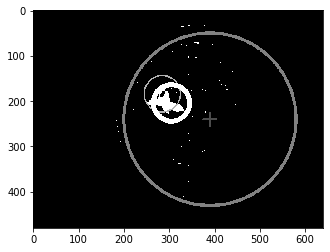

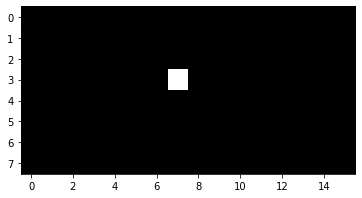

[(3, 7)]


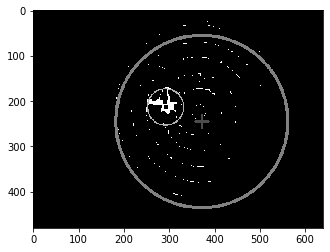

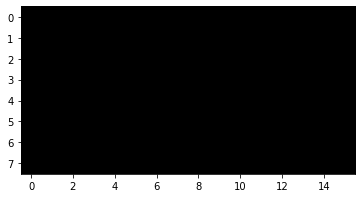

[(3, 7)]


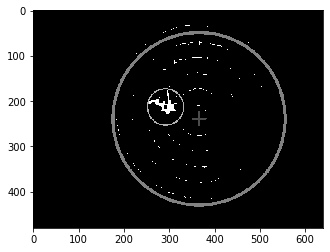

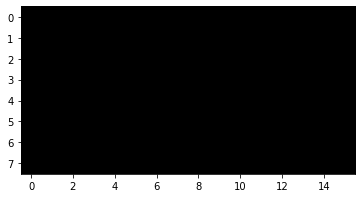

[(3, 7)]


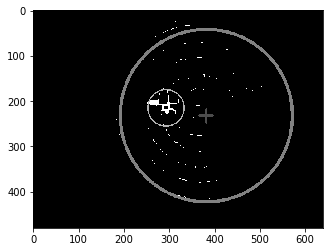

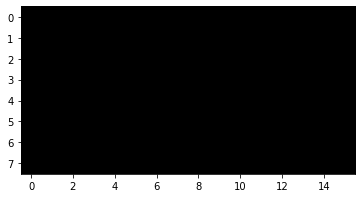

[(3, 7)]


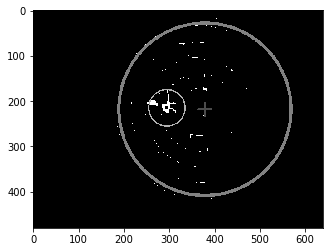

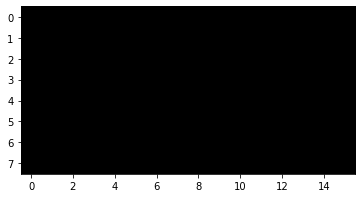

[]
(3, 7)


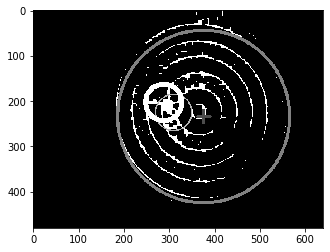

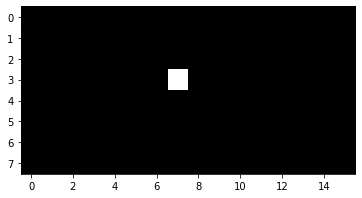

[]


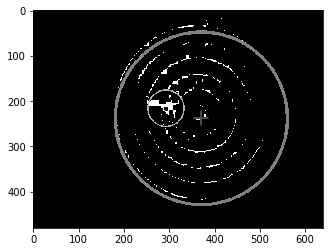

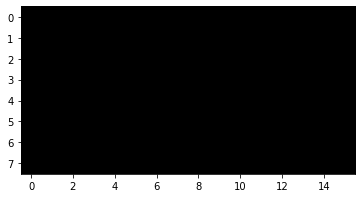

[]


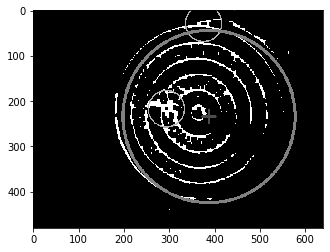

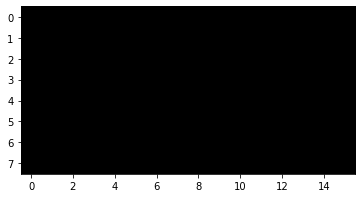

[]


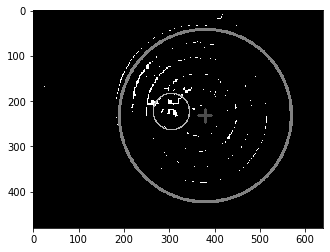

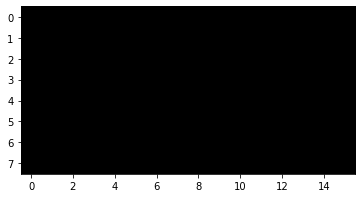

[]


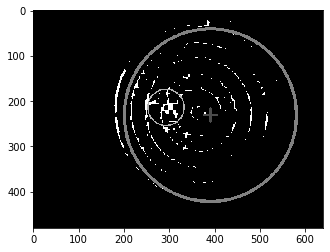

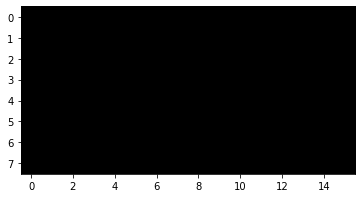

[]
(3, 8)


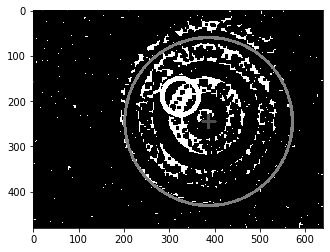

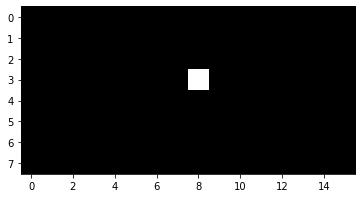

[]


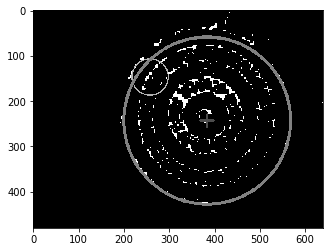

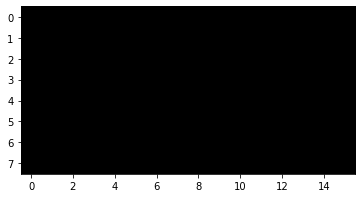

[]


In [200]:
bins = 8
thresh = 1             # Use threshold to filter spurious blob detection
sbf = deque(maxlen=5)  # ring buffer of location cell indicator maps

for idx, img in enumerate(img_lst[-500:]):
    im = cv2.imread(img, 0)
    plt.imshow(im, cmap=plt.cm.gray)
    #plt.show()
    loc = np.zeros((bins, 2 * bins))
    blobs_doh = blob_doh(im, min_sigma=40, max_sigma=100, num_sigma=2, threshold=0.01)#, log_scale=True)
    for blob in blobs_doh:
        x, y, r = list(map(int, blob))
        cv2.circle(im, (y, x), r, (255, 0, 0), 10)
        loc[point_bin((x, y), bins=bins)] += 1
        print(point_bin((x, y), bins=bins))
    plt.imshow(im, cmap=plt.cm.gray)
    plt.show()
    #im = cv2.resize(im, (16, 8))  # This is replaced with blob
    plt.imshow(loc, cmap=plt.cm.gray)
    plt.show()
    #print(list(zip(*np.where(im > 0))))
    sbf.append((loc>0).astype(np.uint8))
    print(list(zip(*np.where(np.sum(np.array(sbf), axis=0) > thresh))))  # Get indices for candidate darts

In [88]:
im = cv2.imread(img, 0)
h, w = im.shape

We introduce a data structure to help aggregate scores from multiple collocated blobs

In [121]:
scores = defaultdict()

for idx in range(10):
    score = 5
    point = (200, 300)
    loc = point_bin(point, bins=bins)
    if isinstance(scores.get(loc), deque):
        scores[loc].append(score)
    else:
        scores[loc] = deque(maxlen=5)
    print(np.median(scores[loc]))

nan
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
